In [1]:
#Para instalar ipywidgets hay que ejecutar el siguiente comando en el terminal:
!pip install ipywidgets

  Using cached https://files.pythonhosted.org/packages/a0/35/dd97fbb48d4e6b5ae97307497e31e46691adc2feedb6279d29fc1c8ad9c1/ipykernel-5.1.1-py3-none-any.whl


Exception:
Traceback (most recent call last):
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pip\basecommand.py", line 215, in main
    status = self.run(options, args)
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pip\commands\install.py", line 342, in run
    prefix=options.prefix_path,
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pip\req\req_set.py", line 784, in install
    **kwargs
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pip\req\req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pip\req\req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-

In [2]:
from IPython.display import Javascript, display
from ipywidgets import widgets

#Creamos un botón con el cual empezarán a ejecutarse las operaciones iniciales del notebook
def run_init(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, 8)'))

button_init = widgets.Button(description="Run initial operations")
button_init.on_click(run_init)
display(button_init)

Button(description='Run initial operations', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import os

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import numpy as np


import seaborn as sns

## Apertura de ficheros

In [4]:
#Definimos la variable ruta donde estarán los datasets a analizar
ruta = "C:/Users/delas/Documents/BDML/data/"


In [5]:
#Creamos un combo con el que elegir el año a analizar de los que disponemos de datos 1996-2018
dd = widgets.Dropdown(
    options = list(map(str, range(1996,2019))), 
    value = '1996',
    description = '* Year:',
)

dd.layout.width = '155px'
display(dd)

Dropdown(description='* Year:', layout=Layout(width='155px'), options=('1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'), value='1996')

In [6]:
#Creamos un checkbox para indicar si en la ejecución queremos generar los ficheros una vez tratados los datos
cb = widgets.Checkbox(
    value=False,
    description='Generate processed files',
    disabled=False
)
display(cb)

Checkbox(value=False, description='Generate processed files')

In [7]:
#Creamos un botón con el cual empezarán a ejecutarse el resto de operaciones
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Run all operations")
button.on_click(run_all)
display(button)

Button(description='Run all operations', style=ButtonStyle())

In [9]:
load_progress = widgets.IntProgress(
    value=0,
    min=0,
    max=13,
    step=1,
    description='Loading...',
    bar_style='info', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

In [10]:
#Cargamos todos los ficheros del año (mes a mes)
year = dd.value
dataframes = []
i = 1

display(load_progress)

for file in os.listdir(ruta + year):
    if file.endswith(".csv"):
        load_progress.value = i
        print("Reading file " + file)
        datos_vuelos = pd.read_csv(os.path.join(ruta + year, file), 
                                   encoding="ISO-8859-1", 
                                   low_memory=False, 
                                   error_bad_lines=False, 
                                   dtype={'CancellationCode': str})
        
        i = i + 1
        dataframes.append(datos_vuelos)

load_progress.value = i + 1
print()
print("All files loaded <--")

dataframes= sorted(dataframes, key=lambda x:x["Month"].max(axis=0))

#concatenamos todos para tener un DF anual
dfanual = pd.concat(dataframes)

IntProgress(value=0, bar_style='info', description='Loading...', max=13)

Reading file 2012-01-filtrado.csv
Reading file 2012-02-filtrado.csv
Reading file 2012-03-filtrado.csv
Reading file 2012-04-filtrado.csv
Reading file 2012-05-filtrado.csv
Reading file 2012-06-filtrado.csv
Reading file 2012-07-filtrado.csv
Reading file 2012-08-filtrado.csv
Reading file 2012-09-filtrado.csv
Reading file 2012-10-filtrado.csv
Reading file 2012-11-filtrado.csv
Reading file 2012-12-filtrado.csv

All files loaded <--


In [11]:
dataframes[0].head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2012        1      1           9          1  2012-01-09                MQ   
1  2012        1      1          10          2  2012-01-10                MQ   
2  2012        1      1          11          3  2012-01-11                MQ   
3  2012        1      1          12          4  2012-01-12                MQ   
4  2012        1      1          13          5  2012-01-13                MQ   

  IATA_CODE_Reporting_Airline Tail_Number  Flight_Number_Reporting_Airline  \
0                          MQ      N692MQ                             4038   
1                          MQ      N692MQ                             4038   
2                          MQ      N650MQ                             4038   
3                          MQ      N918MQ                             4038   
4                          MQ      N908MQ                             4038   

    ...    Flights Distance DistanceGroup CarrierDelay WeatherDelay NASDelay  \
0   ...        1.0    693.0             3          NaN          NaN      NaN   
1   ...        1.0    693.0             3          NaN          NaN      NaN   
2   ...        1.0    693.0             3          NaN          NaN      NaN   
3   ...        1.0    693.0             3          NaN          NaN      NaN   
4   ...        1.0    693.0             3          0.0         53.0      0.0   

   SecurityDelay  LateAircraftDelay  Flight_Code    Route  
0            NaN                NaN       MQ4038  ORD-OKC  
1            NaN                NaN       MQ4038  ORD-OKC  
2            NaN                NaN       MQ4038  ORD-OKC  
3            NaN                NaN       MQ4038  ORD-OKC  
4            0.0               24.0       MQ4038  ORD-OKC  

[5 rows x 50 columns]

In [12]:
#Miramos el tamaño del total
dfanual.shape

(6082950, 50)

In [13]:
#Miramos el tamaño de cada mes
for df in dataframes:
    print(df["Month"][1],df.shape)

1 (485060, 50)
2 (463852, 50)
3 (520457, 50)
4 (504031, 50)
5 (517105, 50)
6 (525536, 50)
7 (543709, 50)
8 (539391, 50)
9 (489061, 50)
10 (514170, 50)
11 (487167, 50)
12 (493411, 50)


## 1. Análisis Exploratorio

## 1.1 Aerolíneas

In [14]:
#para sacar las compañías que operan
#Cogemos las que hay en el primer mes y en el concatenado. Si son las mismas, tiramos. 
#Si no, miramos a ver en qué mes cambió
aerolineas_01 = dataframes[0]['IATA_CODE_Reporting_Airline'].unique()
aerolineas_anual = dfanual['IATA_CODE_Reporting_Airline'].unique()

if aerolineas_01.all() == aerolineas_anual.all():
    print(aerolineas_anual)
else:
    print(aerolineas_01)
    print(aerolineas_anual)

['MQ' 'OO' 'UA' 'US' 'VX' 'WN' 'YV' 'DL' 'EV' 'F9' 'FL' 'HA' 'AA' 'AS'
 'B6']


In [15]:

dfanual['Reporting_Airline'].unique()

array(['MQ', 'OO', 'UA', 'US', 'VX', 'WN', 'YV', 'DL', 'EV', 'F9', 'FL',
       'HA', 'AA', 'AS', 'B6'], dtype=object)

## 1.2 Vuelos, aeropuertos y rutas.

## 1.2.1 Vuelos

In [16]:
#en teoría son números de vuelos único, pero no es verdad, parece que comparten numeración así que luego concatenaremos
len(dfanual['Flight_Number_Reporting_Airline'].unique())

6670

In [17]:
#hago el número de vuelo como es de verdad, concatenando código de compañía y vuelo
dfanual['Flight_Code'] = dfanual['IATA_CODE_Reporting_Airline'] + dfanual['Flight_Number_Reporting_Airline'].astype(str)

In [18]:
#Sacamos el número real de vuelos diferentes que hay
len((dfanual['Flight_Code']).unique())

22723

In [19]:
#códigos únicos de vuelos por mes
for df in dataframes:
    df['Flight_Code'] = df['IATA_CODE_Reporting_Airline'] + df['Flight_Number_Reporting_Airline'].astype(str)
    print(df["Month"][1],len((df['Flight_Code']).unique()))

1 16343
2 15926
3 16164
4 17359
5 16763
6 17318
7 16646
8 17999
9 16886
10 16718
11 19457
12 18505


## 1.2.1 Aeropuertos

In [20]:
#para sacar los aeropuertos hacemos como con las compañías
#Cogemos las que hay en el primer mes y en el concatenado. Si son los mismos, tiramos. Si no, miramos a ver en qué mes cambió
aeropuertos_01 = dataframes[0]['Origin'].unique()
aeropuertos_anual = dfanual['Origin'].unique()

if aeropuertos_01.all() == aeropuertos_anual.all():
    print(aeropuertos_anual)
else:
    print(aeropuertos_01)
    print(aeropuertos_anual)

['ORD' 'BMI' 'SGF' 'TOL' 'XNA' 'BUF' 'FWA' 'CMI' 'DSM' 'SYR' 'CVG' 'OKC'
 'RIC' 'GRR' 'EVV' 'FAR' 'BWI' 'BDL' 'ROC' 'GRB' 'TYS' 'LIT' 'CLT' 'MDT'
 'PIT' 'TRI' 'CMH' 'JFK' 'IND' 'AZO' 'MCI' 'BNA' 'DTW' 'MQT' 'ICT' 'CLE'
 'DBQ' 'MEM' 'RDU' 'MHK' 'TUL' 'TVC' 'OMA' 'HSV' 'CWA' 'CHA' 'CHO' 'ART'
 'ORF' 'ILM' 'DAY' 'LEX' 'MSN' 'MLI' 'LGA' 'DCA' 'CRW' 'MSP' 'ATL' 'PHX'
 'LAX' 'SBP' 'YUM' 'ELP' 'GJT' 'PSP' 'DRO' 'SBA' 'LAS' 'SAN' 'ABQ' 'TUS'
 'ACV' 'ASE' 'CEC' 'DEN' 'SFO' 'SMF' 'EUG' 'RDM' 'PSC' 'SAT' 'MFR' 'BUR'
 'PDX' 'ONT' 'SEA' 'LGB' 'MRY' 'IDA' 'BOI' 'RKS' 'MKE' 'SLC' 'BIS' 'FAT'
 'BIL' 'STL' 'CPR' 'DFW' 'EGE' 'MSO' 'SBN' 'GEG' 'JAC' 'HDN' 'COS' 'BHM'
 'LNK' 'SDF' 'FSD' 'SJC' 'CID' 'AUS' 'BZN' 'LMT' 'CLD' 'RNO' 'HPN' 'OAK'
 'BTM' 'SMX' 'BFL' 'IAH' 'GFK' 'RAP' 'MOT' 'FCA' 'AVL' 'SUN' 'SNA' 'IYK'
 'LAN' 'IAD' 'COD' 'MBS' 'SPI' 'CIC' 'EKO' 'EAU' 'PAH' 'MOD' 'GCC' 'HLN'
 'MAF' 'CMX' 'DLH' 'ATW' 'OTH' 'MTJ' 'DAL' 'SGU' 'GTF' 'RDD' 'GUC' 'MSY'
 'MKG' 'MMH' 'IPL' 'LWS' 'RST' 'LSE' 'PIA' 'CHS' 'S

In [21]:
#número de aeropuertos únicos en origen
len(aeropuertos_anual)

310

In [22]:
#número de aeropuertos únicos en destino
len(dfanual['Dest'].unique())

311

In [23]:
#CÓDIGOS DE AEROPUERTOS ÚNICOS DE DESTINO
dfanual['Dest'].unique()

array(['OKC', 'ORD', 'BMI', 'DBQ', 'RIC', 'BUF', 'DSM', 'CVG', 'CMH',
       'SGF', 'CLE', 'GRR', 'XNA', 'TVC', 'FAR', 'ICT', 'ROC', 'BNA',
       'SYR', 'PIT', 'FSD', 'JAX', 'CLT', 'MKE', 'MEM', 'LIT', 'TYS',
       'TRI', 'CMI', 'MCI', 'FWA', 'IND', 'JFK', 'DTW', 'HSV', 'BWI',
       'RDU', 'ILM', 'MHK', 'EVV', 'CWA', 'CHO', 'TUL', 'ART', 'ORF',
       'GRB', 'TOL', 'AZO', 'OMA', 'MSN', 'DAY', 'LEX', 'MLI', 'DCA',
       'LGA', 'CRW', 'MSP', 'ATL', 'LAX', 'PHX', 'GJT', 'MRY', 'SBP',
       'SBA', 'PSP', 'YUM', 'LAS', 'SAN', 'ABQ', 'TUS', 'CIC', 'DEN',
       'SFO', 'ASE', 'BFL', 'EUG', 'PSC', 'MFR', 'PDX', 'BUR', 'ONT',
       'LGB', 'SEA', 'COS', 'ACV', 'RNO', 'HDN', 'BIS', 'RDM', 'IDA',
       'SLC', 'BIL', 'IAH', 'SJC', 'MSO', 'SAT', 'SBN', 'FAT', 'ELP',
       'DFW', 'EGE', 'SDF', 'CLD', 'SMF', 'DRO', 'LMT', 'MAF', 'BOI',
       'OAK', 'BTM', 'SMX', 'AUS', 'GFK', 'FCA', 'BZN', 'GTF', 'SUN',
       'SGU', 'SNA', 'AVL', 'MOT', 'RAP', 'HLN', 'MBS', 'HPN', 'PIH',
       'LNK', 'GEG',

## 1.2.3 Rutas

In [24]:
#ahora miramos las rutas que hay, al año y mensualmente
dfanual['Route'] = dfanual['Origin'] + "-" + dfanual['Dest'] 

In [25]:
len((dfanual['Route']).unique())

4621

In [26]:
#rutas únicas por mes
for df in dataframes:
    df['Route'] = df['Origin'] + "-" + df['Dest']
    print(df["Month"][1],len((df['Route']).unique()))

1 4017
2 3972
3 3995
4 3934
5 3877
6 4034
7 4069
8 4082
9 3998
10 3906
11 4021
12 4084


## 1.3 Retrasos, adelantos y cancelaciones

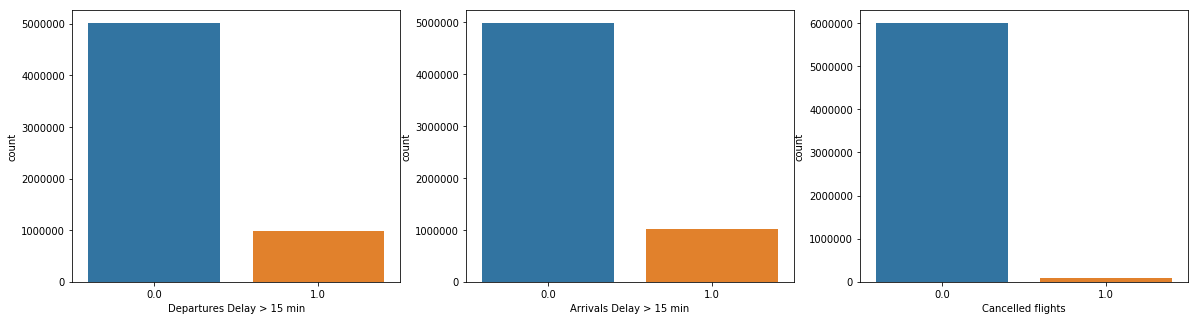

In [27]:
# Gráficas anuales
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.countplot(dfanual['DepDel15'], label='Frecuencia')
plt.xlabel('Departures Delay > 15 min')

plt.subplot(1,3,2)
sns.countplot(dfanual['ArrDel15'], label='Frecuencia')
plt.xlabel('Arrivals Delay > 15 min')

plt.subplot(1,3,3)
sns.countplot(dfanual['Cancelled'], label='Frecuencia')
plt.xlabel('Cancelled flights')


plt.show()

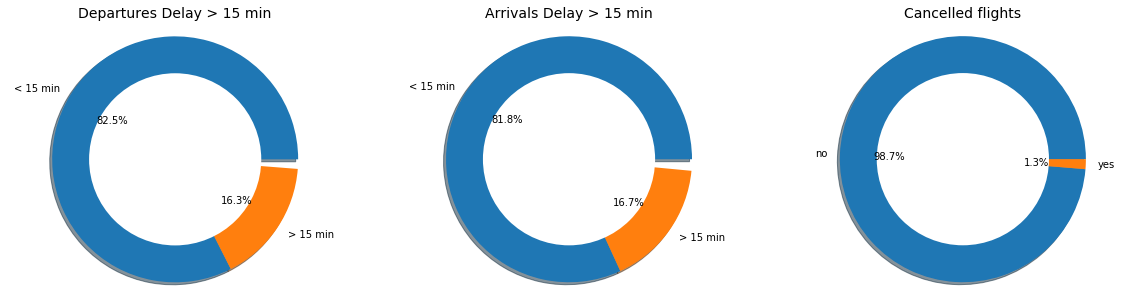

In [28]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(20, 5))
etiquetas_1 = ['< 15 min', '> 15 min']
etiquetas_2 = ['no', 'yes']
fracs_dep = [len(dfanual[dfanual['DepDel15'] == 0])/len(dfanual['DepDel15']),
             len(dfanual[dfanual['DepDel15'] ==1])/len(dfanual['DepDel15'])]
fracs_arr = [len(dfanual[dfanual['ArrDel15'] == 0])/len(dfanual['ArrDel15'])
             , len(dfanual[dfanual['ArrDel15'] == 1])/len(dfanual['ArrDel15'])]
fracs_canc = [len(dfanual[dfanual['Cancelled'] == 0])/len(dfanual['Cancelled']),
              len(dfanual[dfanual['Cancelled'] == 1])/len(dfanual['Cancelled'])]

the_grid = GridSpec(1, 3)

plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(fracs_dep, labels=etiquetas_1, autopct='%1.1f%%', shadow=True)
centre_circle_1 = plt.Circle((0, 0), 0.7, fc='white')
fig_1 = plt.gcf()
fig_1.gca().add_artist(centre_circle_1)
plt.axis('equal')
plt.title('Departures Delay > 15 min', fontsize=14)


plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(fracs_arr, labels=etiquetas_1, autopct='%1.1f%%', shadow=True)
centre_circle_2 = plt.Circle((0, 0), 0.7, fc='white')
fig_2 = plt.gcf()
fig_2.gca().add_artist(centre_circle_2)
plt.axis('equal')
plt.title('Arrivals Delay > 15 min', fontsize=14)


plt.subplot(the_grid[0, 2], aspect=1)
plt.pie(fracs_canc, labels=etiquetas_2, autopct='%1.1f%%', shadow=True)
centre_circle_3 = plt.Circle((0, 0), 0.7, fc='white')
fig_3 = plt.gcf()
fig_3.gca().add_artist(centre_circle_3)
plt.axis('equal')
plt.title('Cancelled flights', fontsize=14)

plt.show()

## 1.3.1 Adelantos en Salidas de Vuelos

In [29]:
#vuelos que se han adelantado de la hora prevista en salidas
adelantos = (dfanual[dfanual['DepDelay'] < 0])
adelantos = adelantos['DepDelay']
adelantos.shape

(3476260,)

In [30]:
adelantos.describe()

count    3.476260e+06
mean    -4.775985e+00
std      2.996356e+00
min     -2.260000e+02
25%     -6.000000e+00
50%     -4.000000e+00
75%     -2.000000e+00
max     -1.000000e+00
Name: DepDelay, dtype: float64

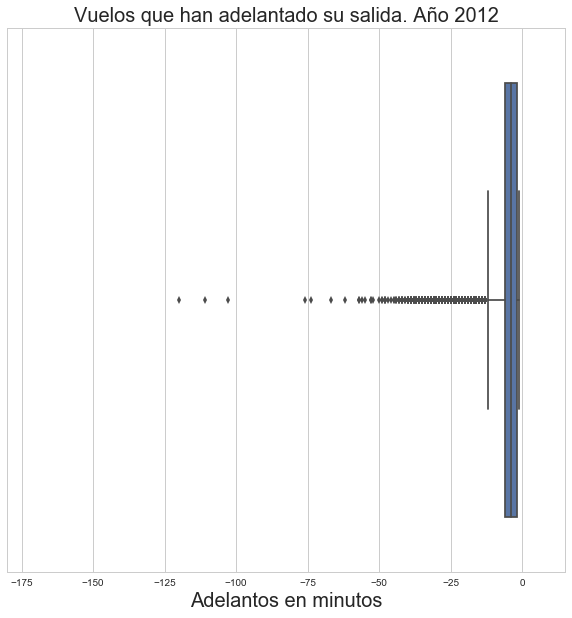

In [31]:
#Vuelos que han adelantado su salida

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-180,15)
ax = sns.boxplot(x=adelantos)
ax.set_xlabel("Adelantos en minutos", fontsize=20)
ax.set_title('Vuelos que han adelantado su salida. Año ' + year, fontsize=20)
plt.show()

In [32]:
#vamos a reducir la escala para al menos ver la parte principal
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-12,0)
ax = sns.boxplot(x=adelantos)
ax.set_xlabel("Adelantos en minutos", fontsize=20)
ax.set_title('Vuelos que han adelantado su salida. Año ' + year, fontsize=20)
plt.show()

Los adelantos en salida mayores a 10 minutos son cancelaciones, por lo que no nos eliminamos

In [33]:
len(dfanual[dfanual['DepDelay'] < -15])

16443

## 1.3.2 Retrasos en salidas distribuidos por aerolíneas

In [34]:
retrasosSalidasPorAerolinea = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])

retrasosSalidasPorAerolinea = pd.DataFrame(retrasosSalidasPorAerolinea[['DepDelay', 'IATA_CODE_Reporting_Airline']])
retrasosSalidasPorAerolinea.head(5)

DepDelay IATA_CODE_Reporting_Airline
4       79.0                          MQ
5       24.0                          MQ
12      36.0                          MQ
16      29.0                          MQ
29     153.0                          MQ

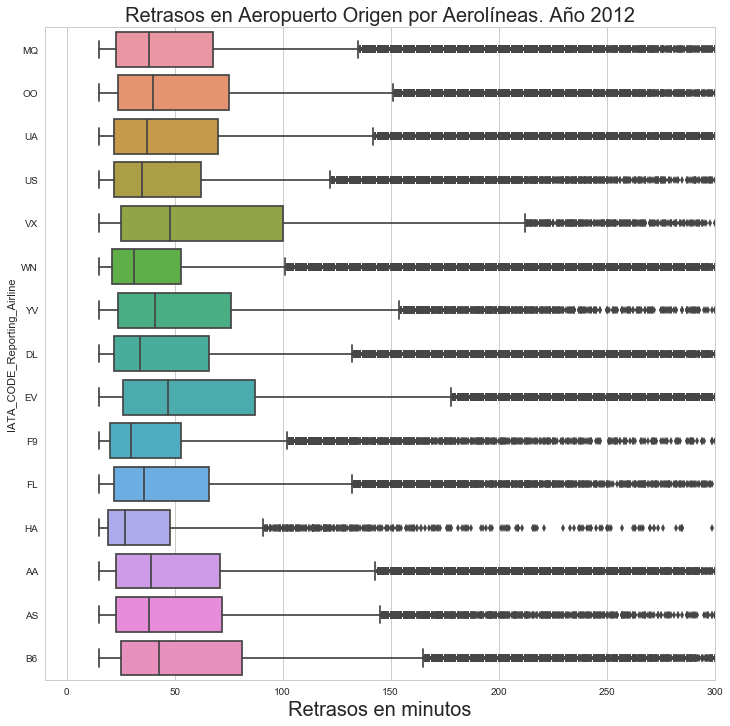

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
plt.xlim(-10,300)
ax = sns.boxplot(x=retrasosSalidasPorAerolinea["DepDelay"], y=retrasosSalidasPorAerolinea["IATA_CODE_Reporting_Airline"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Retrasos en Aeropuerto Origen por Aerolíneas. Año ' + year, fontsize=20)
plt.show()

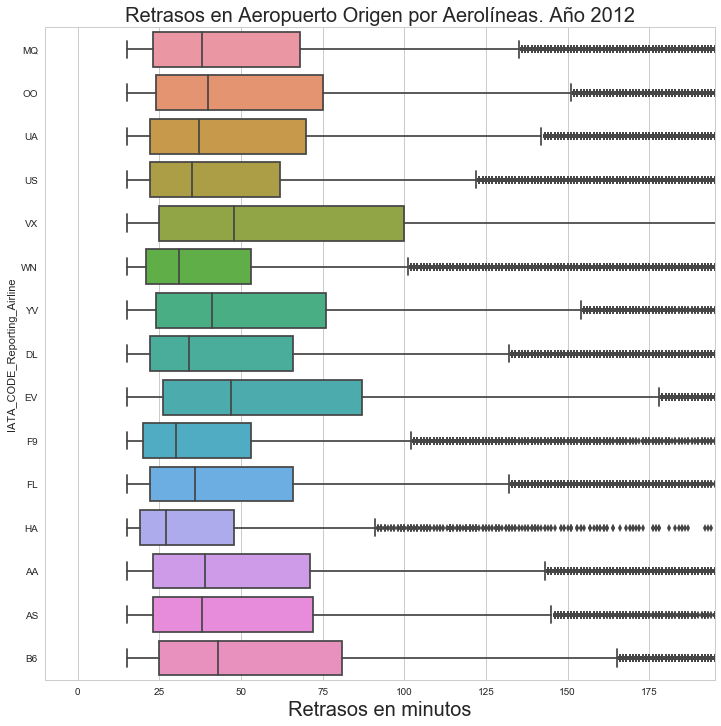

In [36]:
#vamos a limitar un poco más eje x
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
plt.xlim(-10,195)
ax = sns.boxplot(x=retrasosSalidasPorAerolinea["DepDelay"], y=retrasosSalidasPorAerolinea["IATA_CODE_Reporting_Airline"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Retrasos en Aeropuerto Origen por Aerolíneas. Año ' + year, fontsize=20)
plt.show()

## 1.3.3 Retrasos en Aeropuerto de Origen

#### Vuelos que se han retrasado al menos 15 minutos en la salida (incluye también a todos los que se retrasaron o no en la llegada en el destino)

In [37]:
#Vuelos que se han retrasado al menos 15 minutos en la salida (incluye también a todos los que se retrasaron o no
#en la llegada en el destino)
len(dfanual[dfanual['DepDel15'] == 1])

990912

In [38]:
#retrasos por mes en salidas

vuelosTotalesRetrasadosPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosTotalesRetrasadosPorMes = vuelosTotalesRetrasadosPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['DepDel15'] == 1)])}, ignore_index=True)


#sin meter en un pandas, sólo para mostrarlos por print
#for df in dataframes:
#    print(df["Month"][1],len(df[df['DepDel15'] == 1]))

In [39]:
vuelosTotalesRetrasadosPorMes

mes  vuelos
0    1   67046
1    2   55592
2    3   84519
3    4   62898
4    5   78272
5    6   94635
6    7  119778
7    8  103413
8    9   71962
9   10   81583
10  11   65943
11  12  105271

In [40]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosTotalesRetrasadosPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, al menos en Aeropuerto Origen. Año ' + year, fontsize=20)

plt.axhline(vuelosTotalesRetrasadosPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

#### Retrasados sólo en salidas y no en llegadas, es decir, recuperan el tiempo durante el vuelo. Esto significa que no se marca el retraso por ningún motivo, ya que el retraso se marca en destino por lo que los vuelos con retrasos en salidas sólo se registro el tiempo de retraso.

In [41]:
len(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['ArrDel15'] == 0)])

202861

In [42]:
vuelosRestrasadosSoloEnSalidas = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosRestrasadosSoloEnSalidas = vuelosRestrasadosSoloEnSalidas.append({'mes': df["Month"][1], 'vuelos': len(df[(df['DepDel15'] == 1) & (df['ArrDel15'] == 0)])}, ignore_index=True)


In [43]:
vuelosRestrasadosSoloEnSalidas

mes vuelos
0    1  15067
1    2  12852
2    3  18731
3    4  14494
4    5  16483
5    6  18898
6    7  20490
7    8  19462
8    9  12731
9   10  16225
10  11  16369
11  12  21059

In [44]:
#Vuelos retrasados por mes sólo en salidas (no tenemos los motivos de los retrasos en este caso, al llegar en hora a destino)

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosRestrasadosSoloEnSalidas['vuelos'], palette=pal)

ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, sólo en el Aeropuerto de Origen. Año ' + year, fontsize=20)

plt.axhline(vuelosRestrasadosSoloEnSalidas['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

Nos vamos a quedar sólo con los retrasados en salidas (tanto si recuperaron el tiempo a la llegado como si no)
para ver la media y cuartiles, así como los posibles outliers

In [45]:
retrasosSalidas = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])
retrasosSalidas.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
4   2012        1      1          13          5  2012-01-13                MQ   
5   2012        1      1          15          7  2012-01-15                MQ   
12  2012        1      1          23          1  2012-01-23                MQ   
16  2012        1      1          27          5  2012-01-27                MQ   
29  2012        1      1          13          5  2012-01-13                MQ   

   IATA_CODE_Reporting_Airline Tail_Number  Flight_Number_Reporting_Airline  \
4                           MQ      N908MQ                             4038   
5                           MQ      N647MQ                             4038   
12                          MQ      N617MQ                             4038   
16                          MQ      N687MQ                             4038   
29                          MQ      N692MQ                             4041   

     ...    Flights Distance DistanceGroup CarrierDelay WeatherDelay NASDelay  \
4    ...        1.0    693.0             3          0.0         53.0      0.0   
5    ...        1.0    693.0             3         24.0          0.0      0.0   
12   ...        1.0    693.0             3          0.0         24.0      0.0   
16   ...        1.0    693.0             3         21.0          0.0      3.0   
29   ...        1.0    116.0             1          0.0          0.0      3.0   

    SecurityDelay  LateAircraftDelay  Flight_Code    Route  
4             0.0               24.0       MQ4038  ORD-OKC  
5             0.0                0.0       MQ4038  ORD-OKC  
12            0.0                4.0       MQ4038  ORD-OKC  
16            0.0                8.0       MQ4038  ORD-OKC  
29            0.0              153.0       MQ4041  BMI-ORD  

[5 rows x 50 columns]

In [46]:
retrasosSalidas = pd.DataFrame(retrasosSalidas['DepDelay'])

retrasosSalidas.head(5)

DepDelay
4       79.0
5       24.0
12      36.0
16      29.0
29     153.0

In [47]:
retrasosSalidas.describe().T

count       mean        std   min   25%   50%   75%     max
DepDelay  990912.0  57.291255  60.543818  15.0  23.0  37.0  69.0  1831.0

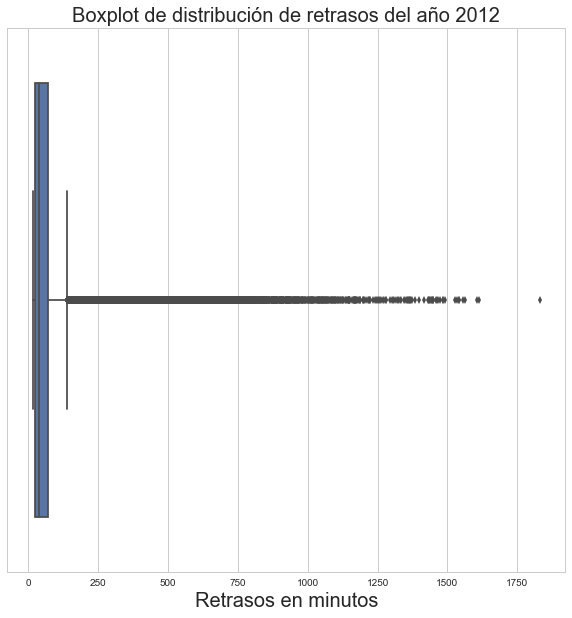

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasosSalidas["DepDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos del año ' + year, fontsize=20)
plt.show()

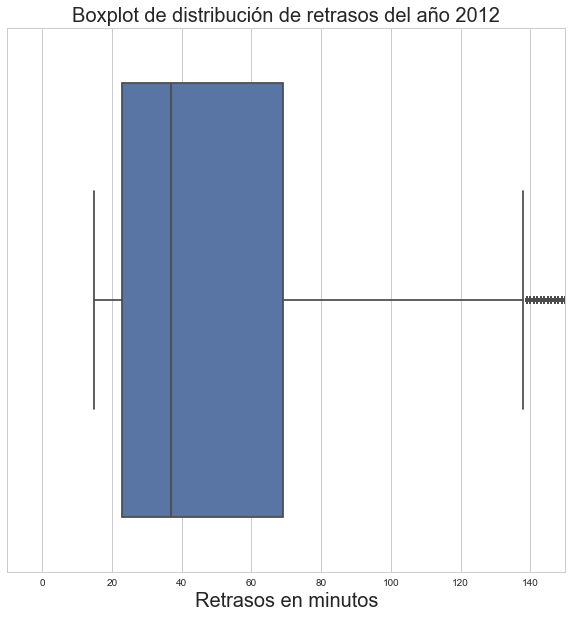

In [49]:
#vamos a reducir la escala para al menos ver la parte principal

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-10,150)
ax = sns.boxplot(x=retrasosSalidas["DepDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos del año ' + year, fontsize=20)
plt.show()

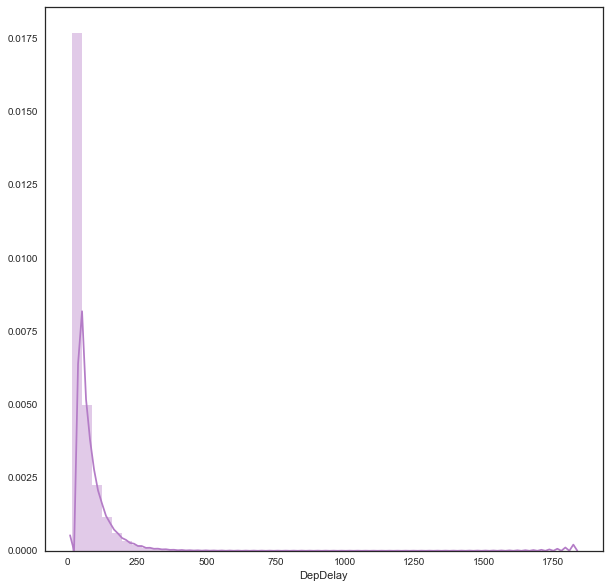

In [50]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasosSalidas["DepDelay"], color="m")

plt.show()

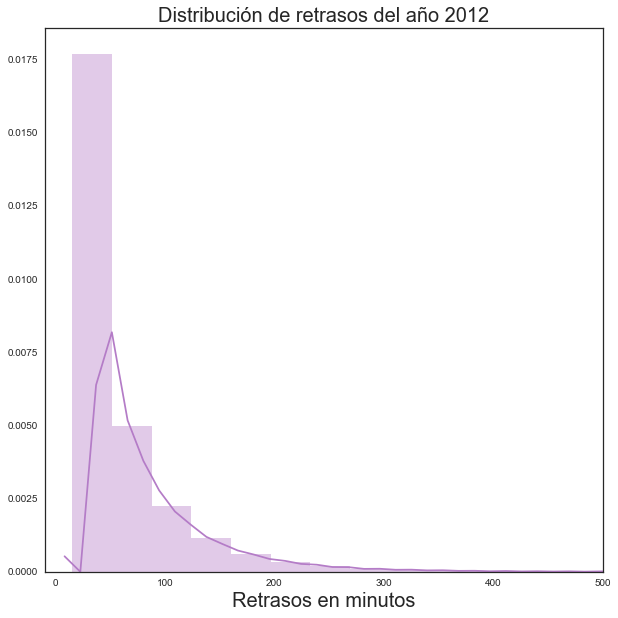

In [51]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSalidas["DepDelay"], color="m")
plt.xlim(-10,500)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

Quizás deberíamos cortar sobre los 250 minutos de retraso

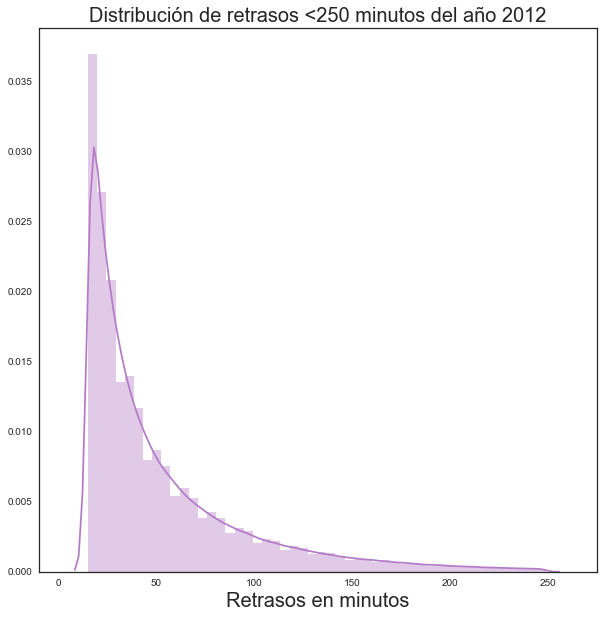

In [52]:
corte250Min = pd.DataFrame(retrasosSalidas[retrasosSalidas["DepDelay"]<250])

# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(corte250Min["DepDelay"], color="m")
plt.xlim(-10,275)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos <250 minutos del año ' + year, fontsize=20)


plt.show()

### 1.3.3.1 Ranking de aeropuertos en Retrasos en salidas

In [53]:
dfanual[dfanual['DepDel15'] == 1].Origin.value_counts(sort=True).head(15)

ORD    66766
ATL    60420
DFW    53071
DEN    48077
SFO    41784
IAH    38614
LAX    38278
EWR    30743
LAS    26231
PHX    26151
BWI    21351
MDW    20057
MCO    18585
CLT    16970
JFK    16538
Name: Origin, dtype: int64

In [54]:
#primero cogemos los 45 aeropuertos (de origen) con mayor número de retrasos
retrasosSalidaEnAeropuertos = pd.DataFrame(dfanual[dfanual['DepDelay'] == 1].Origin.value_counts(sort=True)).head(45)

In [55]:
#retrasos totales de esos 45 aeropuerto
retrasosSalidaEnAeropuertos.sum()

Origin    159905
dtype: int64

In [56]:
#el 85% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80Aeropuertos = ((retrasosSalidaEnAeropuertos.sum() / (len(dfanual[dfanual['DepDel15'] == 1])))) *100

In [57]:
pct80Aeropuertos = (pct80Aeropuertos -100) * (-1)

In [58]:
print('45 aeropuertos concentran el %.2f' %pct80Aeropuertos + '% de los retrasos del año ' + year)

45 aeropuertos concentran el 83.86% de los retrasos del año 2012


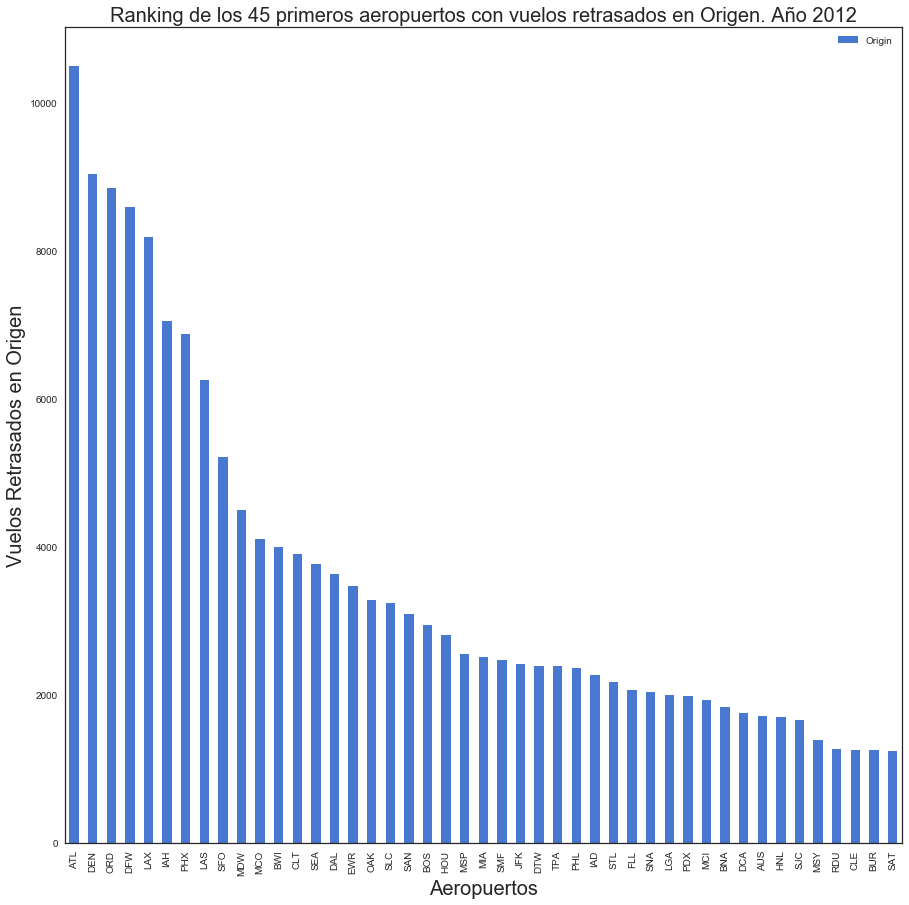

In [59]:
ax = retrasosSalidaEnAeropuertos.plot(kind='bar', figsize=(15,15))

ax.set_ylabel("Vuelos Retrasados en Origen", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

De estos, ATL (Atlanta), DFW (Dallas) y IAH(Houston) y  concentran más del 20% de los retrasos

In [60]:
retrasosSalidaEnAeropuertos = retrasosSalidaEnAeropuertos.reset_index()
retrasosSalidaEnAeropuertos.columns = ['Origin','DepDelay']

In [61]:
retrasosSalidaEnAeropuertos.head(45)

Origin  DepDelay
0     ATL     10499
1     DEN      9046
2     ORD      8850
3     DFW      8598
4     LAX      8194
5     IAH      7048
6     PHX      6879
7     LAS      6255
8     SFO      5214
9     MDW      4494
10    MCO      4104
11    BWI      3993
12    CLT      3898
13    SEA      3766
14    DAL      3636
15    EWR      3470
16    OAK      3282
17    SLC      3238
18    SAN      3088
19    BOS      2947
20    HOU      2807
21    MSP      2546
22    MIA      2509
23    SMF      2474
24    JFK      2415
25    DTW      2389
26    TPA      2389
27    PHL      2357
28    IAD      2263
29    STL      2178
30    FLL      2063
31    SNA      2035
32    LGA      1998
33    PDX      1986
34    MCI      1930
35    BNA      1834
36    DCA      1760
37    AUS      1717
38    HNL      1695
39    SJC      1655
40    MSY      1394
41    RDU      1265
42    CLE      1259
43    BUR      1252
44    SAT      1236

In [62]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosSalidaEnAeropuertos["Origin"].values.tolist()

In [63]:
#nos quedamos con los datos de esos aeropuertos
retrasosSalidaEnAeropuertos = dfanual.loc[(dfanual["Origin"].isin(aeropuertos))]

In [64]:
retrasosSalidaEnAeropuertos

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0       2012        1      1           9          1  2012-01-09   
1       2012        1      1          10          2  2012-01-10   
2       2012        1      1          11          3  2012-01-11   
3       2012        1      1          12          4  2012-01-12   
4       2012        1      1          13          5  2012-01-13   
5       2012        1      1          15          7  2012-01-15   
6       2012        1      1          16          1  2012-01-16   
7       2012        1      1          17          2  2012-01-17   
8       2012        1      1          18          3  2012-01-18   
9       2012        1      1          19          4  2012-01-19   
10      2012        1      1          20          5  2012-01-20   
11      2012        1      1          22          7  2012-01-22   
12      2012        1      1          23          1  2012-01-23   
13      2012        1      1          24          2  2012-01-24   
14      2012        1      1          25          3  2012-01-25   
15      2012        1      1          26          4  2012-01-26   
16      2012        1      1          27          5  2012-01-27   
17      2012        1      1          29          7  2012-01-29   
18      2012        1      1          30          1  2012-01-30   
19      2012        1      1          31          2  2012-01-31   
42      2012        1      1           1          7  2012-01-01   
43      2012        1      1           2          1  2012-01-02   
44      2012        1      1           4          3  2012-01-04   
45      2012        1      1           5          4  2012-01-05   
46      2012        1      1           6          5  2012-01-06   
47      2012        1      1           8          7  2012-01-08   
48      2012        1      1           9          1  2012-01-09   
49      2012        1      1          11          3  2012-01-11   
50      2012        1      1          12          4  2012-01-12   
51      2012        1      1          13          5  2012-01-13   
...      ...      ...    ...         ...        ...         ...   
493350  2012        4     12          18          2  2012-12-18   
493351  2012        4     12          19          3  2012-12-19   
493352  2012        4     12          20          4  2012-12-20   
493353  2012        4     12          21          5  2012-12-21   
493354  2012        4     12          22          6  2012-12-22   
493355  2012        4     12          23          7  2012-12-23   
493356  2012        4     12          24          1  2012-12-24   
493357  2012        4     12          25          2  2012-12-25   
493358  2012        4     12          26          3  2012-12-26   
493359  2012        4     12          27          4  2012-12-27   
493360  2012        4     12          28          5  2012-12-28   
493361  2012        4     12          29          6  2012-12-29   
493362  2012        4     12          30          7  2012-12-30   
493363  2012        4     12          31          1  2012-12-31   
493395  2012        4     12           1          6  2012-12-01   
493396  2012        4     12           3          1  2012-12-03   
493397  2012        4     12           4          2  2012-12-04   
493398  2012        4     12           5          3  2012-12-05   
493399  2012        4     12           6          4  2012-12-06   
493400  2012        4     12           7          5  2012-12-07   
493401  2012        4     12           8          6  2012-12-08   
493402  2012        4     12          10          1  2012-12-10   
493403  2012        4     12          11          2  2012-12-11   
493404  2012        4     12          12          3  2012-12-12   
493405  2012        4     12          13          4  2012-12-13   
493406  2012        4     12          14          5  2012-12-14   
493407  2012        4     12          15          6  2012-12-15   
493408  2012        4     12          17          1  20

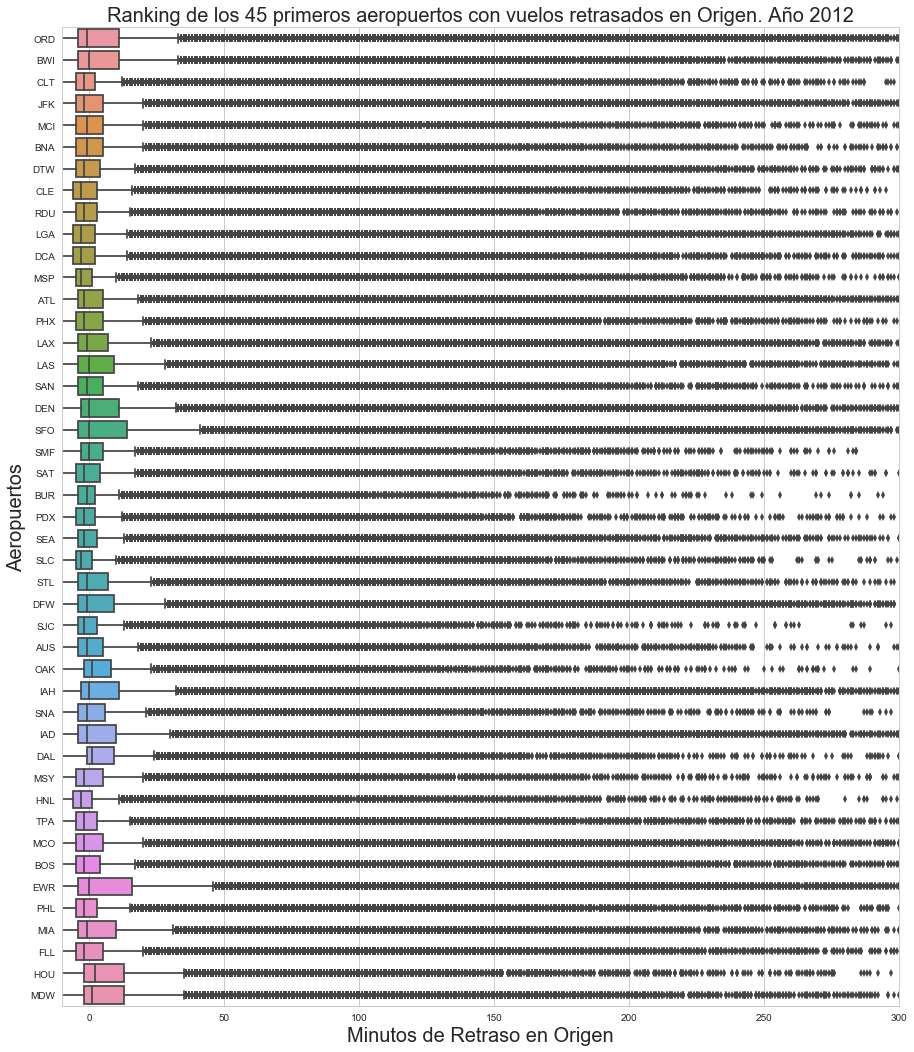

In [65]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-10,300)
ax = sns.boxplot(x=retrasosSalidaEnAeropuertos["DepDelay"], y=retrasosSalidaEnAeropuertos["Origin"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Origen", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

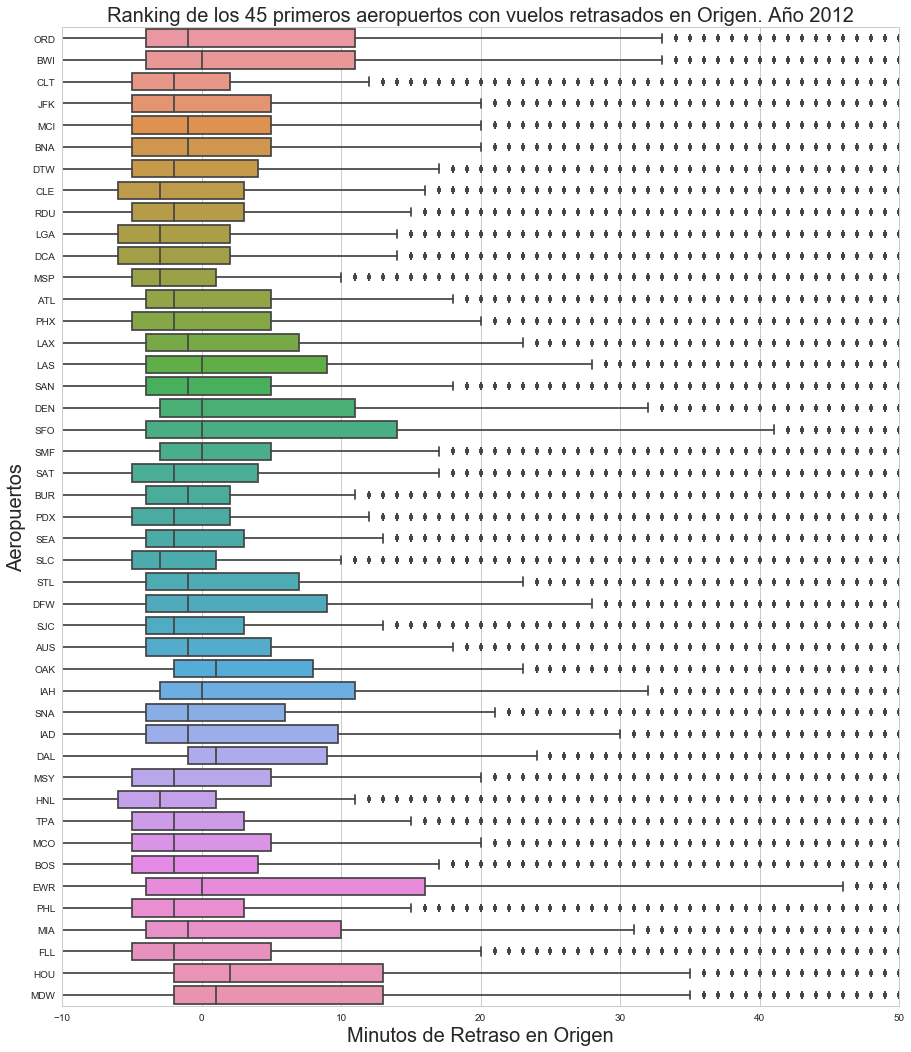

In [66]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-10,50)
ax = sns.boxplot(x=retrasosSalidaEnAeropuertos["DepDelay"], y=retrasosSalidaEnAeropuertos["Origin"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Origen", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

In [67]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en salidas
vuelosTotalesPorAeropuerto = retrasosSalidaEnAeropuertos.groupby('Origin').aggregate({'Origin': 'count', 'DepDel15':'sum'})

In [68]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Origin': 'VuelosTotales', 'DepDel15': 'VuelosRetrasados'})

In [69]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados de salida en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [70]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de salida en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

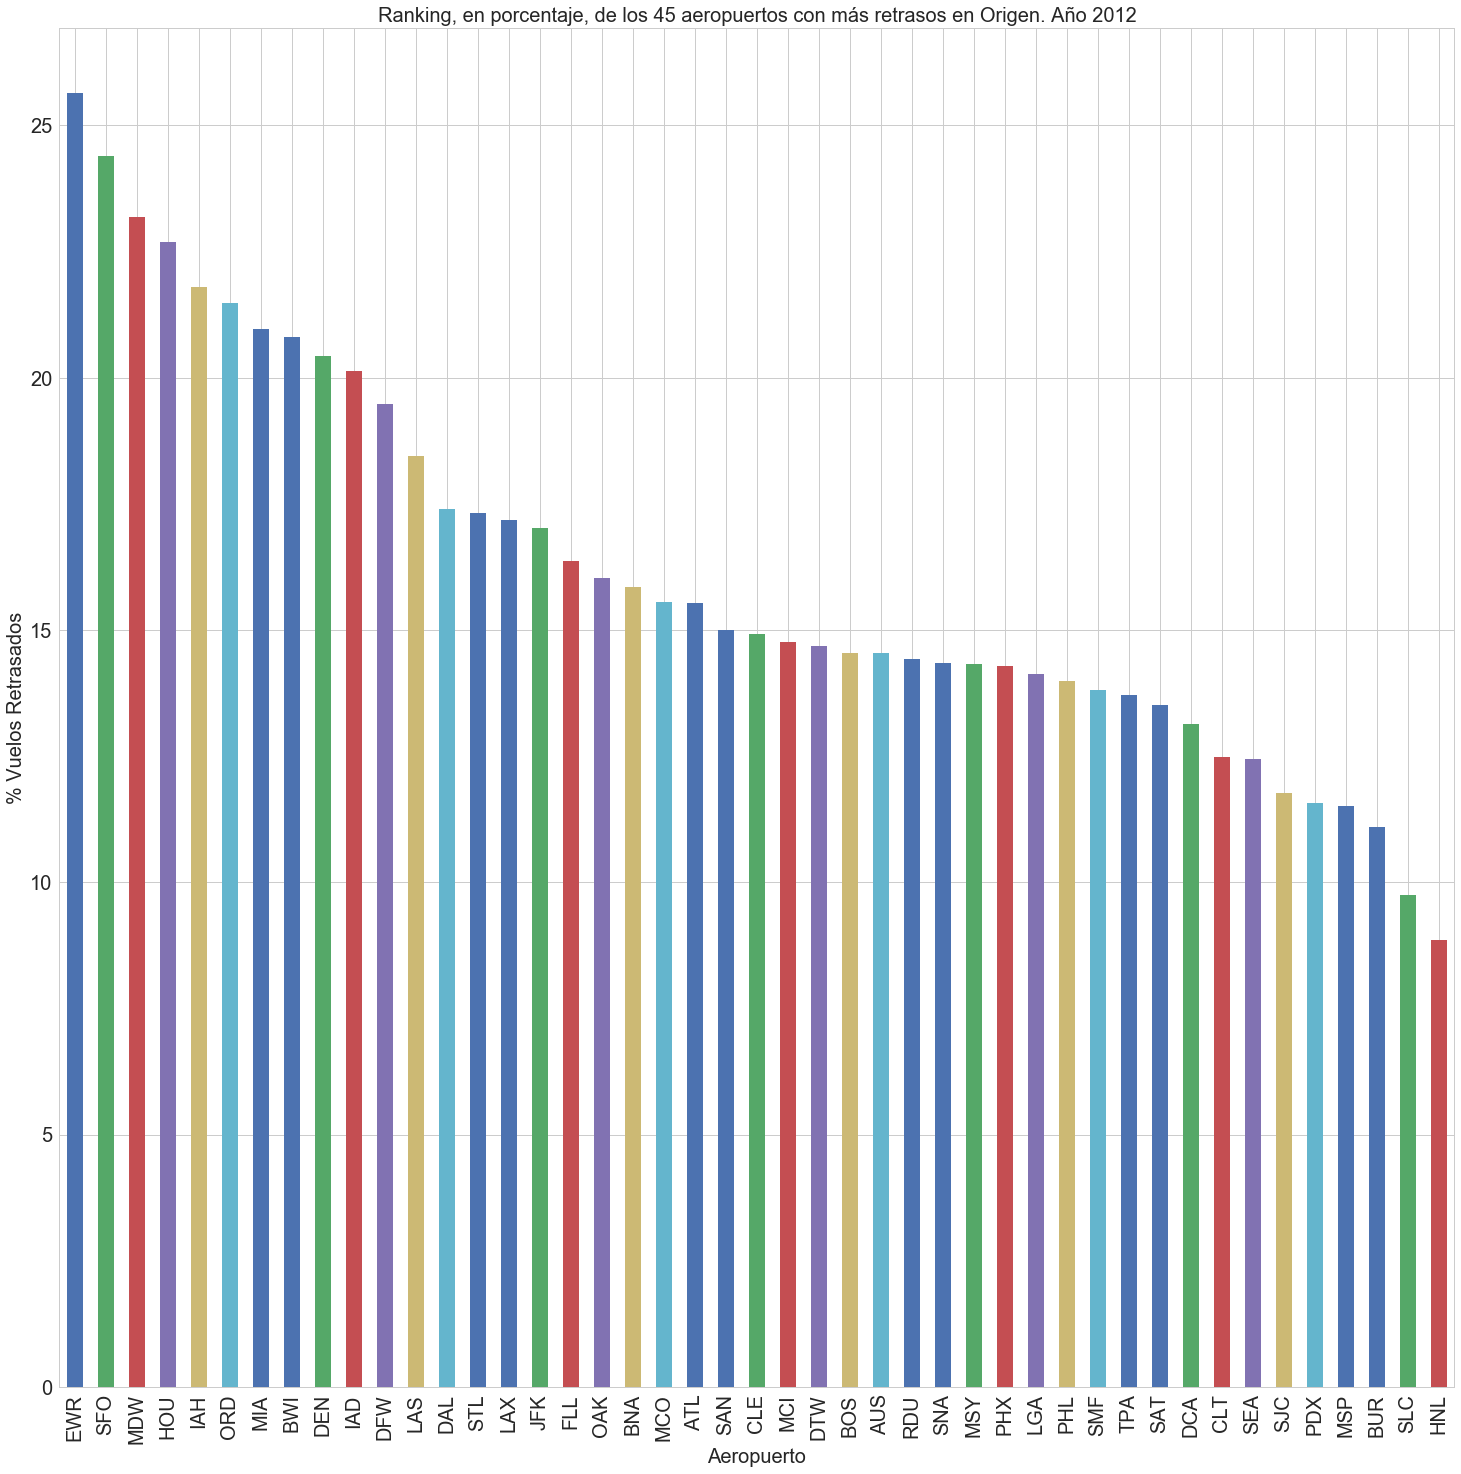

In [71]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

#### Dado que no podemos discernir si el mal tiempo fue a la llegada o la salida, en los retrasos de los vuelos de salida, así como en el caso de que el motivo sea el espacio aéreo, sólo podemos sacar el retraso, en llegadas, en función de la llegada tardía del vuelo anterior y por la aerolínea.

In [72]:
retrasosSalidaEnAeropuertos = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['DepDel15'] == 1])

In [73]:
retrasosSalidaEnAeropuertos.shape

(799449, 50)

In [74]:
#retrasos medios en salidas por aeropuerto causados por la llegada tardía del vuelo anterior
retrasoMedioEnSalidasPorLateAircraft = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['LateAircraftDelay'] > 0])


In [75]:
#usamos la media
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean', 'LateAircraftDelay' : 'mean'})

In [76]:
#renombramos las columnas
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal', 'LateAircraftDelay' : 'MediaTiempoRetrasado'})

In [77]:
#ordenamos por aeropuertos con retraso por llegada tardía del vuelo anterior
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.sort_values(['MediaTiempoRetrasado'], ascending=False)

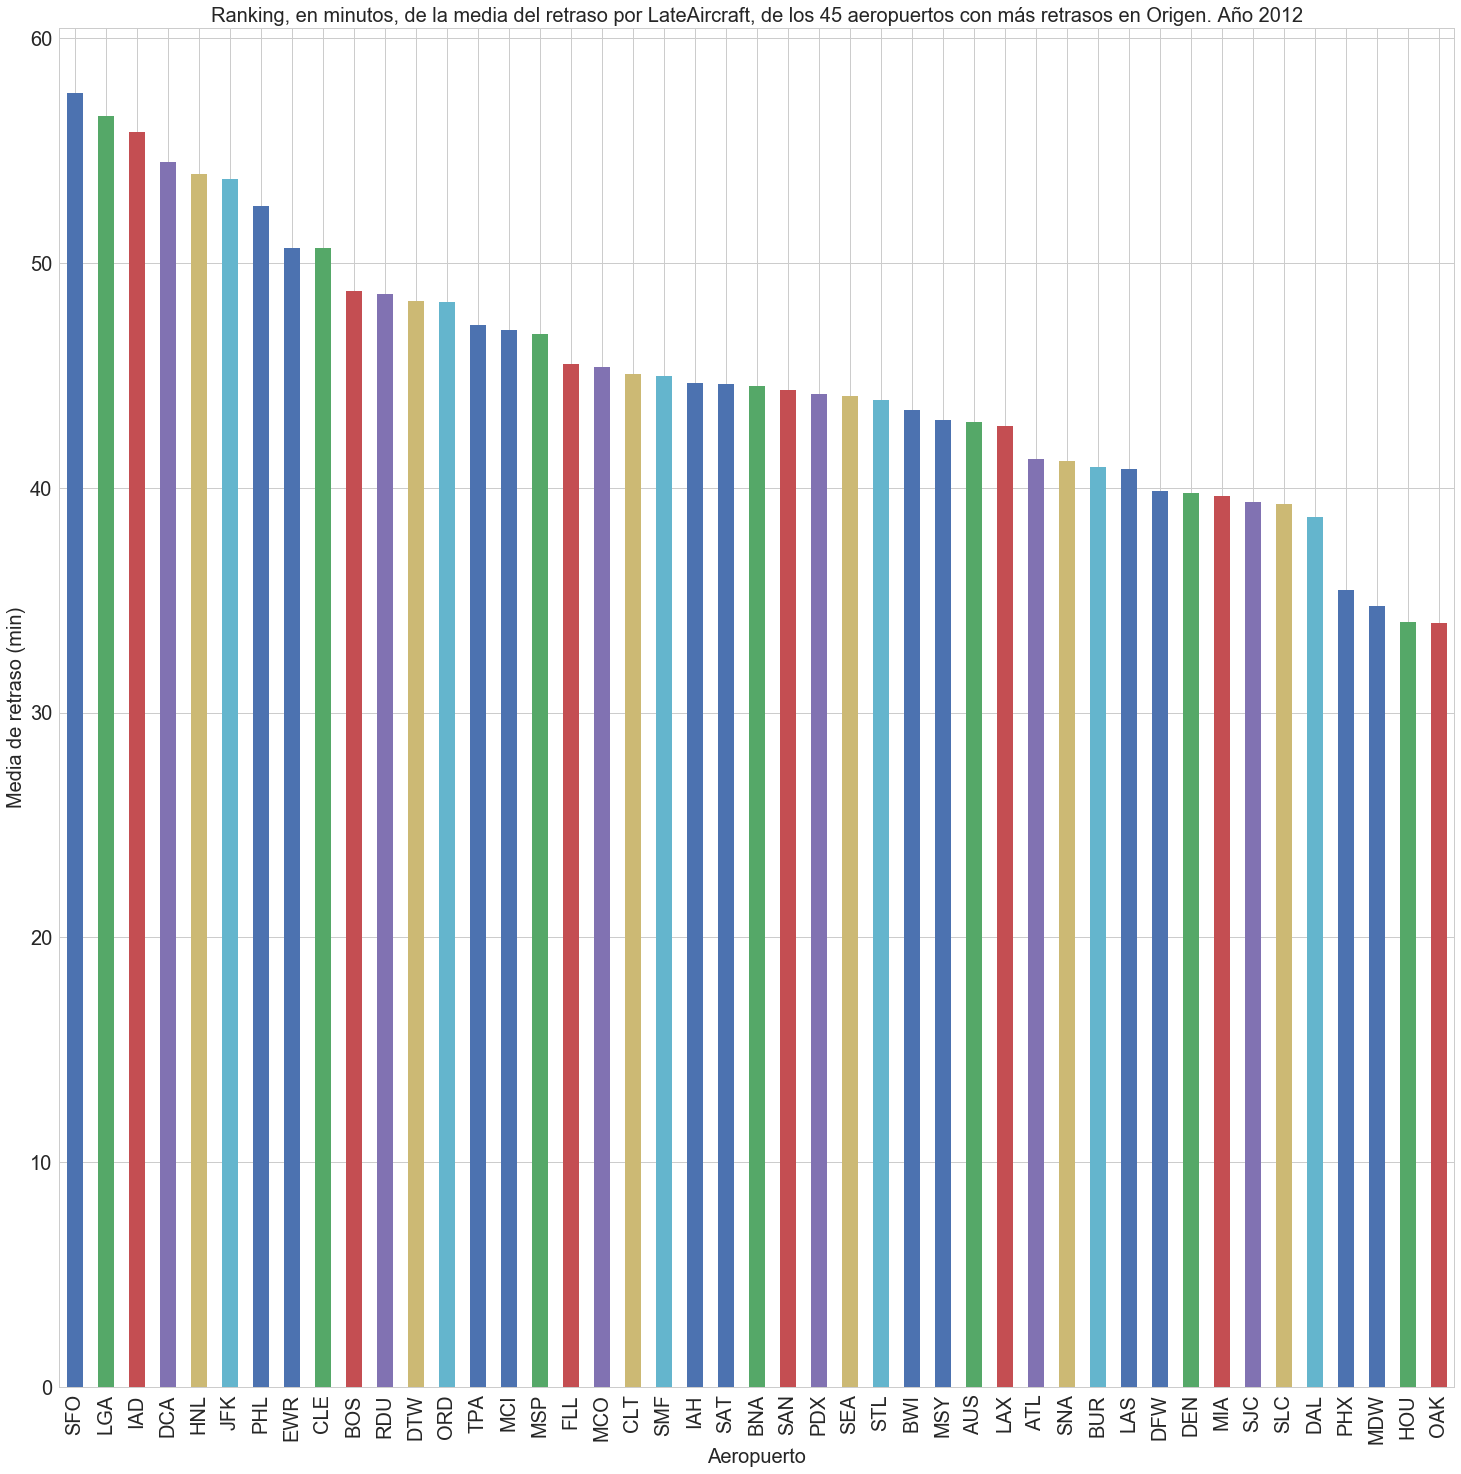

In [78]:
#mostramos la media de los retrasos por aeropuerto, ordenados, de los 45 aeropuertos con más retrasos

ax = retrasoMedioEnSalidasPorLateAircraft.MediaTiempoRetrasado.plot(kind='bar', figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media de retraso (min)", fontsize=20)
ax.set_title('Ranking, en minutos, de la media del retraso por LateAircraft, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

In [79]:
#mostramos el peso del retraso por llegada tardía del avión respecto al retraso total de la salida 
#(es decir por si tuvo otros factores)

retrasoMedioEnSalidasPorLateAircraft['PesoRetraso'] = (retrasoMedioEnSalidasPorLateAircraft['MediaTiempoRetrasado'] / retrasoMedioEnSalidasPorLateAircraft['MediaRetrasoTotal'])*100


In [80]:
#ordenamos por de mayor a menor peso
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.sort_values(['PesoRetraso'], ascending=False)

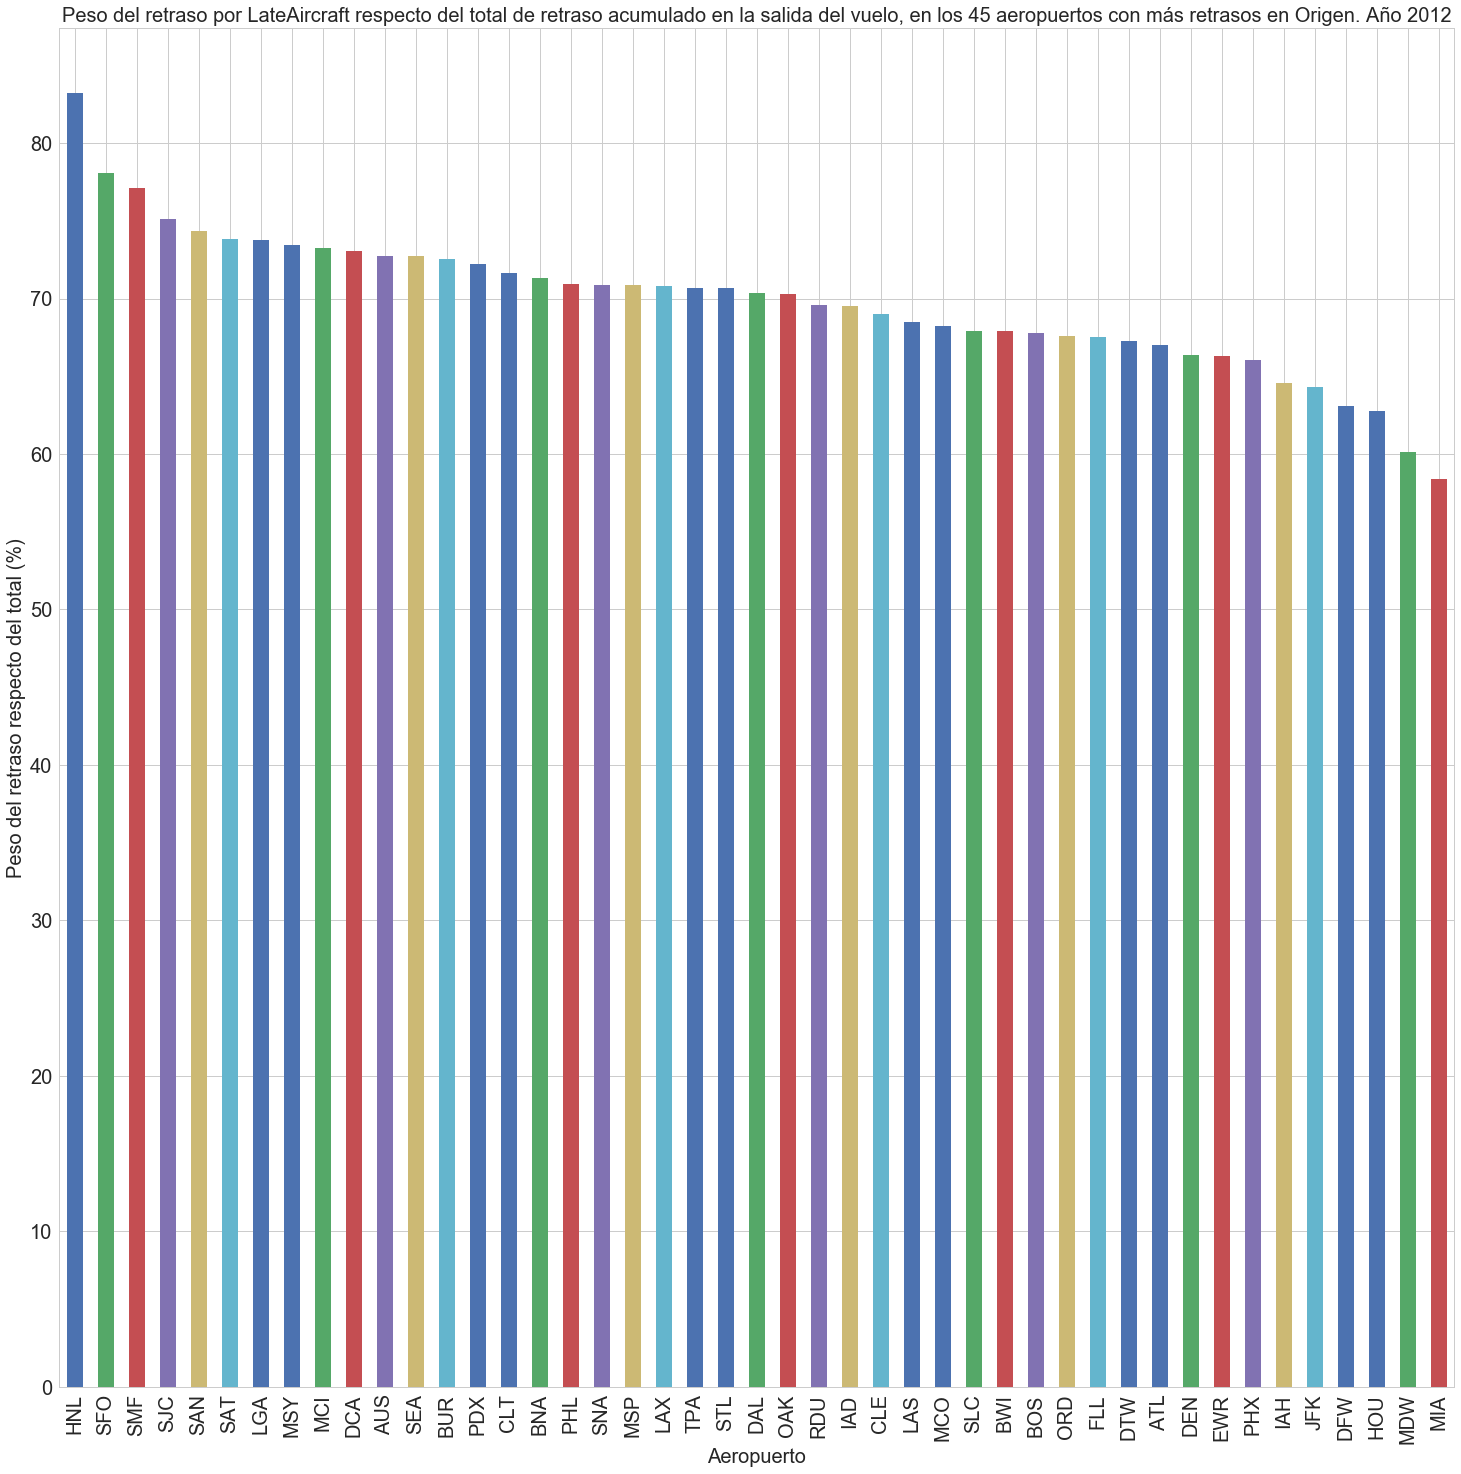

In [81]:
#mostramos  el peso del retraso de llegada tardía del vuelo anterior respecto del retraso total

ax = retrasoMedioEnSalidasPorLateAircraft.PesoRetraso.plot(kind='bar', figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Peso del retraso respecto del total (%)", fontsize=20)
ax.set_title('Peso del retraso por LateAircraft respecto del total de retraso acumulado en la salida del vuelo, en los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

#### Aquellos vuelos retrasados que al menos lo están por la llegada tardía del vuelo anterior, tendrán otros motivos para llegar al 100% del peso relativo de la causa del retraso. Lo veremos más adelante.

In [82]:
#retrasos medios en salidas por aeropuerto causados por problemas de la aerolínea
retrasoMedioEnSalidasPorAerolinea = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['CarrierDelay'] > 0])

#usamos la media 
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean', 'CarrierDelay' : 'mean'})

#renombramos las columnas
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal', 'CarrierDelay' : 'MediaTiempoRetrasado'})

#ordenamos por aeropuertos con retraso por motivo de la aerolinea
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.sort_values(['MediaTiempoRetrasado'], ascending=False)

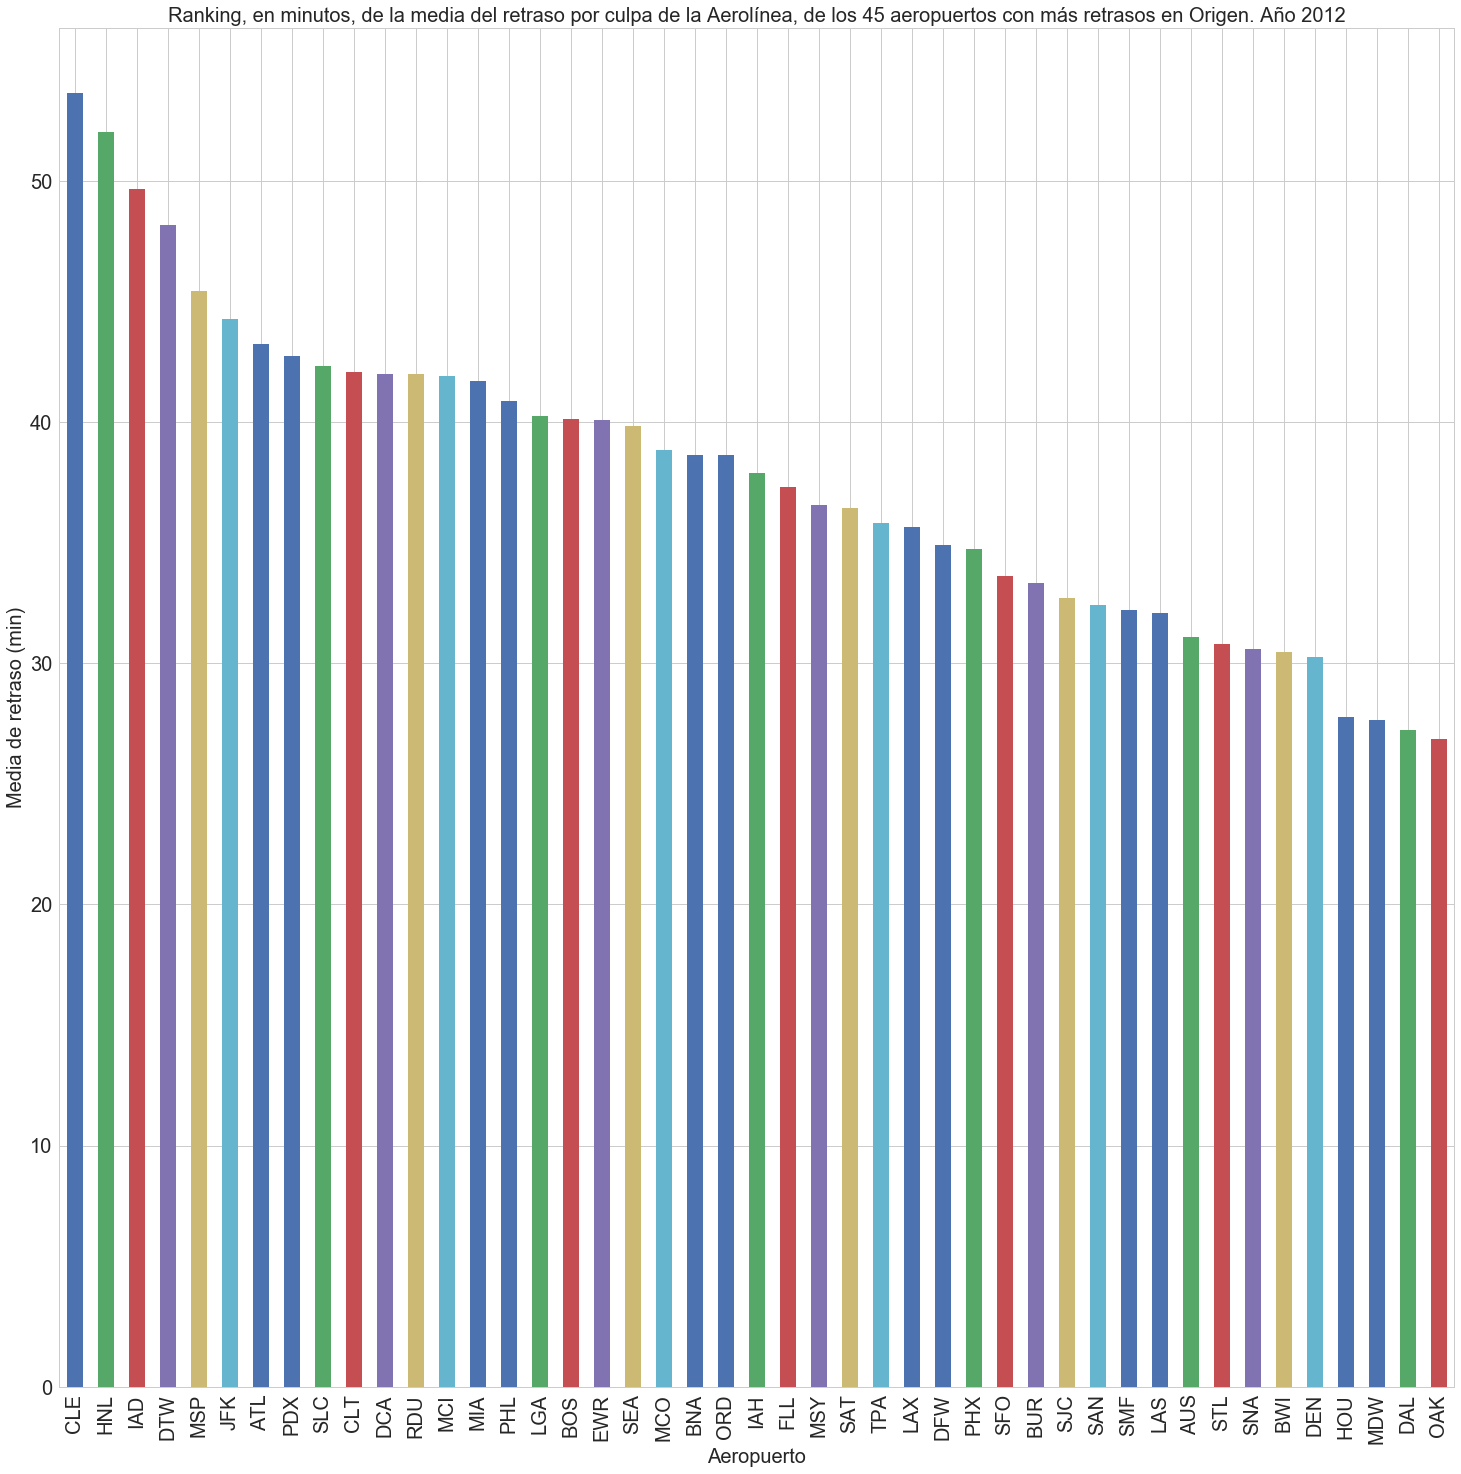

In [83]:
#mostramos la media de los retrasos por aeropuerto, ordenados, de los 45 aeropuertos con más retrasos

ax = retrasoMedioEnSalidasPorAerolinea.MediaTiempoRetrasado.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media de retraso (min)", fontsize=20)
ax.set_title('Ranking, en minutos, de la media del retraso por culpa de la Aerolínea, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)
plt.show()

In [84]:
#mostramos el peso del retraso por la aerolínea respecto al retraso total de la salida 
#(es decir por si tuvo otros factores)

retrasoMedioEnSalidasPorAerolinea['PesoRetraso'] = (retrasoMedioEnSalidasPorAerolinea['MediaTiempoRetrasado'] / retrasoMedioEnSalidasPorAerolinea['MediaRetrasoTotal'])*100

#ordenamos por de mayor a menor peso
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.sort_values(['PesoRetraso'], ascending=False)


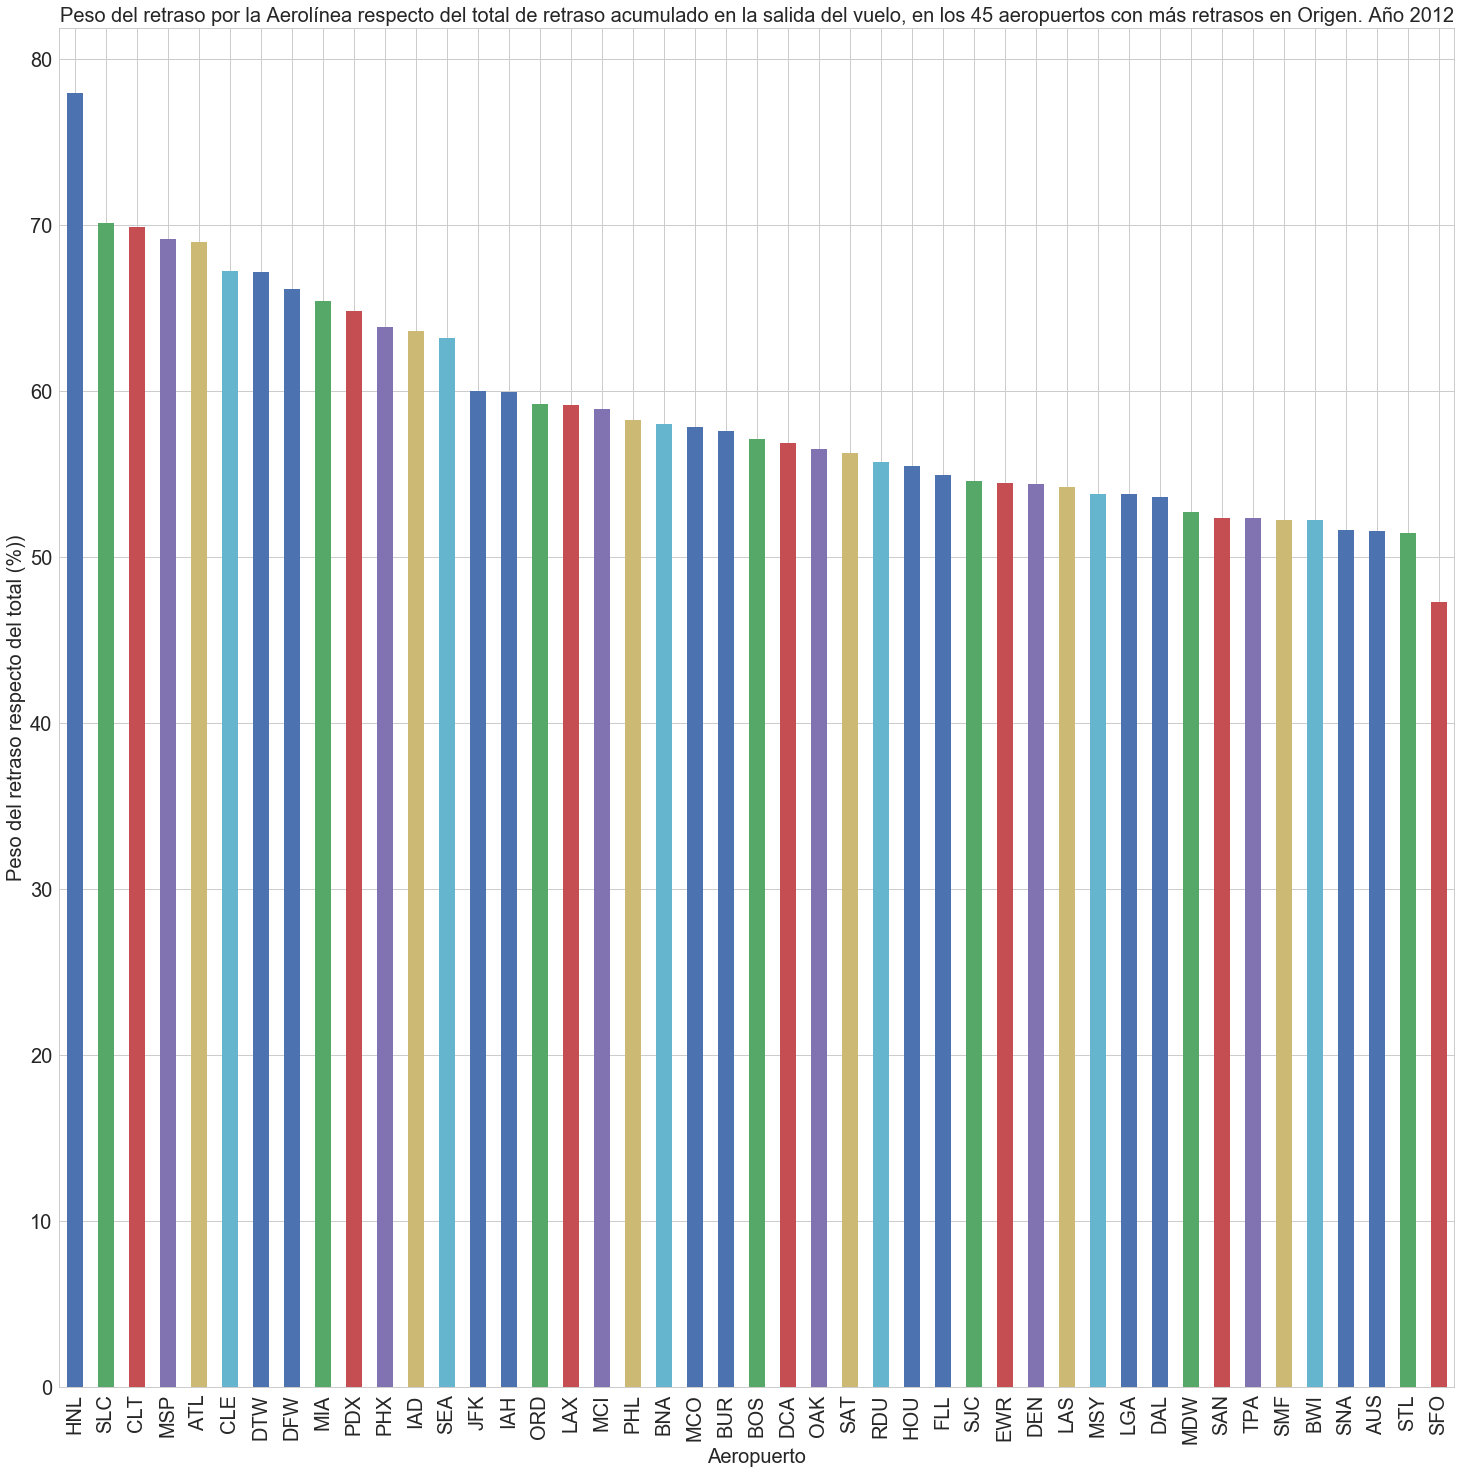

In [85]:
#mostramos el peso del retraso de la aerolínea respecto del retraso total

ax = retrasoMedioEnSalidasPorAerolinea.PesoRetraso.plot(kind='bar',
                                figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Peso del retraso respecto del total (%))", fontsize=20)
ax.set_title('Peso del retraso por la Aerolínea respecto del total de retraso acumulado en la salida del vuelo, en los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)
plt.show()

#### Aquellos vuelos retrasados que al menos lo están por la aerolínea, tendrán otros motivos para llegar al 100% del peso relativo de la causa del retraso. Lo veremos más adelante.

#### Vamos a coger las 3 combinaciones posibles para tratar de afinar más los motivos de retrasos en salidas
1. Que tenga retraso tanto por Aerolínea como por llegada tardía del avión
2. Que tenga retraso sólo por llegada tardía del avión
3. Que tengra retraso sólo por aerolínea

In [86]:
#primero cogemos todos los retrasos, sean cual sea el tipo en salidas
retrasosSalidaEnAeropuertos = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])
#nos quedamos con los 45 aeropuertos con más retrasos
retrasosSalidaEnAeropuertos= retrasosSalidaEnAeropuertos.loc[(retrasosSalidaEnAeropuertos["Origin"].isin(aeropuertos))]


In [87]:
retrasosSalidaEnAeropuertos.shape

(799449, 50)

In [88]:
#ahora cogemos las 3 combinaciones

#ambos tipos de retrasos
retrasosSalidaEnAeropuertosLateAndAirline = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] > 0) & (dfanual['LateAircraftDelay'] > 0)])

#retraso por llegada tardía del avión anterior
retrasosSalidaSoloLateAircraft = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] == 0) & (dfanual['LateAircraftDelay'] > 0)])

#retraso por la aerolínea
retrasosSalidaSoloAirline = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] > 0) & (dfanual['LateAircraftDelay'] == 0)])


In [89]:
#nos quedamos con los retrasos de los 45 primeros aeropuertos (por número de retrasos)

retrasosSalidaEnAeropuertosLateAndAirline= retrasosSalidaEnAeropuertosLateAndAirline.loc[(retrasosSalidaEnAeropuertosLateAndAirline["Origin"].isin(aeropuertos))]
retrasosSalidaSoloLateAircraft= retrasosSalidaSoloLateAircraft.loc[(retrasosSalidaSoloLateAircraft["Origin"].isin(aeropuertos))]
retrasosSalidaSoloAirline= retrasosSalidaSoloAirline.loc[(retrasosSalidaSoloAirline["Origin"].isin(aeropuertos))]


In [90]:
retrasosSalidaEnAeropuertosLateAndAirline.shape

(194162, 50)

In [91]:
retrasosSalidaSoloLateAircraft.shape

(191907, 50)

In [92]:
retrasosSalidaSoloAirline.shape

(186088, 50)

In [93]:
#podríamos inferir los de meteo en salidas si:
#el retraso de llegadas es menor o igual que al de salida y el conteo de meteo = al de salida

retrasosSalidaSoloMeteo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['WeatherDelay'] == dfanual['DepDelay'])])

In [94]:
retrasosSalidaSoloMeteo= retrasosSalidaSoloMeteo.loc[(retrasosSalidaSoloMeteo["Origin"].isin(aeropuertos))]

In [95]:
retrasosSalidaSoloMeteo.shape

(484, 50)

In [96]:
retrasosSalidaSoloNAS = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['NASDelay'] == dfanual['DepDelay'])])

In [97]:
retrasosSalidaSoloNAS= retrasosSalidaSoloNAS.loc[(retrasosSalidaSoloNAS["Origin"].isin(aeropuertos))]

In [98]:
retrasosSalidaSoloNAS.shape

(1159, 50)

In [99]:
retrasosSalidaSoloSecurity = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['SecurityDelay'] == dfanual['DepDelay'])])

In [100]:
retrasosSalidaSoloSecurity = retrasosSalidaSoloSecurity.loc[(retrasosSalidaSoloSecurity["Origin"].isin(aeropuertos))]

In [101]:
retrasosSalidaSoloSecurity.shape

(40, 50)

In [102]:
retrasosSalidaSoloLateAircraft2 = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['LateAircraftDelay'] == dfanual['DepDelay'])])

In [103]:
retrasosSalidaSoloLateAircraft2 = retrasosSalidaSoloLateAircraft2.loc[(retrasosSalidaSoloLateAircraft2["Origin"].isin(aeropuertos))]

In [104]:
retrasosSalidaSoloLateAircraft2.shape

(5255, 50)

In [105]:
retrasosSalidaSoloAerolinea2 = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['CarrierDelay'] == dfanual['DepDelay'])])

retrasosSalidaSoloAerolinea2 = retrasosSalidaSoloAerolinea2.loc[(retrasosSalidaSoloAerolinea2["Origin"].isin(aeropuertos))]

retrasosSalidaSoloAerolinea2.shape

(6929, 50)

### 1.3.3.2 Análisis de qué ocurre en el Aeropuerto de Destino si en Origen hay retrasos

#### Vuelos retrasados de salida que llegan con el mismo retraso a la llegada

In [106]:
retrasosSalidaIgualLlegada = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay'])])

In [107]:
retrasosSalidaIgualLlegada = retrasosSalidaIgualLlegada.loc[(retrasosSalidaIgualLlegada["Origin"].isin(aeropuertos))]


#### Vuelos de salida que aumentan su retraso en la llegada (por motivos adicionales a la salida)

In [108]:
retrasosPosterioresSalida = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] < dfanual['ArrDelay'])])

retrasosPosterioresSalida = retrasosPosterioresSalida.loc[(retrasosPosterioresSalida["Origin"].isin(aeropuertos))]


#### Vuelos de salida con retraso que recuperan todo el retraso a la llegada

In [109]:
retrasosRecuperados = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['ArrDelay'] <= 0)])

retrasosRecuperados = retrasosRecuperados.loc[(retrasosRecuperados["Origin"].isin(aeropuertos))]


In [110]:
recupera = retrasosRecuperados.shape[0]
igual = retrasosSalidaIgualLlegada.shape[0]
masTarde = retrasosPosterioresSalida.shape[0]

Text(0.5,1,'Capacidad de recuperación del retraso en destino por retraso en origen')

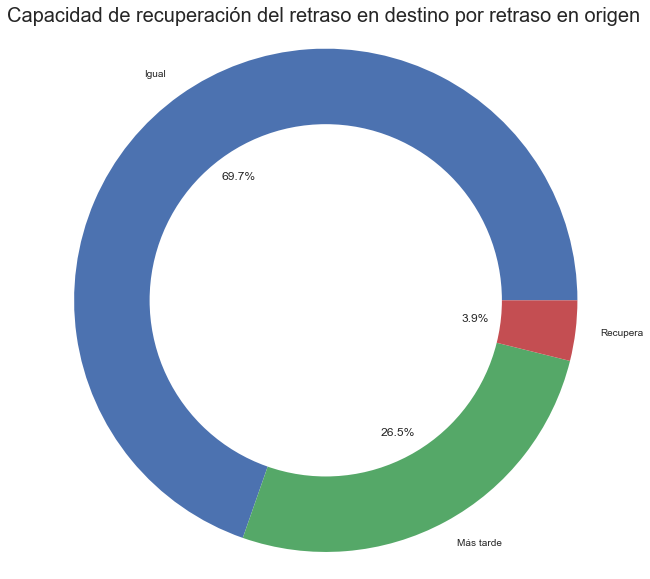

In [111]:
plt.figure(figsize=(10, 10))
etiquetas_1 = ['Igual', 'Más tarde', 'Recupera']
datos = [igual,masTarde, recupera]

plt.pie(datos, labels=etiquetas_1, autopct='%1.1f%%')
centre_circle_1 = plt.Circle((0, 0), 0.7, fc='white')
fig_1 = plt.gcf()
fig_1.gca().add_artist(centre_circle_1)
plt.axis('equal')
plt.title('Capacidad de recuperación del retraso en destino por retraso en origen', fontsize=20)

### 1.3.3.3 Visualización retrasos en Destino con duración similar al Origen

In [112]:
#cálculo de los que no recuperan tiempo a la llegada, pero no llegan más tarde, visto por aeropuerto origen, 
#por aerolínea y por distancia del vuelo

retrasosSalidaIgualLlegadaPorAeropuertoOrigen = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAeropuertoOrigen = retrasosSalidaIgualLlegadaPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorAeropuertoDestino = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAeropuertoDestino = retrasosSalidaIgualLlegadaPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorAerolinea = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAerolinea = retrasosSalidaIgualLlegadaPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorDistanciaADestino = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorDistanciaADestino = retrasosSalidaIgualLlegadaPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


In [113]:
#ordenamos por de mayor a menor retraso
retrasosSalidaIgualLlegadaPorAeropuertoOrigen = retrasosSalidaIgualLlegadaPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosSalidaIgualLlegadaPorAeropuertoDestino = retrasosSalidaIgualLlegadaPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosSalidaIgualLlegadaPorAerolinea = retrasosSalidaIgualLlegadaPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


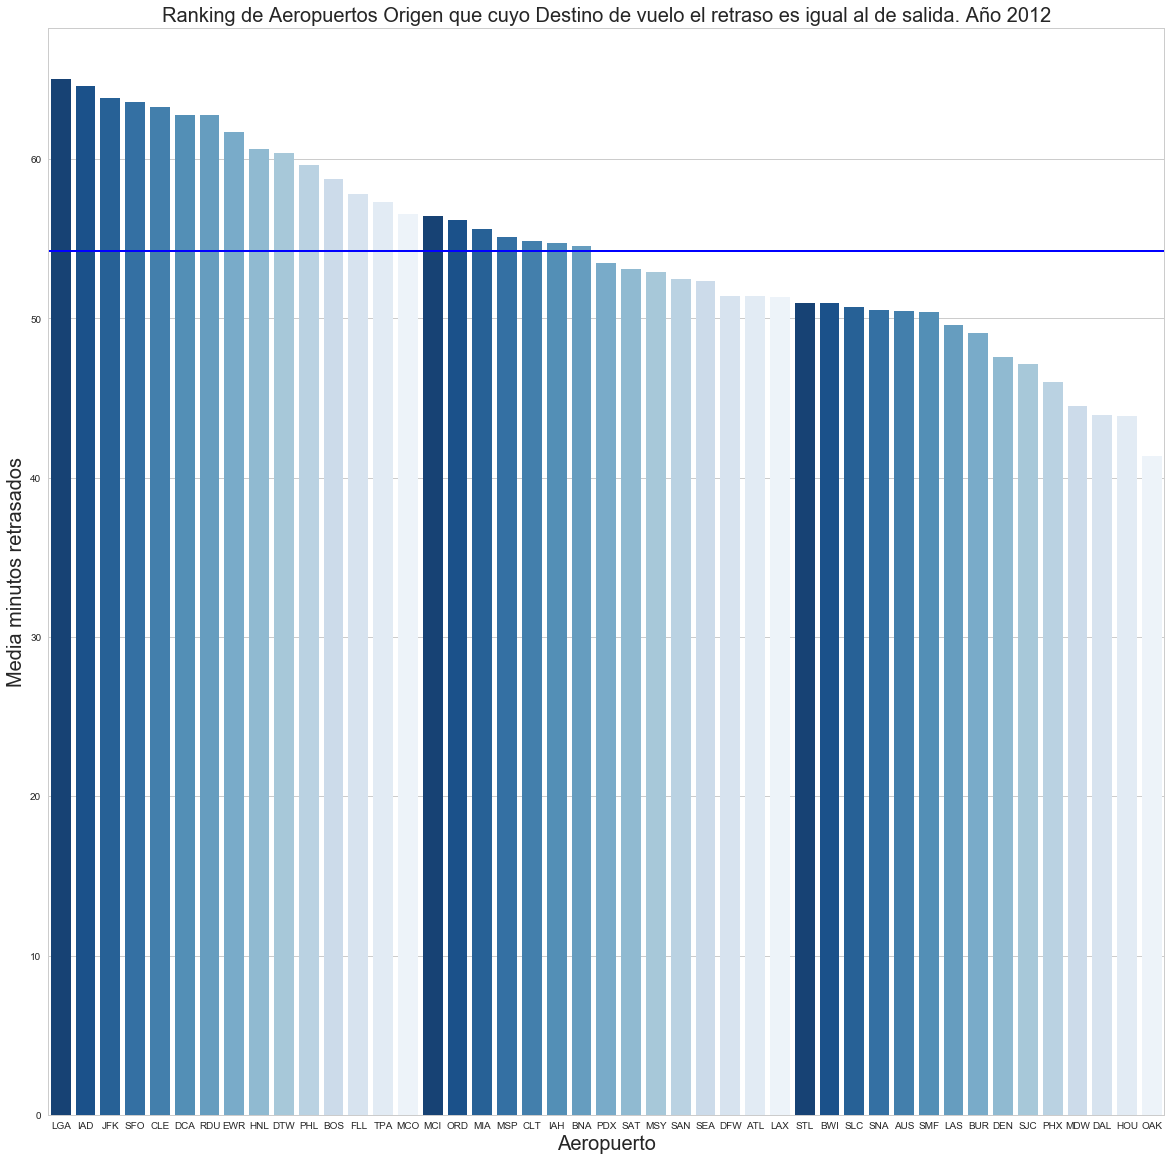

In [114]:
#Ranking de Aeropuertos Origen que cuyo Destino de vuelo el retraso es igual al de salida.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", 15)# len(retrasosSalidaIgualLlegadaPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAeropuertoOrigen.index, y=retrasosSalidaIgualLlegadaPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen que cuyo Destino de vuelo el retraso es igual al de salida. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

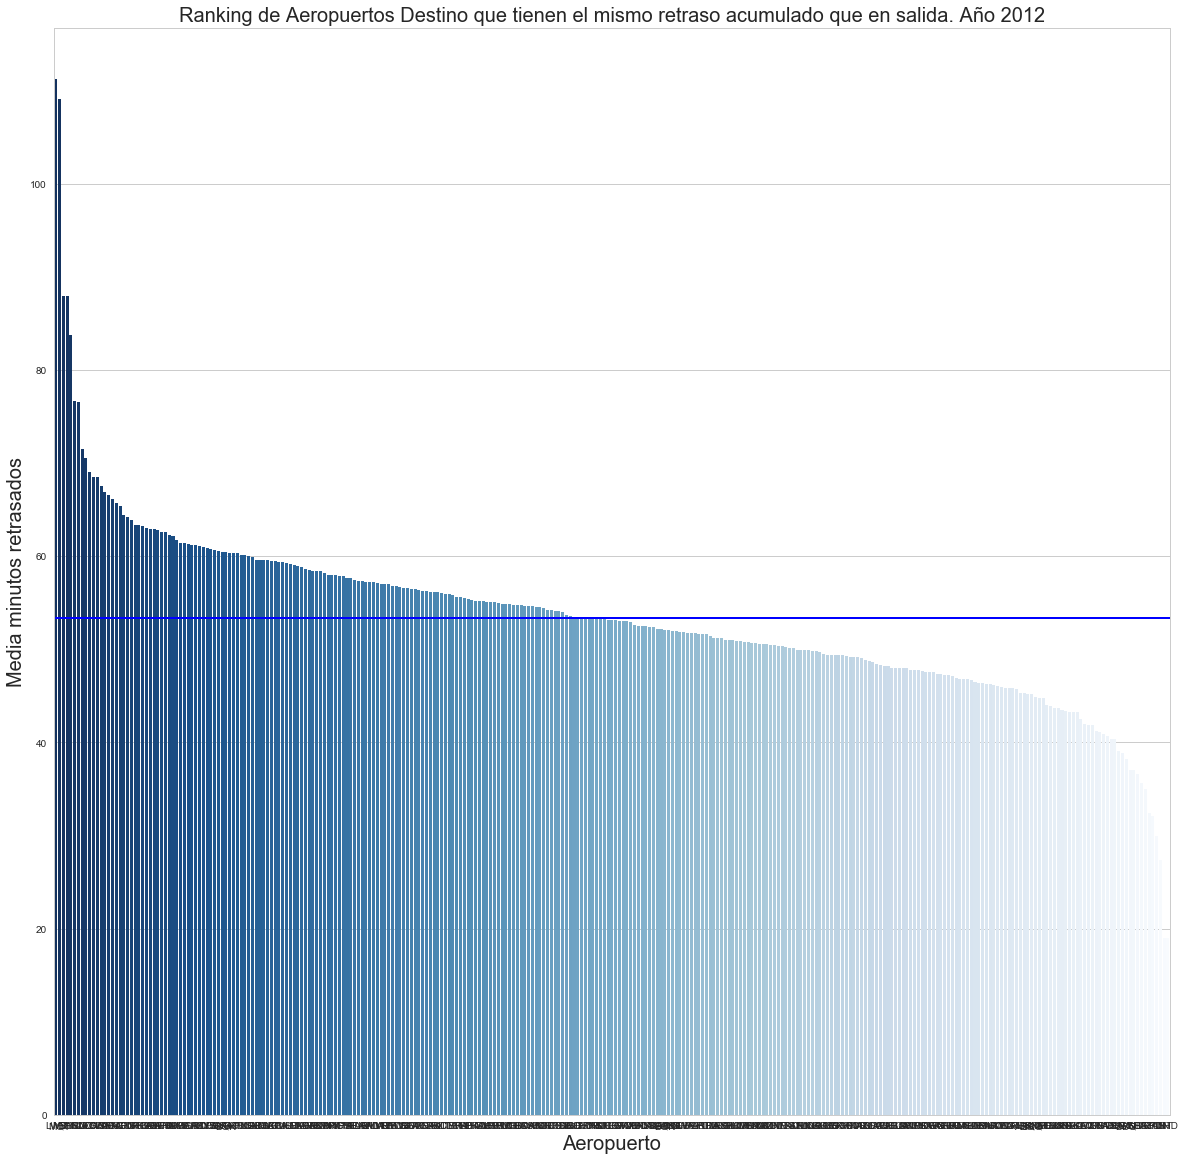

In [115]:
#Ranking de Aeropuertos Destino que tienen el mismo retraso acumulado que en salida

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaIgualLlegadaPorAeropuertoDestino))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAeropuertoDestino.index, y=retrasosSalidaIgualLlegadaPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que tienen el mismo retraso acumulado que en salida. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

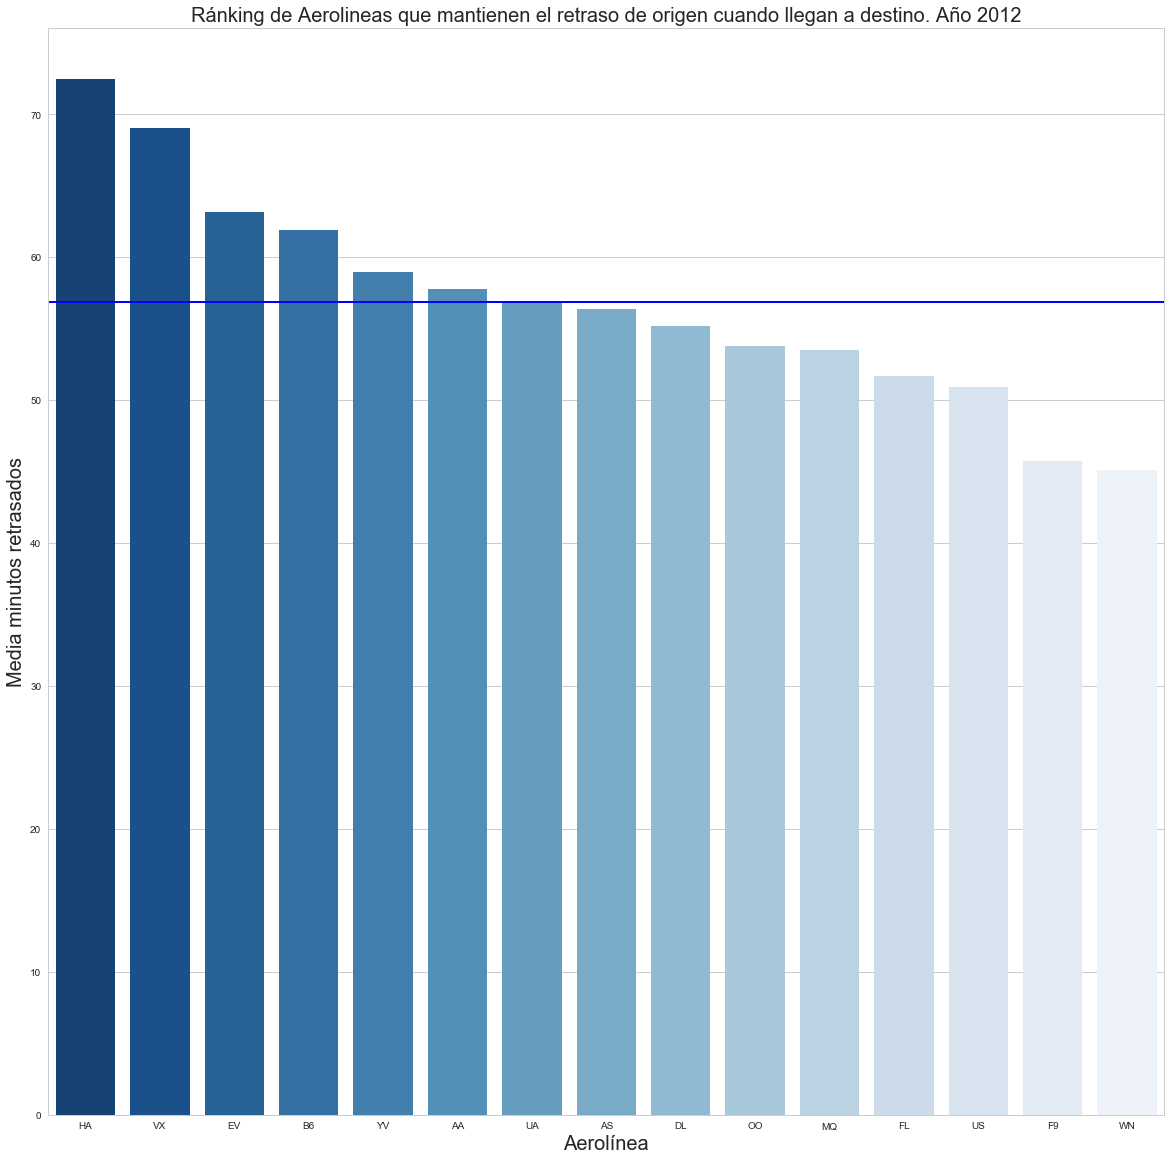

In [116]:
#Ránking de Aerolineas que mantienen el retraso de origen cuando llegan a destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaIgualLlegadaPorAerolinea))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAerolinea.index, y=retrasosSalidaIgualLlegadaPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que mantienen el retraso de origen cuando llegan a destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

In [117]:
#el índice de este DataFrame contiene lo que había en DistanceGroups
#que son los rangos de distancias separados en 250 millas
#para las etiquetas del gráfico, en el eje x, lo convertimos a rangos reales para mejorar la comprensión

my_xticks = []
desde = 0
for index, row in retrasosSalidaIgualLlegadaPorDistanciaADestino.iterrows():
    hasta = index * 250
    my_xticks.append(str(desde) + '-' + str(hasta))
    desde = hasta
    
my_xticks

['0-250',
 '250-500',
 '500-750',
 '750-1000',
 '1000-1250',
 '1250-1500',
 '1500-1750',
 '1750-2000',
 '2000-2250',
 '2250-2500',
 '2500-2750']

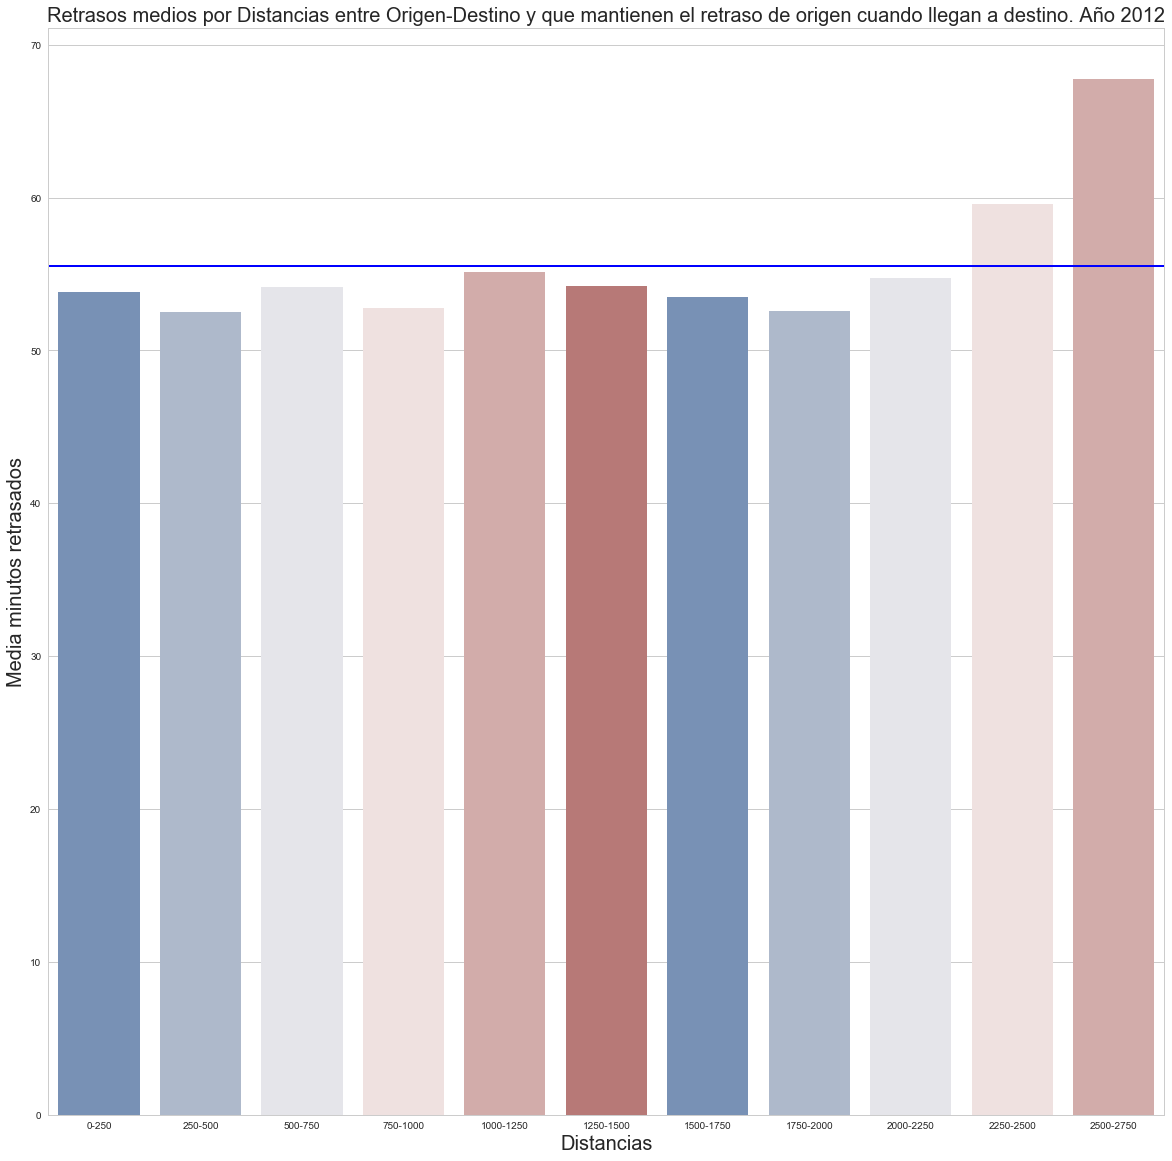

In [118]:
#Retrasos medios por Distancias entre Origen-Destino y que mantienen el retraso de origen cuando llegan a destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosSalidaIgualLlegadaPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino y que mantienen el retraso de origen cuando llegan a destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.4 Visualización de Retrasos en Destino que aumentan con respecto al de Origen

In [119]:
#cálculo de los que el retraso aumenta en Destino con respecto al retraso de Origen
#Visto por origen, destino, aerolínea y por distancia del vuelo

retrasosPosterioresSalidaPorAeropuertoOrigen = pd.DataFrame(retrasosPosterioresSalida.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAeropuertoOrigen = retrasosPosterioresSalidaPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorAeropuertoDestino = pd.DataFrame(retrasosPosterioresSalida.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAeropuertoDestino = retrasosPosterioresSalidaPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorAerolinea = pd.DataFrame(retrasosPosterioresSalida.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAerolinea = retrasosPosterioresSalidaPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorDistanciaADestino = pd.DataFrame(retrasosPosterioresSalida.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorDistanciaADestino = retrasosPosterioresSalidaPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [120]:
#ordenamos por de mayor a menor retraso
retrasosPosterioresSalidaPorAeropuertoOrigen = retrasosPosterioresSalidaPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosPosterioresSalidaPorAeropuertoDestino = retrasosPosterioresSalidaPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosPosterioresSalidaPorAerolinea = retrasosPosterioresSalidaPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


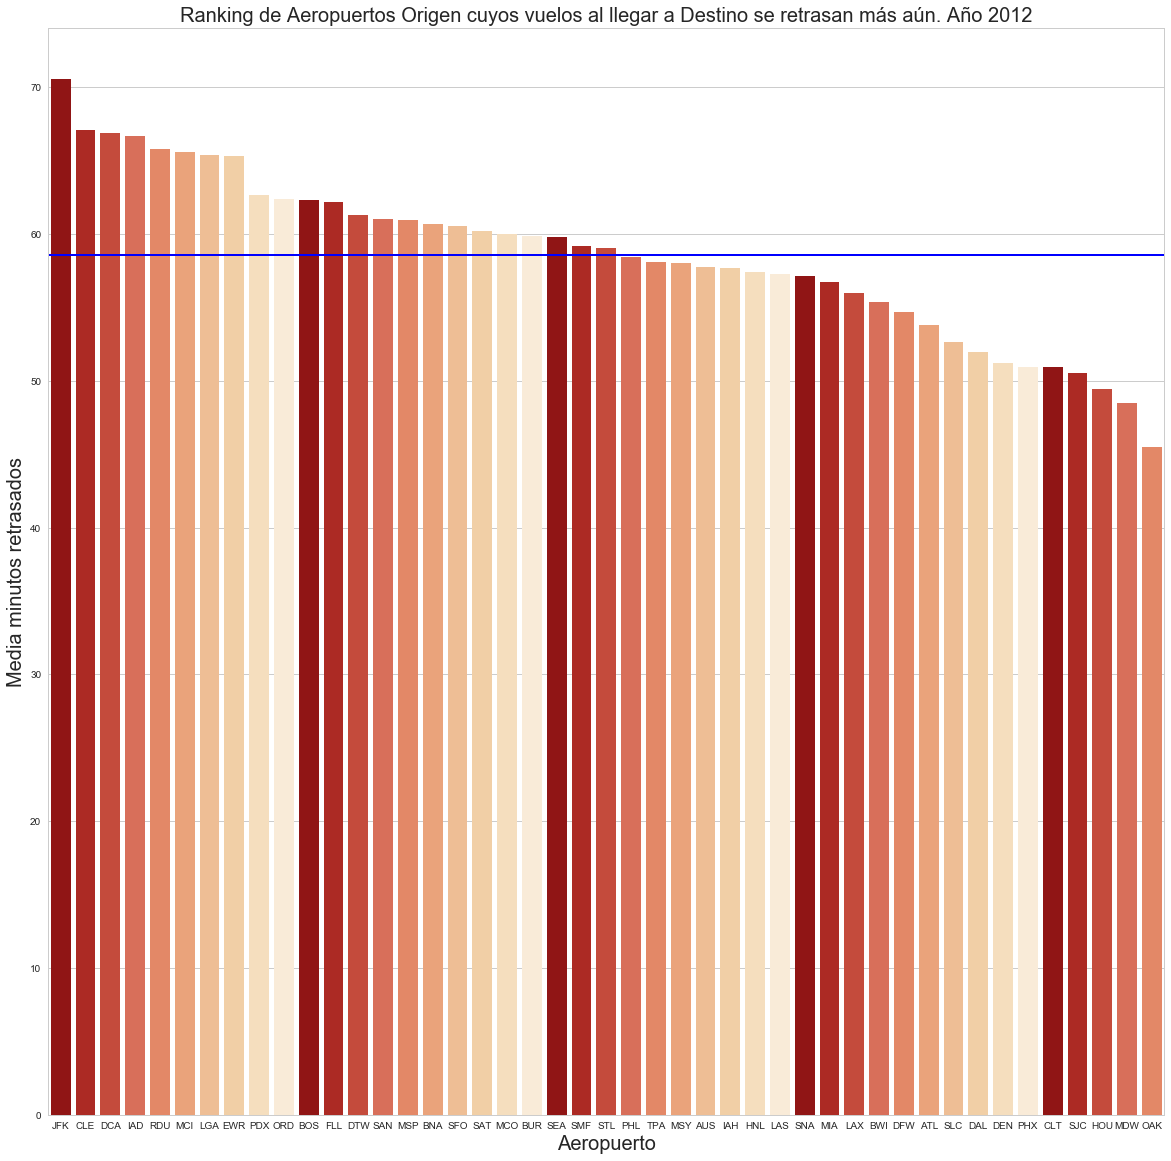

In [121]:
#Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino se retrasan más aún

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", 10) #len(retrasosPosterioresSalidaPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAeropuertoOrigen.index, y=retrasosPosterioresSalidaPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino se retrasan más aún. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

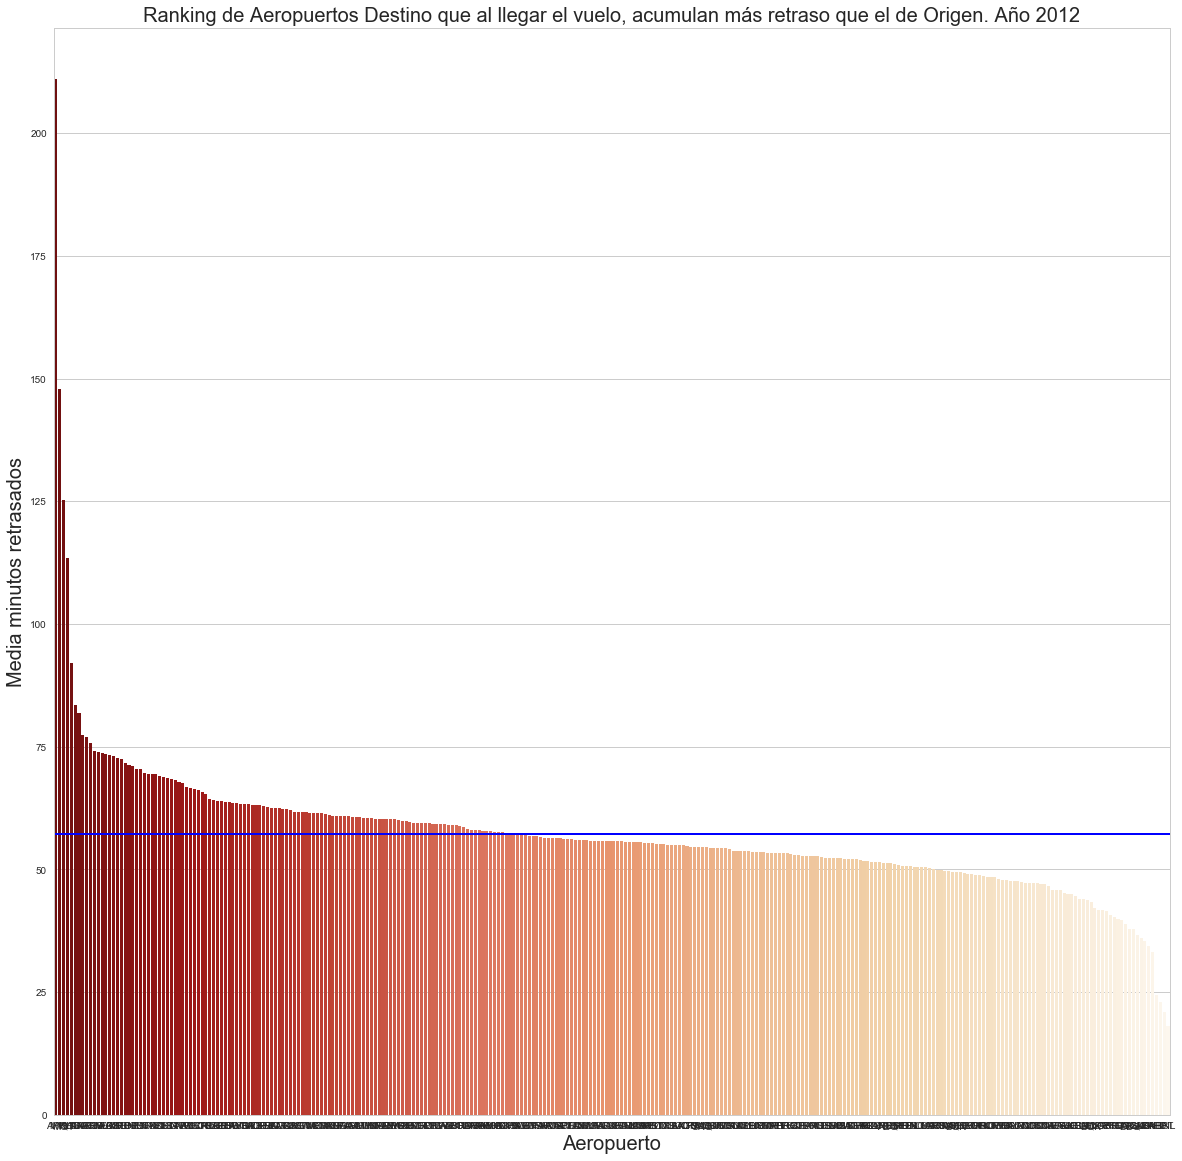

In [122]:
#Ranking de Aeropuertos Destino que al llegar el vuelo, acumulan más retraso que el de Origen.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorAeropuertoDestino))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAeropuertoDestino.index, y=retrasosPosterioresSalidaPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que al llegar el vuelo, acumulan más retraso que el de Origen. Año ' + year, fontsize=20)


plt.axhline(retrasosPosterioresSalidaPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

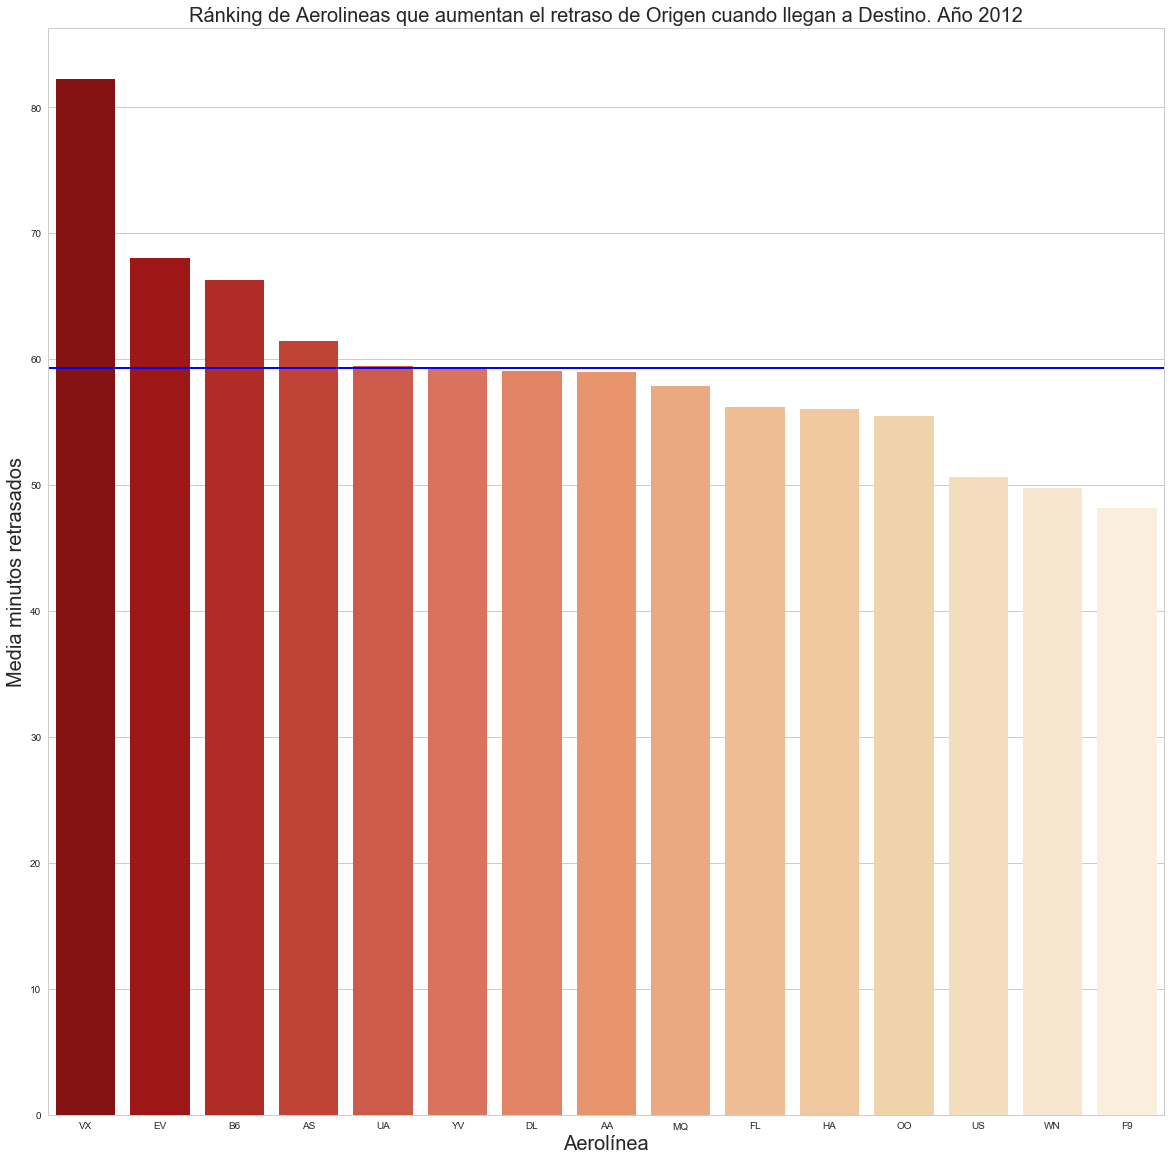

In [123]:
#Ránking de Aerolineas que aumentan el retraso de Origen cuando llegan a Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorAerolinea))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAerolinea.index, y=retrasosPosterioresSalidaPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que aumentan el retraso de Origen cuando llegan a Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

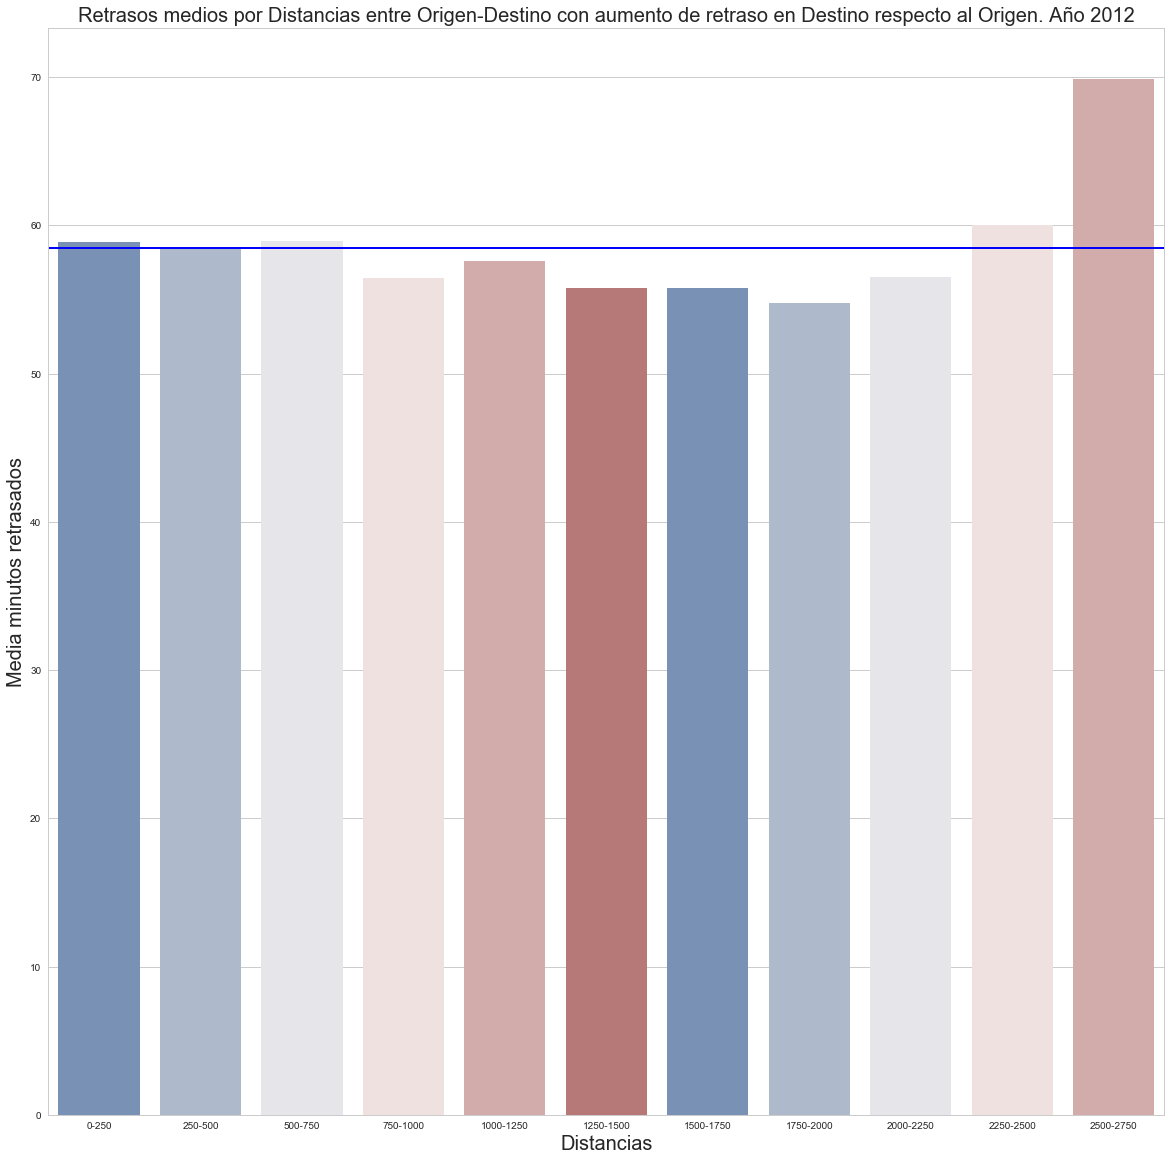

In [124]:
#Retrasos medios por Distancias entre Origen-Destino y que aumenta el retraso en Destino respecto al Origen

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosPosterioresSalidaPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino con aumento de retraso en Destino respecto al Origen. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.5 Visualización de Recuperación del tiempo de retraso, de Origen, en Destino.

In [125]:
#cálculo de los que el retraso de origen se recupera al llegar al Destino
#Visto por origen, destino, aerolínea y por distancia del vuelo

retrasosRecuperadosPorAeropuertoOrigen = pd.DataFrame(retrasosRecuperados.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAeropuertoOrigen = retrasosRecuperadosPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorAeropuertoDestino = pd.DataFrame(retrasosRecuperados.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAeropuertoDestino = retrasosRecuperadosPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorAerolinea = pd.DataFrame(retrasosRecuperados.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAerolinea = retrasosRecuperadosPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorDistanciaADestino = pd.DataFrame(retrasosRecuperados.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorDistanciaADestino = retrasosRecuperadosPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [126]:
#ordenamos por de mayor a menor retraso
retrasosRecuperadosPorAeropuertoOrigen = retrasosRecuperadosPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosRecuperadosPorAeropuertoDestino = retrasosRecuperadosPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosRecuperadosPorAerolinea = retrasosRecuperadosPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


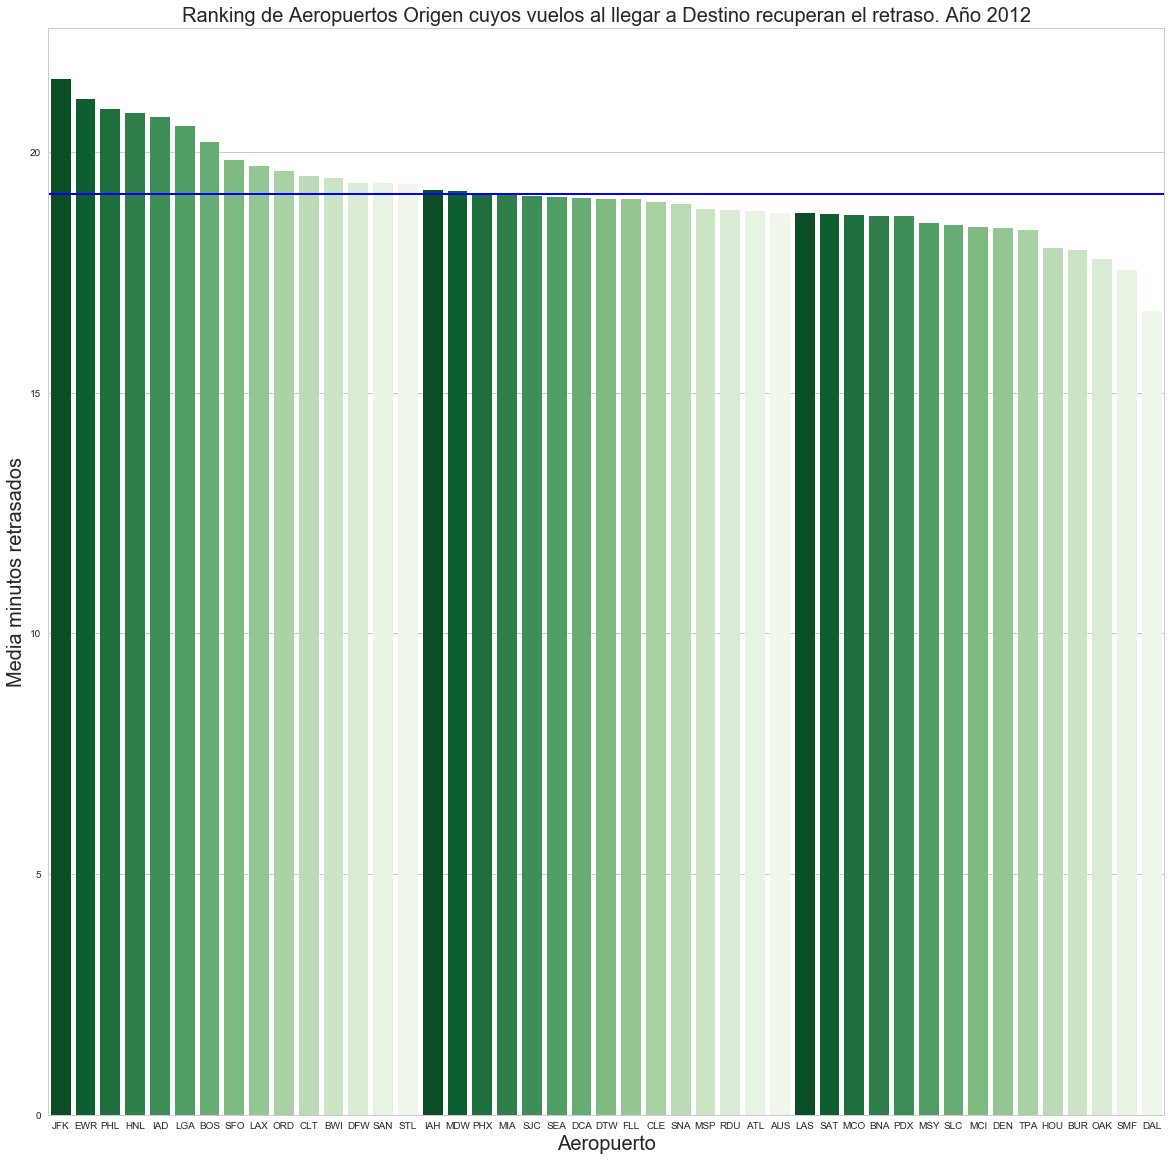

In [127]:
#Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino recuperan el retraso

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", 15) #len(retrasosRecuperadosPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosRecuperadosPorAeropuertoOrigen.index, y=retrasosRecuperadosPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino recuperan el retraso. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

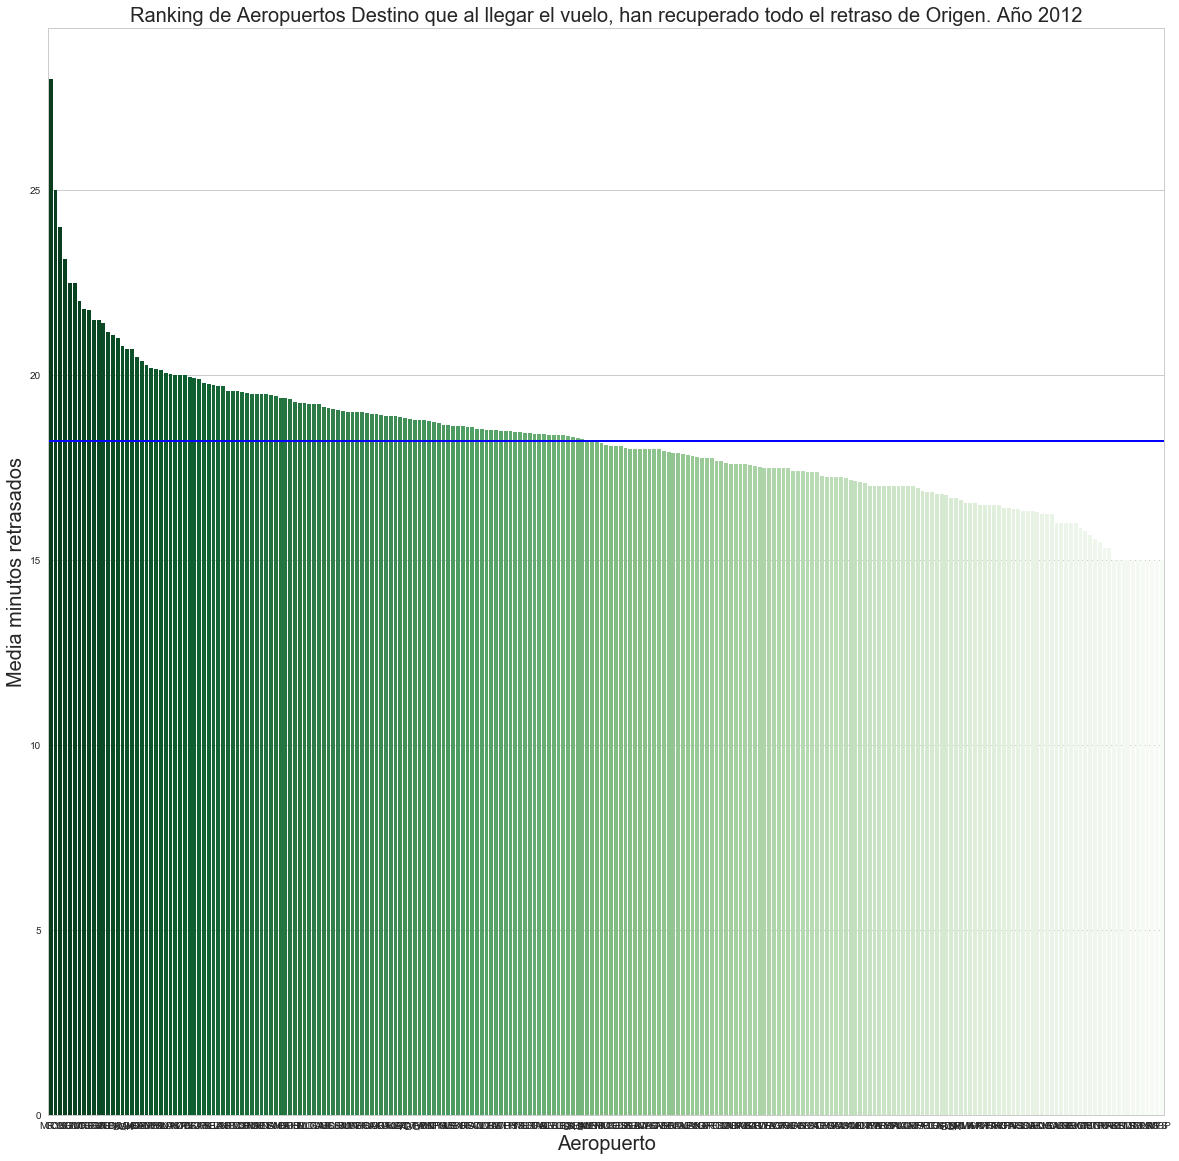

In [128]:
#Ranking de Aeropuertos Destino que al llegar el vuelo, han recuperado todo el retraso de Origen.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperadosPorAeropuertoDestino))
ax = sns.barplot(x=retrasosRecuperadosPorAeropuertoDestino.index, y=retrasosRecuperadosPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que al llegar el vuelo, han recuperado todo el retraso de Origen. Año ' + year, fontsize=20)


plt.axhline(retrasosRecuperadosPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

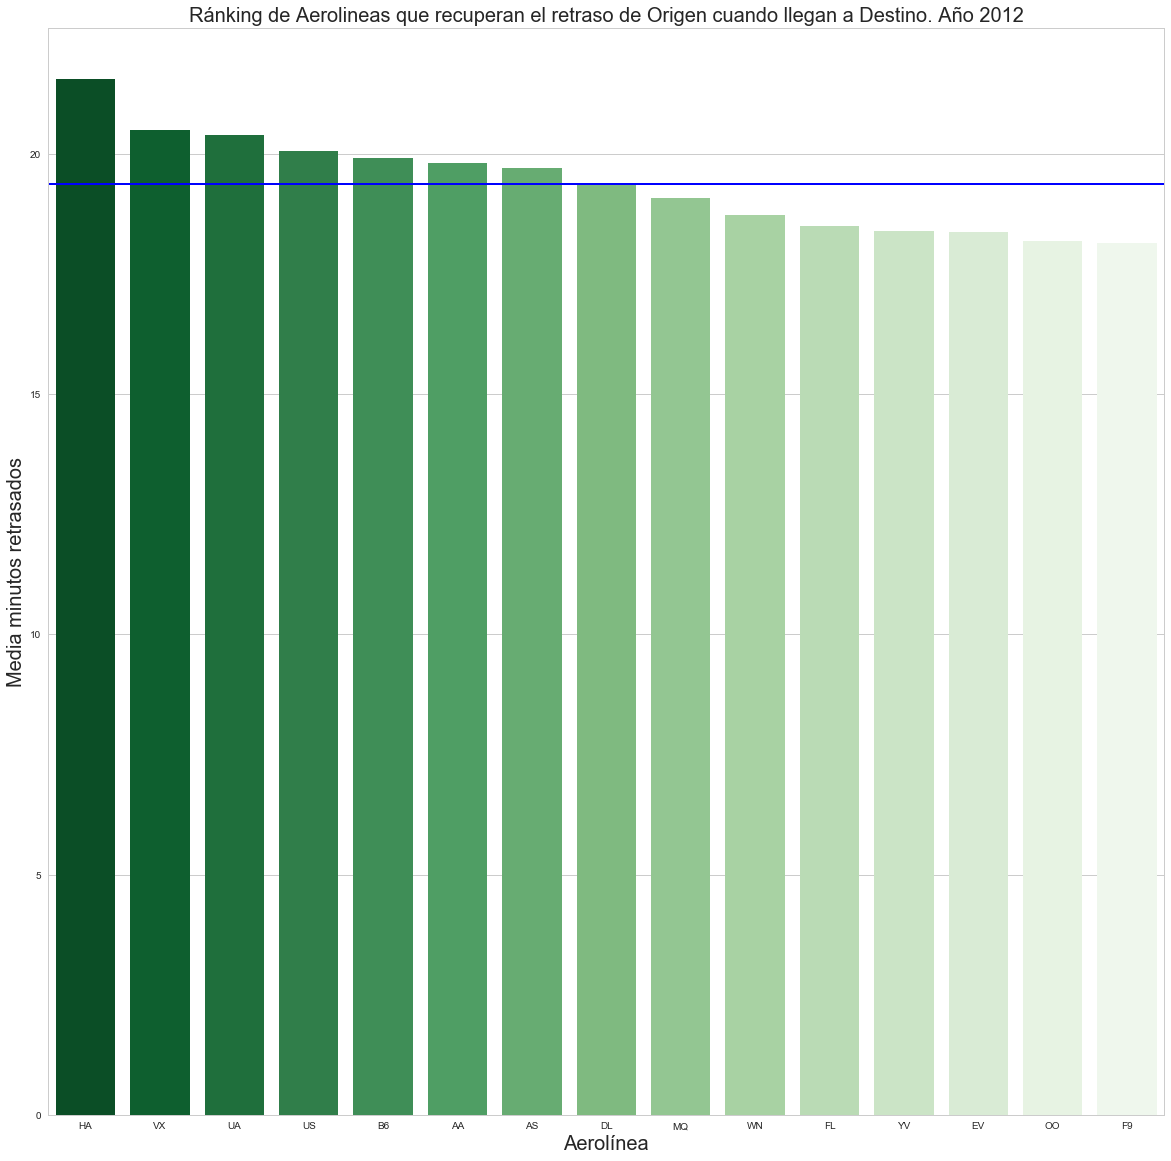

In [129]:
#Ránking de Aerolineas que recuperan el retraso de Origen cuando llegan a Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperadosPorAerolinea))
ax = sns.barplot(x=retrasosRecuperadosPorAerolinea.index, y=retrasosRecuperadosPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que recuperan el retraso de Origen cuando llegan a Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

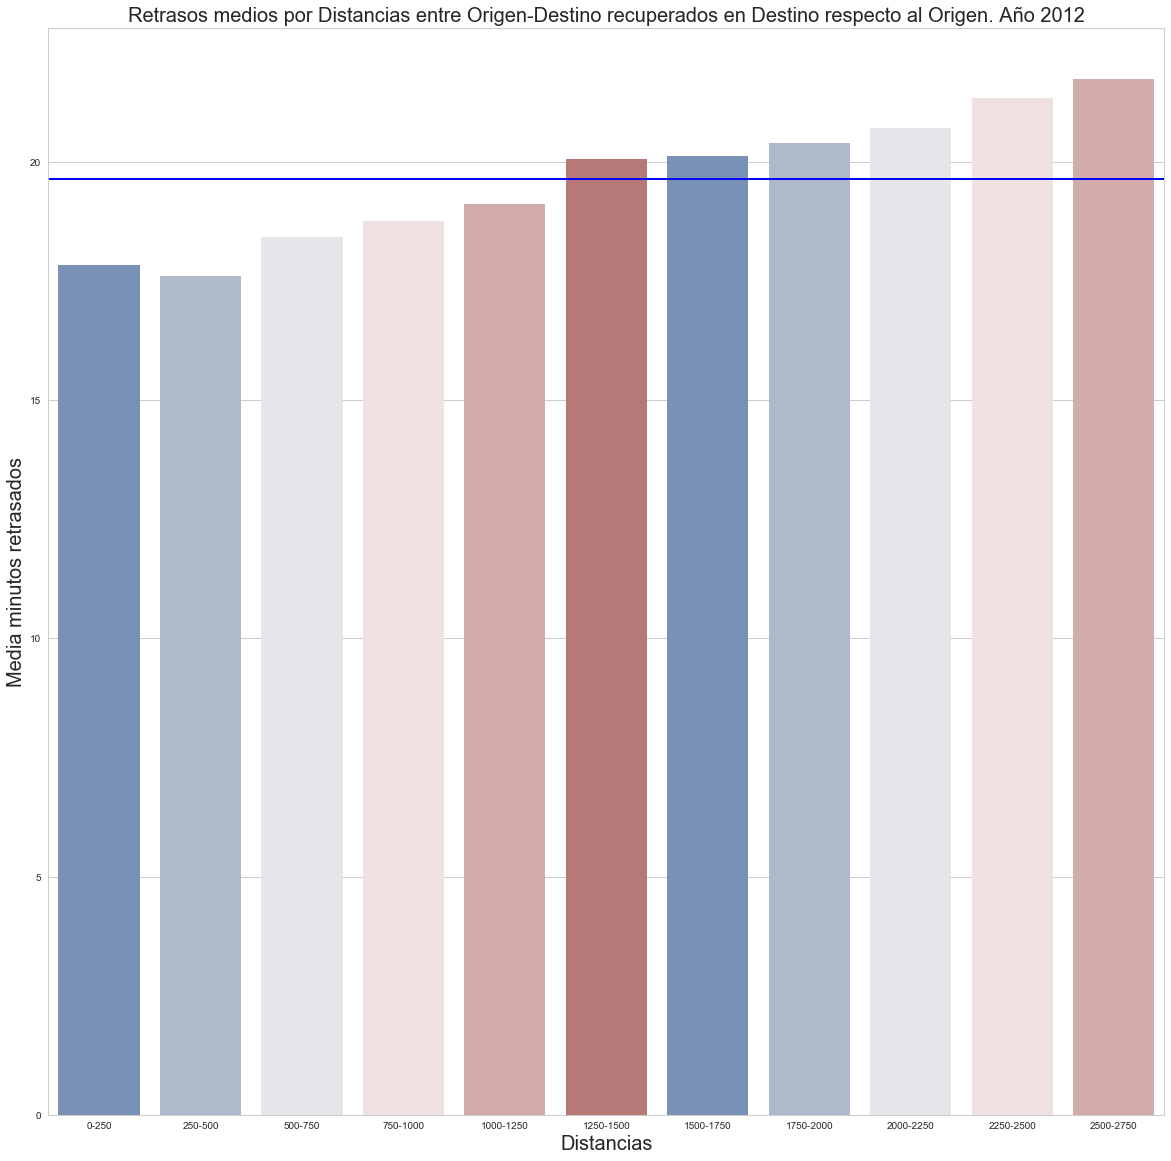

In [130]:
#Retrasos medios por Distancias entre Origen-Destino recuperados en Destino respecto al Origen

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosRecuperadosPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino recuperados en Destino respecto al Origen. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.6 Conclusiones: 

Vuelos que recuperan el tiempo de retraso que acumulaban en Origen
1. Para que en Destino se recupere el tiempo de retraso de Origen, la media de minutos en Origen debe estar entre 17,5 y 21 minutos.
2. Para la recupearción del retraso, cuanto mayor sea la distancia a Destino más tiempo se recupera, es bastante lineal.
3. Los aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, recuperan el retraso son principalmente de la Costa Este y el Medio Este.
4. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste. 

Vuelos que se retrasan más, al llegar a Destino, respecto al retraso de Origen
1. Más de 50 minutos de retraso en Origen, supone con gran probabilidad que en Destino se aumente aún más el retraso.
2. En el caso de aumento de retraso, no parece influir demasiado la distancia sobre el aumento del mismo, sólo destaca un poco en el caso de los vuelos de entre 2.500 y 2.750 millas.
3. Los aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, aumentan el retraso son principalmente de la Costa Este y el Medio Este.
4. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste.


Vuelos que consiguen Mantener el retraso en Destino
1. Aquellos vuelos que salen entre 40 y 65 minutos tarde en Origen, pueden conseguir no retrasarse más a la llegada a Destino. 
2. 9 de los 10 aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, el vuelo, mantener el retraso, sin aumentarlo, son de la costa Este y Medio Este.
3. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste.
4. La distancia tampoco parece clave en el mantenimiento del retraso de Origen a la llegada, en el caso de los vuelos más largos (2.500 y 2.750 millas) sí parece ayudar conseguir mantenerse en el caso de los retrasos más altos.

Aerolíneas

1. Express Airlines parece que es la que destaca con los retrasos en las 3 situaciones.
2. Otra de las destacadas que suele estar entre las primeras es United Airlines y JetBlue
3. Por el contrario, parece que Southwest y Frontier son las aerolíneas con menor retraso en los aeropuertos principales.
4. Compañías relevantes como American Airlnes y Delta, están en los 3 casos en la media de retrasos, siendo Delta mejor.


Parece que es relevante en la media de minutos retrasados que la zona geográfica sea la de la Costa Este y el Medio Este de Estados Unidos, y viceversa. 
Sin embargo una cosa son los minutos retrasados, y otra el número de vuelos retrasados, en la que la ubicación geográfica no es tan evidente, sino que parece que es la densidad del tráfico nacional.
Parece que con hasta un máximo de 30 minutos de retraso, se puede recuperar el tiempo en Destino.





### 1.3.4 Visualización de retrasos medios en Origen por Rutas

In [131]:
retrasosSalidaIgualLlegada.shape

(576498, 50)

In [132]:
retrasosSalidaIgualLlegadaPorRuta = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorRuta = retrasosSalidaIgualLlegadaPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [133]:
#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosSalidaIgualLlegadaPorRuta = retrasosSalidaIgualLlegadaPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)


In [134]:
retrasosSalidaIgualLlegadaPorRuta.head(15)

VuelosTotales  MediaRetrasoTotal
Route                                    
SAN-CLE              3         249.000000
JFK-HNL              9         231.888889
DTW-ROC              2         216.000000
DTW-SWF              1         200.000000
MSP-SJU              1         182.000000
CLE-SAN              4         180.500000
CLE-PIT              3         179.666667
LAS-HNL             87         174.701149
DCA-GRR              4         171.750000
DEN-OGG             15         155.733333
LAS-OGG             11         151.181818
SMF-HNL             22         143.863636
MCI-MEM             14         142.500000
PHL-SMF              3         137.666667
MSY-VPS              1         134.000000

In [135]:
#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosSalidaRutaConPesos = retrasosSalidaIgualLlegadaPorRuta

retrasosSalidaRutaConPesos['Peso'] = retrasosSalidaRutaConPesos['VuelosTotales'] * retrasosSalidaRutaConPesos['MediaRetrasoTotal']

retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosSalidaRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal      Peso
Route                                              
LAX-SFO           2845          59.231986  168515.0
SFO-LAX           2515          62.759443  157840.0
ORD-SFO           1768          59.213235  104689.0
SFO-ORD           1608          59.992537   96468.0
SAN-SFO           1466          65.317872   95756.0
LAS-SFO           1423          67.160225   95569.0
JFK-SFO           1177          79.555650   93637.0
SFO-LAS           1457          61.879890   90159.0
ORD-LAX           1492          59.922252   89404.0
ORD-LGA           1529          57.471550   87874.0
SFO-SAN           1322          66.446293   87842.0
DEN-SFO           1480          55.159459   81636.0
ORD-EWR           1395          58.114695   81070.0
SFO-SEA           1150          66.189565   76118.0
LGA-ORD           1055          70.334597   74203.0

Ya parece que salen las más relevantes, vamos a quedarnos con las 20 primeras

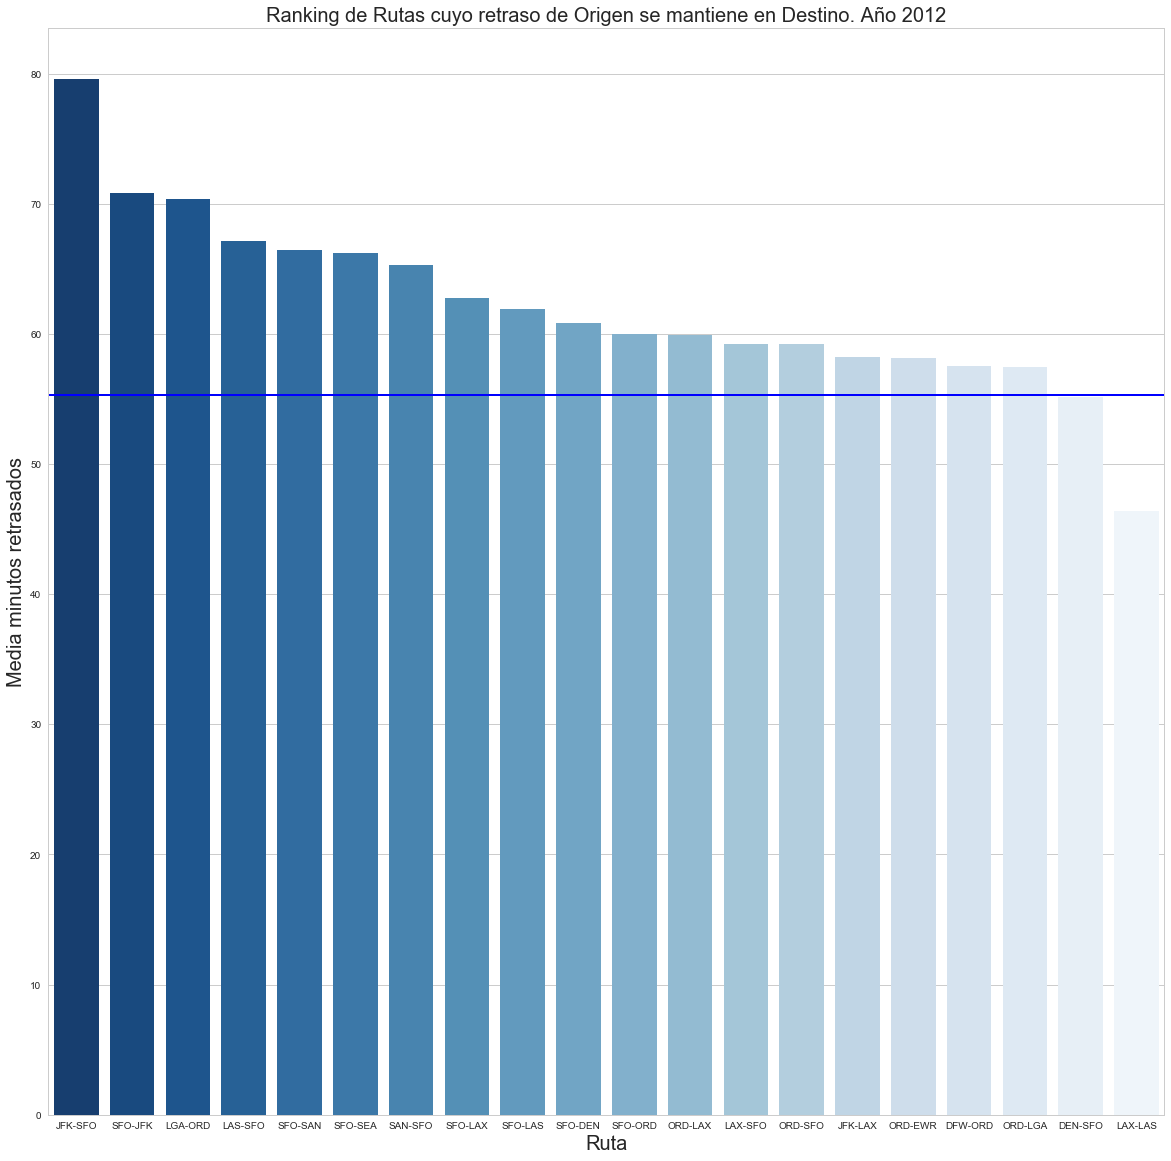

In [136]:
retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.head(20)

retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen se mantiene en Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaRutaConPesos))
ax = sns.barplot(x=retrasosSalidaRutaConPesos.index, y=retrasosSalidaRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen se mantiene en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorRuta['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

La mayoría son rutas que salen de Atlanta (ATL) y de Newark (EWR) o de Chicago (ORD), son de la Costa Este, también de la costa Oeste son relavantes SFO (San Francisco) y LAX (Los Ángeles), pero predominan rutas que salen y llegan en la Costa Este.

Miremos ahora los otros dos casos, con mayor retraso en Destino, y con Recuperación del tiempo

In [137]:
retrasosPosterioresSalidaPorRuta = pd.DataFrame(retrasosPosterioresSalida.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorRuta = retrasosPosterioresSalidaPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


In [138]:
#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosPosterioresSalidaPorRuta = retrasosPosterioresSalidaPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)

#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRuta

retrasosPosterioresSalidaPorRutaConPesos['Peso'] = retrasosPosterioresSalidaPorRutaConPesos['VuelosTotales'] * retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal']

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosPosterioresSalidaPorRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal      Peso
Route                                              
LAX-SFO           2146          72.422181  155418.0
SFO-LAX           1501          60.846769   91331.0
LAS-SFO            867          81.477509   70641.0
SEA-SFO            719          76.826147   55238.0
SAN-SFO            634          81.673502   51781.0
DFW-SFO            778          65.991003   51341.0
ORD-SFO            755          67.993377   51335.0
ORD-LGA            678          64.017699   43404.0
JFK-SFO            532          81.163534   43179.0
DEN-SFO            643          62.830482   40400.0
LGA-ATL            591          65.910321   38953.0
ORD-DCA            606          63.636964   38564.0
ATL-LGA            664          55.939759   37144.0
LAX-LAS            711          51.988748   36964.0
ORD-EWR            590          60.413559   35644.0

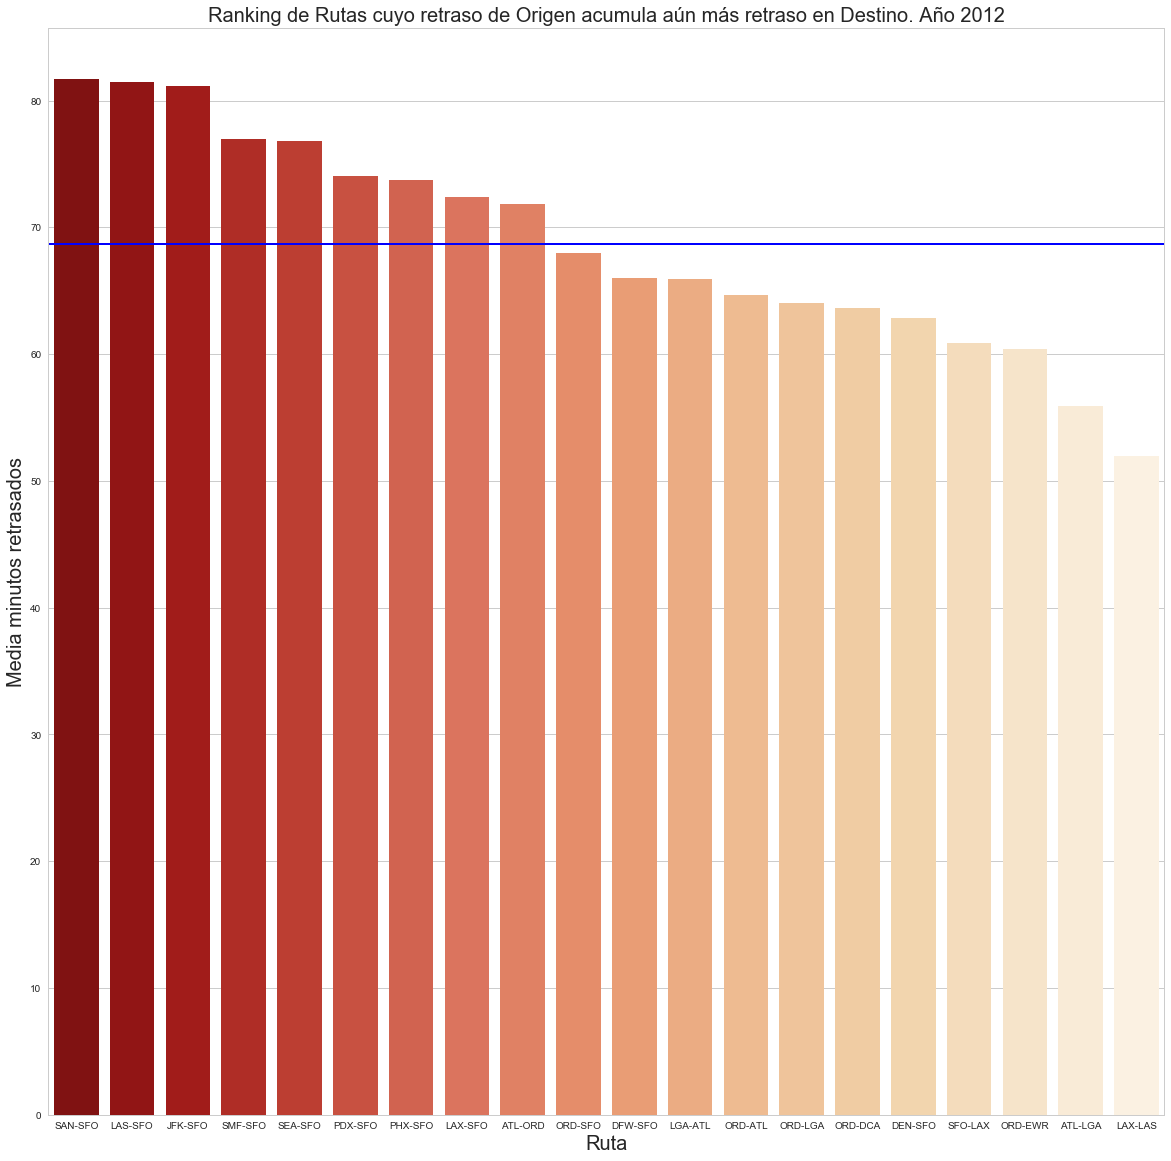

In [139]:
retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.head(20)

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen aumenta Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorRutaConPesos))
ax = sns.barplot(x=retrasosPosterioresSalidaPorRutaConPesos.index, y=retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen acumula aún más retraso en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

En este caso aumenta claramente la prevalencia de aeropuertos de la parte Este de Estados Unidos, es más, los vuelos parecen que casi todos son entre aeropuertos de esta parte de USA, especialemente a Atlanta, el de mayor tráfico de USA, por lo que se apuntan dos cosas vistas en los gráficos anteriores, con menor distancia no da tiempo a recuperar el retraso y que la mayoría de los aeropuertos con esta circunstancia son de la parte Este de USA, con una media de retraso por encima de los 60 minutos.

Veamos, por último, los vuelos que recuperan el tiempo.

In [140]:
retrasosRecuperanPorRuta = pd.DataFrame(retrasosRecuperados.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosRecuperanPorRuta = retrasosRecuperanPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosRecuperanPorRuta = retrasosRecuperanPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)

#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRuta

retrasosRecuperanPorRutaConPesos['Peso'] = retrasosRecuperanPorRutaConPesos['VuelosTotales'] * retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal']

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosRecuperanPorRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal    Peso
Route                                            
JFK-LAX            318          22.418239  7129.0
ORD-SFO            266          21.578947  5740.0
JFK-SFO            240          23.441667  5626.0
ORD-LAX            223          20.331839  4534.0
EWR-SFO            184          24.005435  4417.0
IAD-LAX            161          22.037267  3548.0
EWR-IAH            156          22.192308  3462.0
BOS-SFO            153          21.718954  3323.0
IAD-SFO            139          22.244604  3092.0
IAH-ORD            161          19.124224  3079.0
EWR-ORD            148          20.581081  3046.0
SFO-ORD            145          20.793103  3015.0
IAD-DEN            141          21.354610  3011.0
BOS-LAX            132          22.689394  2995.0
ORD-IAH            150          19.713333  2957.0

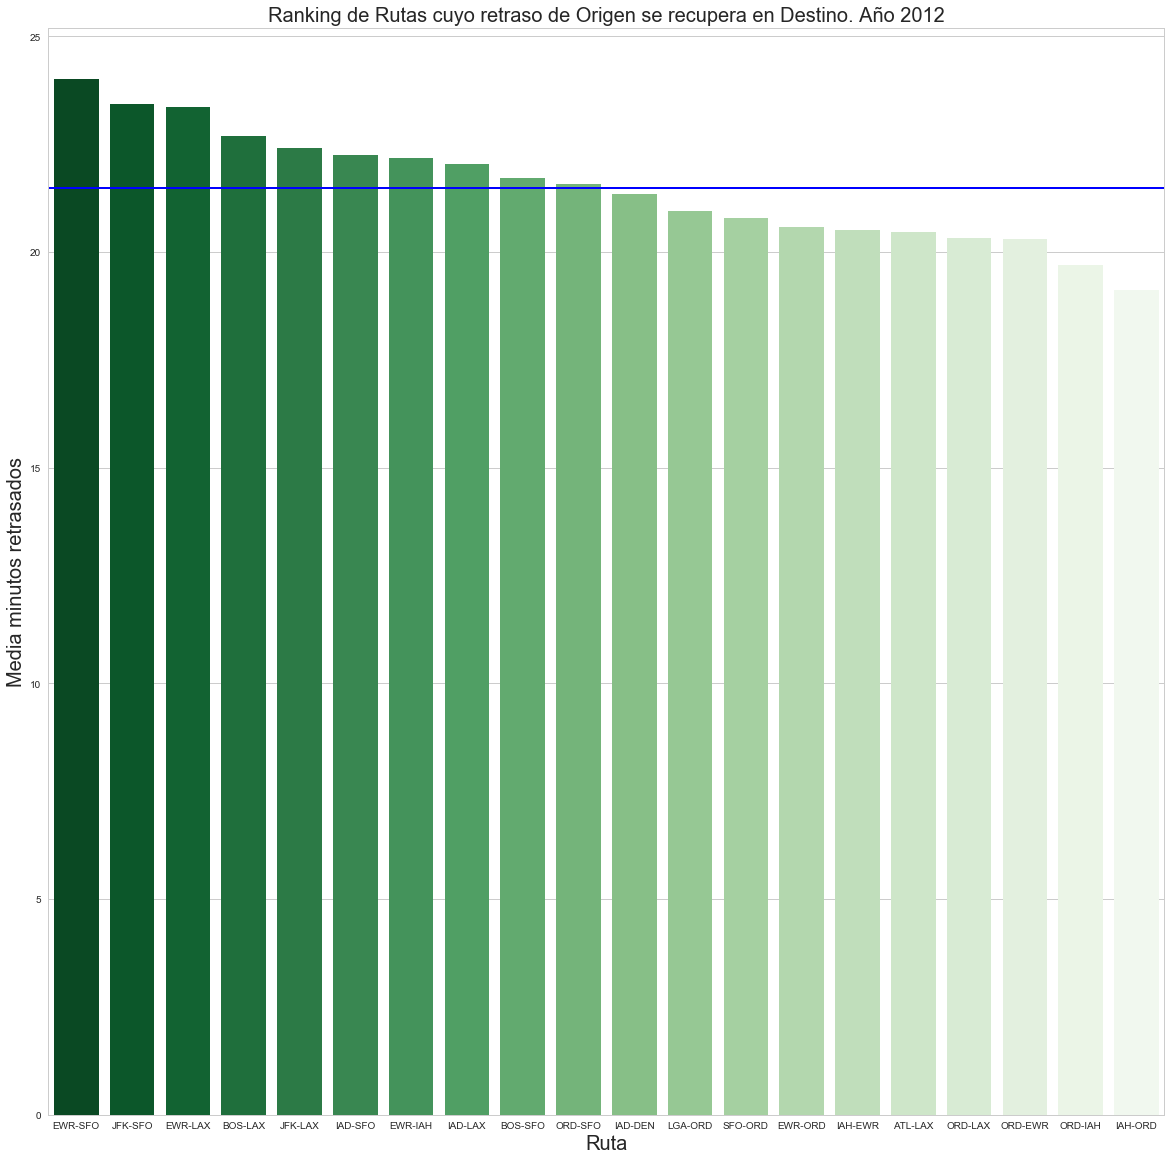

In [141]:
retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.head(20)

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen se recupera en Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperanPorRutaConPesos))
ax = sns.barplot(x=retrasosRecuperanPorRutaConPesos.index, y=retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen se recupera en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

Una vez más, prevalecen los aeropuertos de la Costa Este, pero en este caso, las distancias de la ruta son mayores, casi todos vuelan al Oeste. Y claramente, como se vio en los apartados anteriores por aeropuertos, el menor número de minutos de retrasos es recuperable, y más aún si la distancia es grande, como es el caso. La media de tiempo de retraso de estas rutas prácticamente coincide con la del caso de los aeropuertos.

### 1.3.4.1 Conclusiones:

Parece que mirando los retrasos en Origen por Rutas, se confirman los datos que se vieron en el apartado anterior por Aeropuertos.

Parece claramente que en un modelo de predicción, el peso de la Costa Este de USA, en cuanto a los retrasos, es mayor que en la Costa Oeste.

Deberíamos etiquetar a los aeropuertos por la zona geográfica en la que están y que los modelos se orienten a cada una de las zonas geográficas

## 1.3.5 Análisis de Retrasos en Destino

#### Ahora veamos cómo es el comportamiento de los retrasos en llegadas

#### Vuelos que se han retrasado al menos 15 minutos en la llegada 

In [142]:
#Vuelos que se han retrasado al menos 15 minutos en la llegada
len(dfanual[dfanual['ArrDel15'] == 1])

1012966

In [143]:
#retrasos por mes en llegadas

vuelosTotalesRetrasadosDestinoPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosTotalesRetrasadosDestinoPorMes = vuelosTotalesRetrasadosDestinoPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['ArrDel15'] == 1)])}, ignore_index=True)


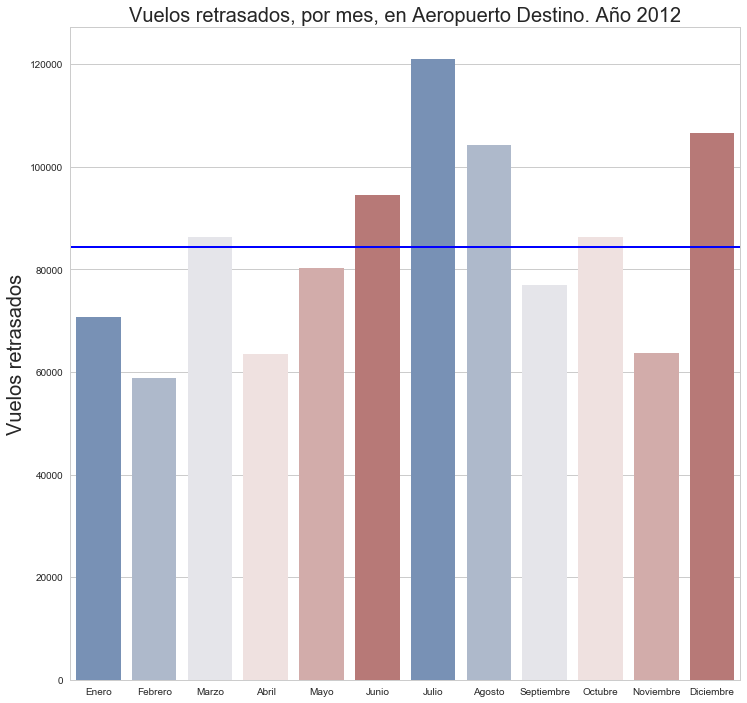

In [144]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosTotalesRetrasadosDestinoPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados, por mes, en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(vuelosTotalesRetrasadosDestinoPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

De las múltiples combinaciones de los retrasos, motivos, si en origen , si en destino, si en ambos, etc. Vamos a ver primero cuántos hay retrasados, ya vimos en el apartado correspondiente de retrasos en origen, cuántos mantenían su retraso en la llegada, se recuperaban o aumentaban más el retraso de origen. Vamos a ver, nuevos casos: 
1. Retrasos que sólo ocurren en Destino, es decir, en Origen no tenían retraso.
2. Volveremos a ver los retrasados en Destino, y que en origen también estaban retrasados.
3. Iremos viéndolos también, por aeropuertos más retrasados, con más vuelos, por zonas geográficas, tipos de retraso, aerolíneas, etc.

### 1.3.5.1 Vuelos retrasados sólo en Destino

In [145]:
#vuelos retrasados en Destino pero que salieron en hora en Origen
len(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

229847

In [146]:
vuelosRestrasadosSoloEnDestino = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosRestrasadosSoloEnDestino = vuelosRestrasadosSoloEnDestino.append({'mes': df["Month"][1], 'vuelos': len(df[(df['ArrDel15'] == 1) & (df['DepDel15'] == 0)])}, ignore_index=True)


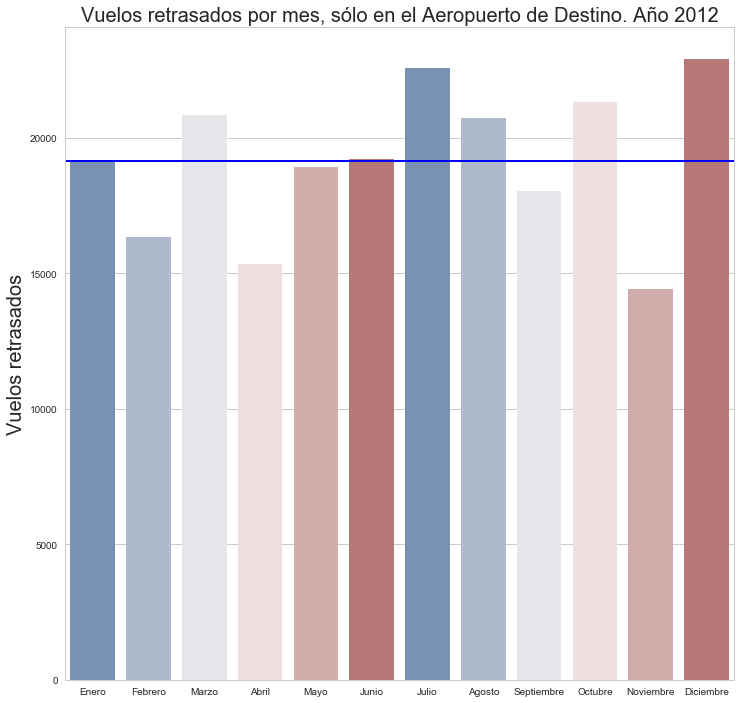

In [147]:
#Vuelos retrasados por mes sólo en destino, es decir, en origen salieron puntuales

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosRestrasadosSoloEnDestino['vuelos'], palette=pal)

ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, sólo en el Aeropuerto de Destino. Año ' + year, fontsize=20)

plt.axhline(vuelosRestrasadosSoloEnDestino['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

In [148]:
retrasosSoloDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [149]:
retrasosSoloDestino = pd.DataFrame(retrasosSoloDestino['ArrDelay'])

retrasosSoloDestino.head(5)

ArrDelay
6        19.0
7        28.0
65       27.0
135      32.0
138      16.0

In [150]:
retrasosSoloDestino.describe().T

count       mean        std   min   25%   50%   75%    max
ArrDelay  229847.0  25.392622  13.645952  15.0  17.0  21.0  28.0  281.0

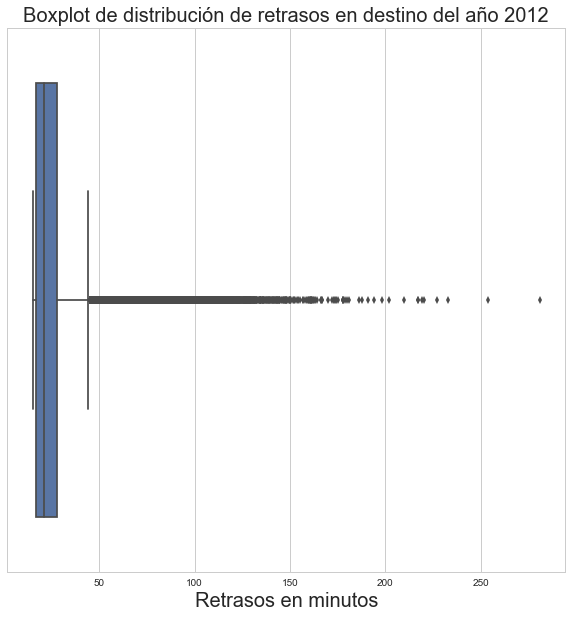

In [151]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasosSoloDestino["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino del año ' + year, fontsize=20)
plt.show()

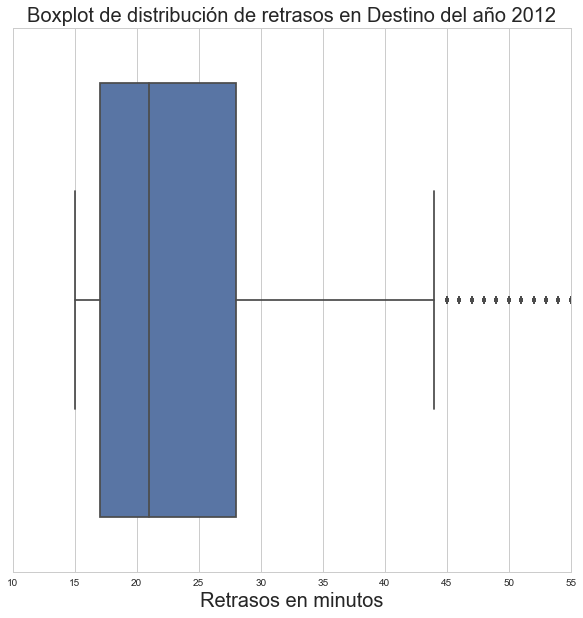

In [152]:
#vamos a reducir la escala para al menos ver la parte principal

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(10,55)
ax = sns.boxplot(x=retrasosSoloDestino["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en Destino del año ' + year, fontsize=20)
plt.show()

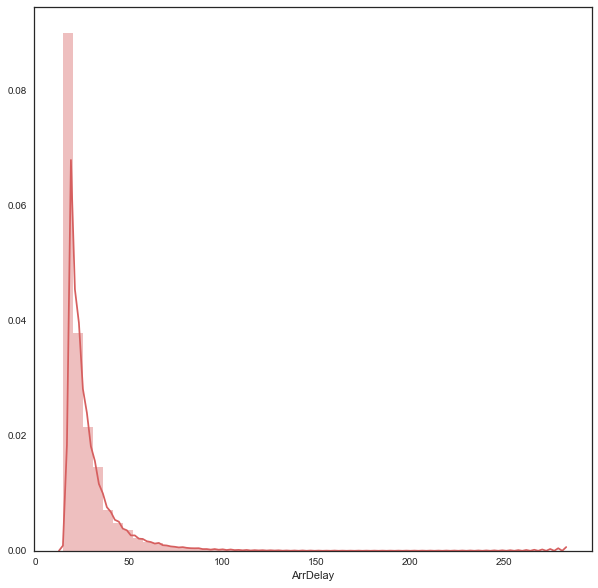

In [153]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")

plt.show()

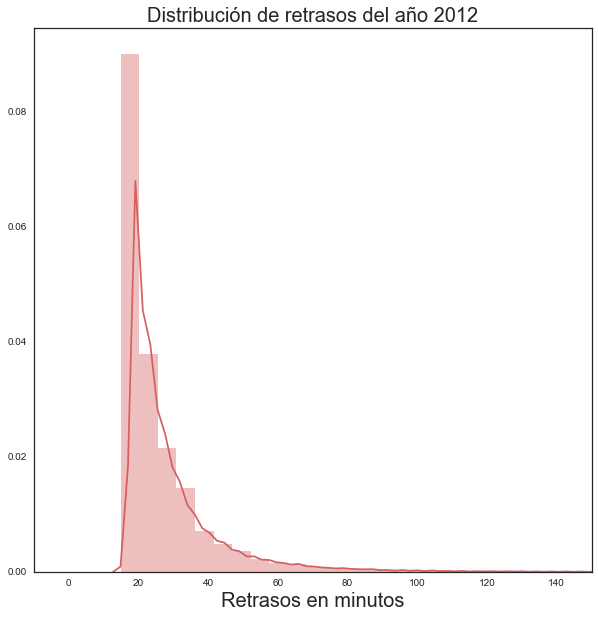

In [154]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")
plt.xlim(-10,150)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

Quizás deberíamos cortar sobre los 100 minutos de retraso

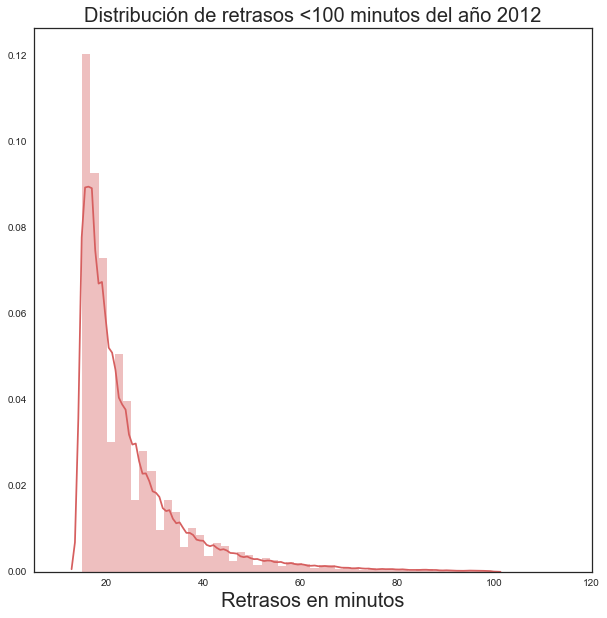

In [155]:
corte100Min = pd.DataFrame(retrasosSoloDestino[retrasosSoloDestino["ArrDelay"]<100])

# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(corte100Min["ArrDelay"], color="r")
plt.xlim(5,120)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos <100 minutos del año ' + year, fontsize=20)


plt.show()

In [156]:
retrasosDestinoPorDiaSemana = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

retrasosDestinoPorDiaSemana = pd.DataFrame(retrasosDestinoPorDiaSemana.groupby('DayOfWeek').aggregate({'DayOfWeek': 'count', 'ArrDelay':'mean'}))

In [157]:
retrasosDestinoPorDiaSemana

DayOfWeek   ArrDelay
DayOfWeek                      
1              35346  25.080858
2              31807  25.731914
3              31590  25.598892
4              36625  25.426430
5              37441  25.535536
6              25245  25.369182
7              31793  25.006196

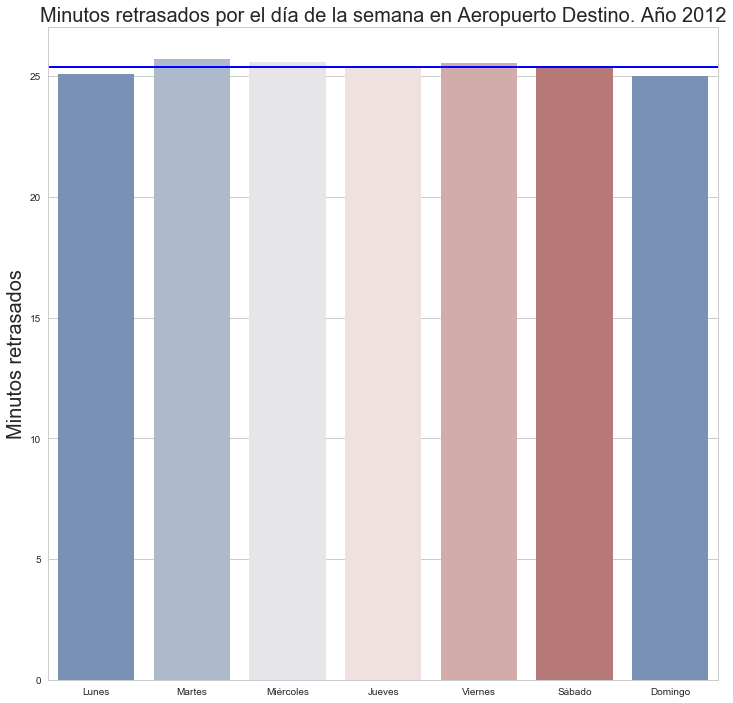

In [158]:

#Vuelos retrasados por el día de la semana

my_xticks=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorDiaSemana['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por el día de la semana en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaSemana['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [159]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [160]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(retrasosDestinoPorHoraDelDia.groupby('ArrTimeBlk').aggregate({'ArrTimeBlk': 'count', 'ArrDelay':'mean'}))

In [161]:
retrasosDestinoPorHoraDelDia

ArrTimeBlk   ArrDelay
ArrTimeBlk                       
0001-0559         4544  23.818222
0600-0659         2549  24.208709
0700-0759         6196  24.872014
0800-0859         9429  25.323894
0900-0959        11900  24.806555
1000-1059        13167  24.566872
1100-1159        12783  24.466479
1200-1259        12663  24.766801
1300-1359        13051  24.433224
1400-1459        13958  24.572718
1500-1559        13374  25.194557
1600-1659        17455  26.102893
1700-1759        15282  26.234263
1800-1859        17504  26.324269
1900-1959        15908  26.318833
2000-2059        16719  26.550093
2100-2159        14577  26.019757
2200-2259        10416  25.198829
2300-2359         8372  24.854396

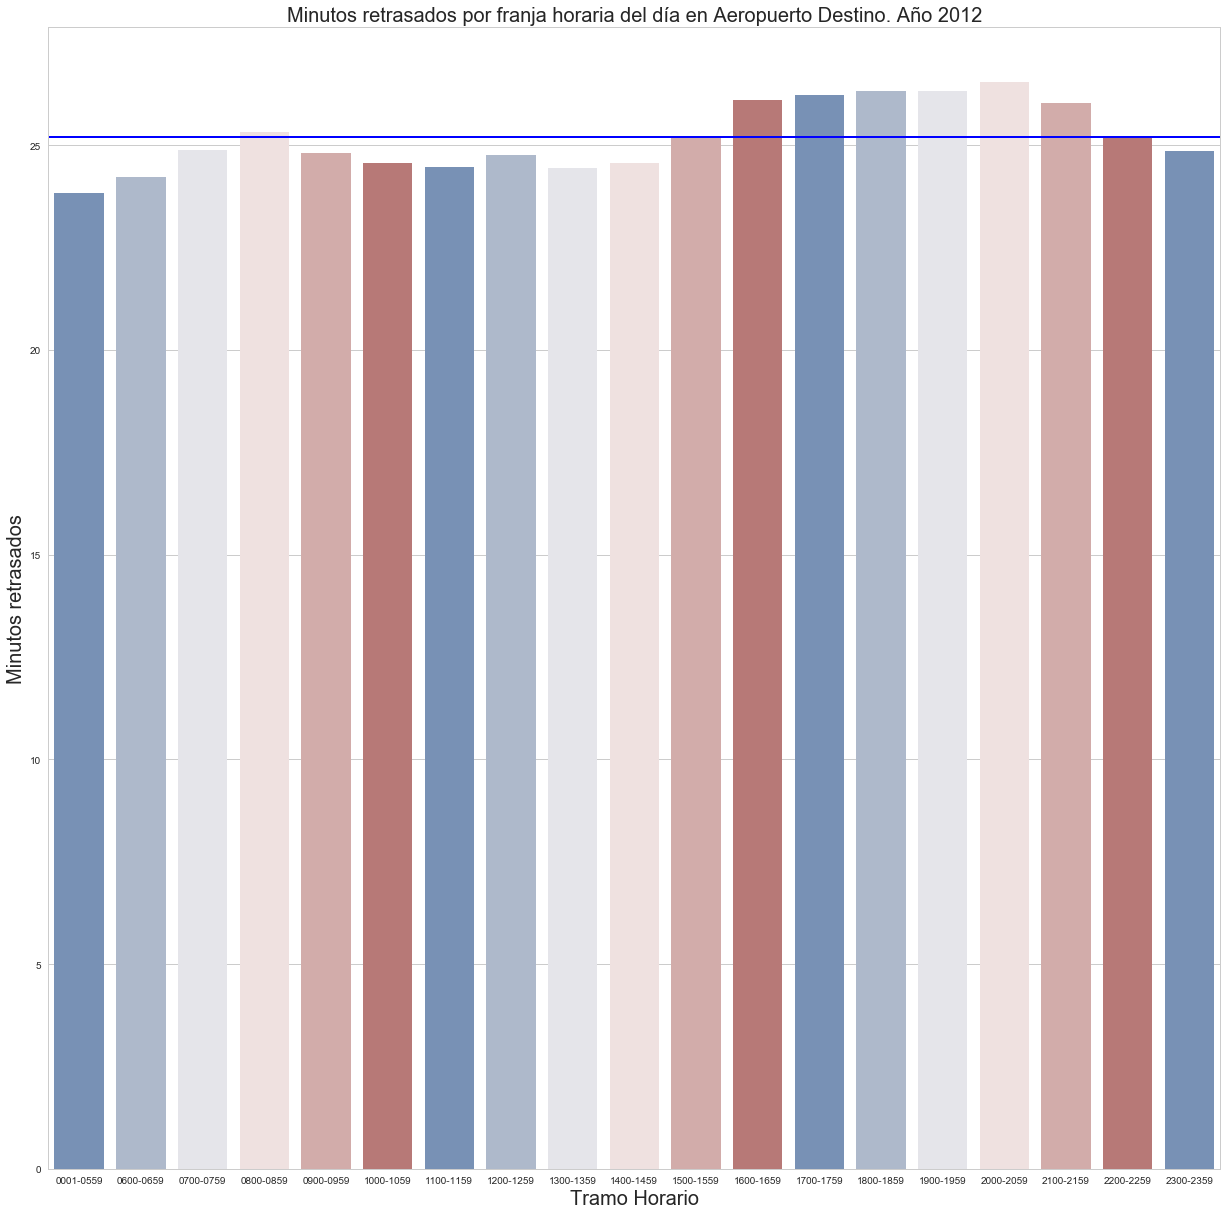

In [162]:

#Vuelos retrasados por franja horaria

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorHoraDelDia.index, y=retrasosDestinoPorHoraDelDia['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Tramo Horario", fontsize=20)
ax.set_title('Minutos retrasados por franja horaria del día en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorHoraDelDia['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [163]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [164]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(retrasosDestinoPorDiaDelMes.groupby('DayofMonth').aggregate({'DayofMonth': 'count', 'ArrDelay':'mean'}))

In [165]:
retrasosDestinoPorDiaDelMes

DayofMonth   ArrDelay
DayofMonth                       
1                 7674  25.375293
2                 7315  24.279426
3                 7901  26.941400
4                 7338  24.963887
5                 6856  25.242415
6                 6242  25.013297
7                 7063  25.518477
8                 7593  25.479521
9                 8027  26.236327
10                7347  25.471757
11                7193  24.396914
12                7429  25.003769
13                7593  25.879231
14                7088  25.016789
15                7921  26.094433
16                7939  24.135282
17                7714  24.889422
18                8230  26.224423
19                7620  25.310892
20                9033  25.700100
21                8139  25.666544
22                8179  25.540042
23                7635  24.979961
24                7975  26.095172
25                7332  25.794463
26                8532  25.841772
27                7258  25.258473
28                6607  24.205540
29                7068  25.448217
30                5804  24.812198
31                4202  25.661828

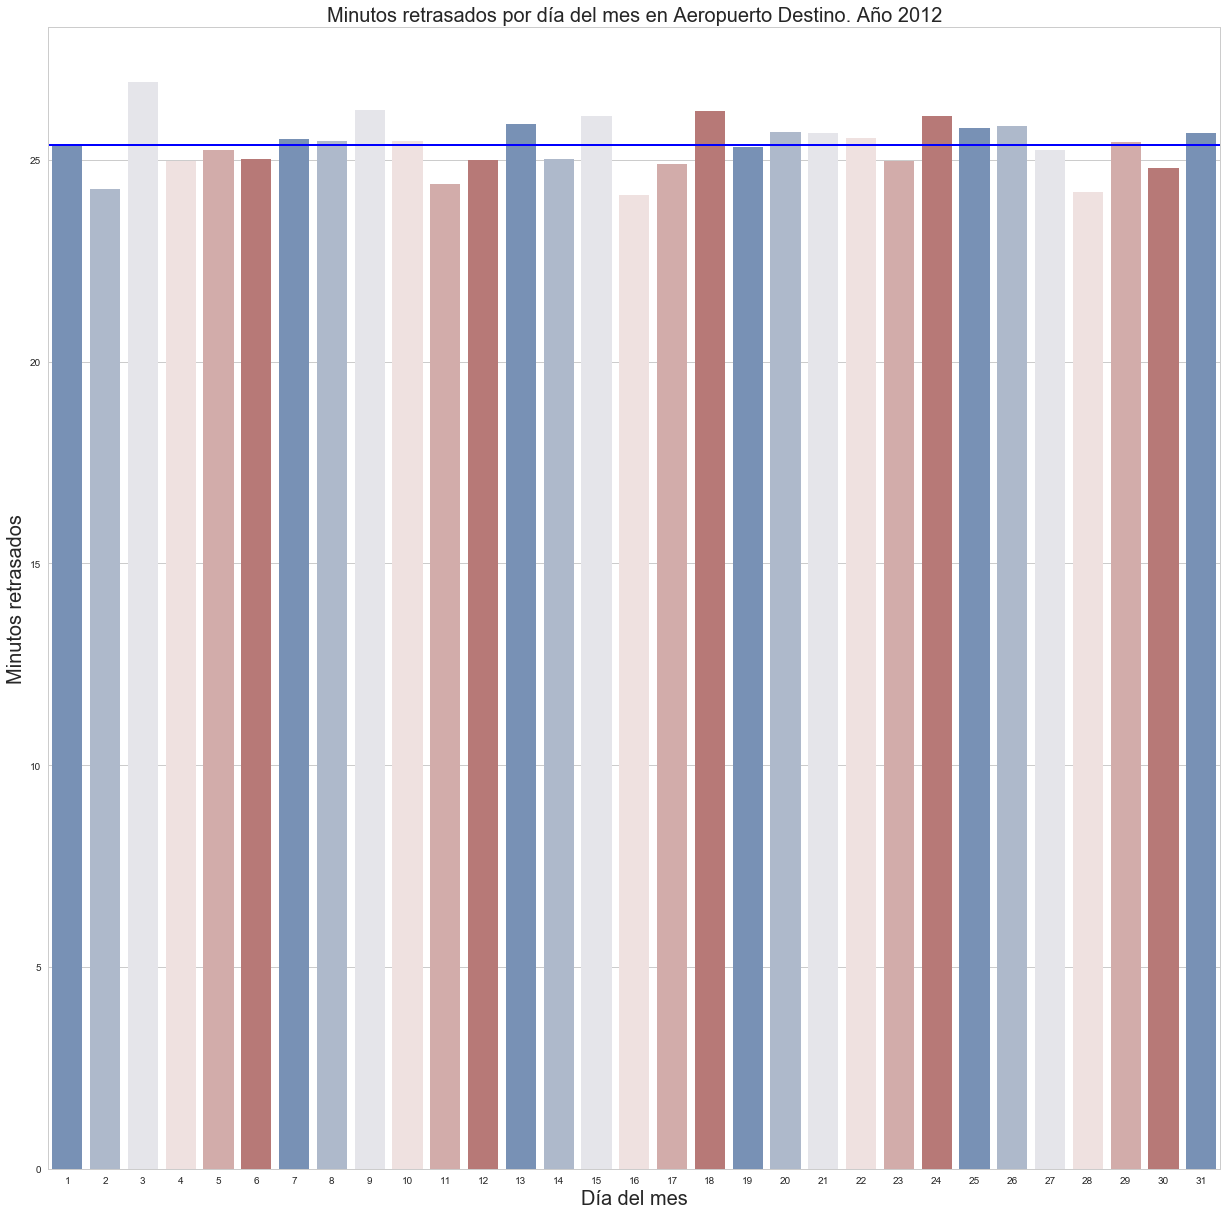

In [166]:

#Vuelos retrasados por dia del mes 

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorDiaDelMes.index, y=retrasosDestinoPorDiaDelMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Día del mes", fontsize=20)
ax.set_title('Minutos retrasados por día del mes en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show() 

In [167]:
retrasosDestinoPorTrimestre = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [168]:
retrasosDestinoPorTrimestre = pd.DataFrame(retrasosDestinoPorTrimestre.groupby('Quarter').aggregate({'Quarter': 'count', 'ArrDelay':'mean'}))

In [169]:
retrasosDestinoPorTrimestre

Quarter   ArrDelay
Quarter                    
1          56360  24.915259
2          53505  25.422316
3          61305  26.820961
4          58677  24.331748

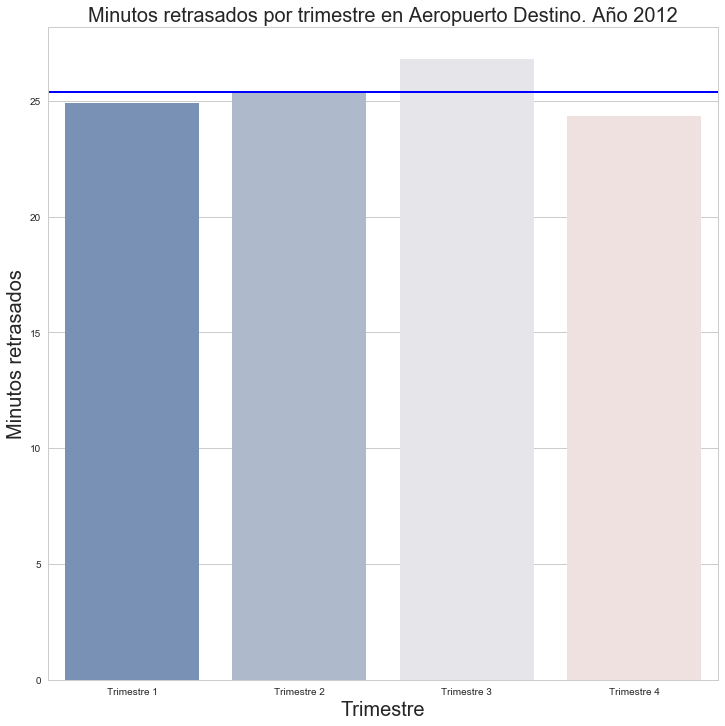

In [170]:
#Vuelos retrasados por trimestre 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.5.1.1 Ranking de aeropuertos en Retrasos sólo en Destino

In [171]:
dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)].Dest.value_counts(sort=True).head(15)

ATL    17124
ORD    12451
LAX    11161
DFW    10405
DEN     8713
SFO     8679
IAH     8404
PHX     6442
CLT     6195
EWR     6147
MCO     5635
LGA     5110
JFK     4793
LAS     4547
BOS     4288
Name: Dest, dtype: int64

In [172]:
#primero cogemos los 45 aeropuertos (de destino) con mayor número de retrasos
retrasosSoloDestinoEnAeropuertos = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)].Dest.value_counts(sort=True)).head(45)

In [173]:
#retrasos totales de esos 45 aeropuerto
retrasosSoloDestinoEnAeropuertos.sum()

Dest    188370
dtype: int64

In [174]:
#el 80% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80AeropuertosDestino = ((retrasosSoloDestinoEnAeropuertos.sum() / (len(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])))) *100

In [175]:
pct80AeropuertosDestino

Dest    81.954518
dtype: float64

In [176]:
print('45 aeropuertos concentran el %.2f' %pct80AeropuertosDestino + '% de los retrasos (solo en destino) del año ' + year)

45 aeropuertos concentran el 81.95% de los retrasos (solo en destino) del año 2012


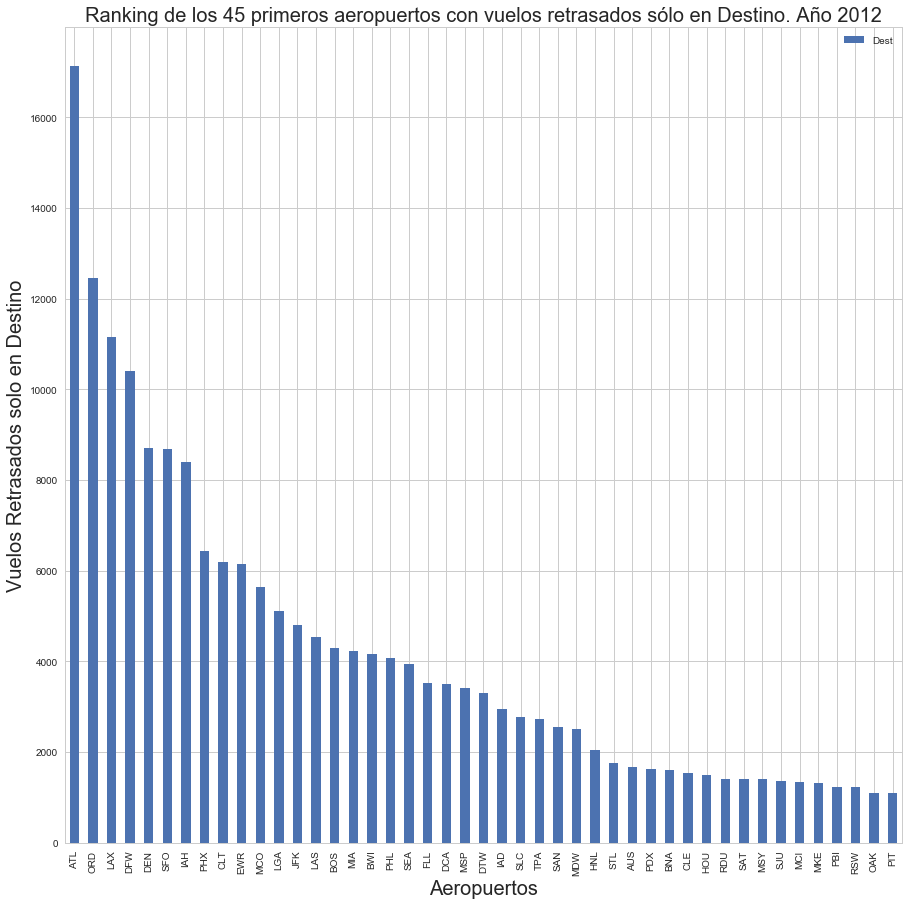

In [177]:
ax = retrasosSoloDestinoEnAeropuertos.plot(kind='bar', figsize=(15,15))

ax.set_ylabel("Vuelos Retrasados solo en Destino", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)

plt.show()

De estos, ATL (Atlanta), ORD (Chicago) y DEN(Denver) repiten 2 como los 3 primeros, al igual que en Origen, pero se añaden IAH(Houston) y DFW (Dallas) como significativos, entre los 5 concentran más del 35% de los retrasos.
Sigue siendo un factor clave, ser aeropuerto Hub, distribuidor de tráfico de interconexión con otros destinos, como elemento de demoras en la red.

In [178]:
retrasosSoloDestinoEnAeropuertos = retrasosSoloDestinoEnAeropuertos.reset_index()
retrasosSoloDestinoEnAeropuertos.columns = ['Destination','ArrDelay']

In [179]:
retrasosSoloDestinoEnAeropuertos.head(45)

Destination  ArrDelay
0          ATL     17124
1          ORD     12451
2          LAX     11161
3          DFW     10405
4          DEN      8713
5          SFO      8679
6          IAH      8404
7          PHX      6442
8          CLT      6195
9          EWR      6147
10         MCO      5635
11         LGA      5110
12         JFK      4793
13         LAS      4547
14         BOS      4288
15         MIA      4234
16         BWI      4170
17         PHL      4077
18         SEA      3946
19         FLL      3514
20         DCA      3493
21         MSP      3407
22         DTW      3301
23         IAD      2952
24         SLC      2776
25         TPA      2734
26         SAN      2544
27         MDW      2504
28         HNL      2039
29         STL      1750
30         AUS      1665
31         PDX      1622
32         BNA      1598
33         CLE      1530
34         HOU      1495
35         RDU      1417
36         SAT      1413
37         MSY      1407
38         SJU      1354
39         MCI      1347
40         MKE      1311
41         PBI      1240
42         RSW      1235
43         OAK      1102
44         PIT      1099

In [180]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosSoloDestinoEnAeropuertos["Destination"].values.tolist()

In [181]:
#nos quedamos con los datos de esos aeropuertos
retrasosSoloDestinoEnAeropuertos = dfanual.loc[(dfanual["Dest"].isin(aeropuertos))]

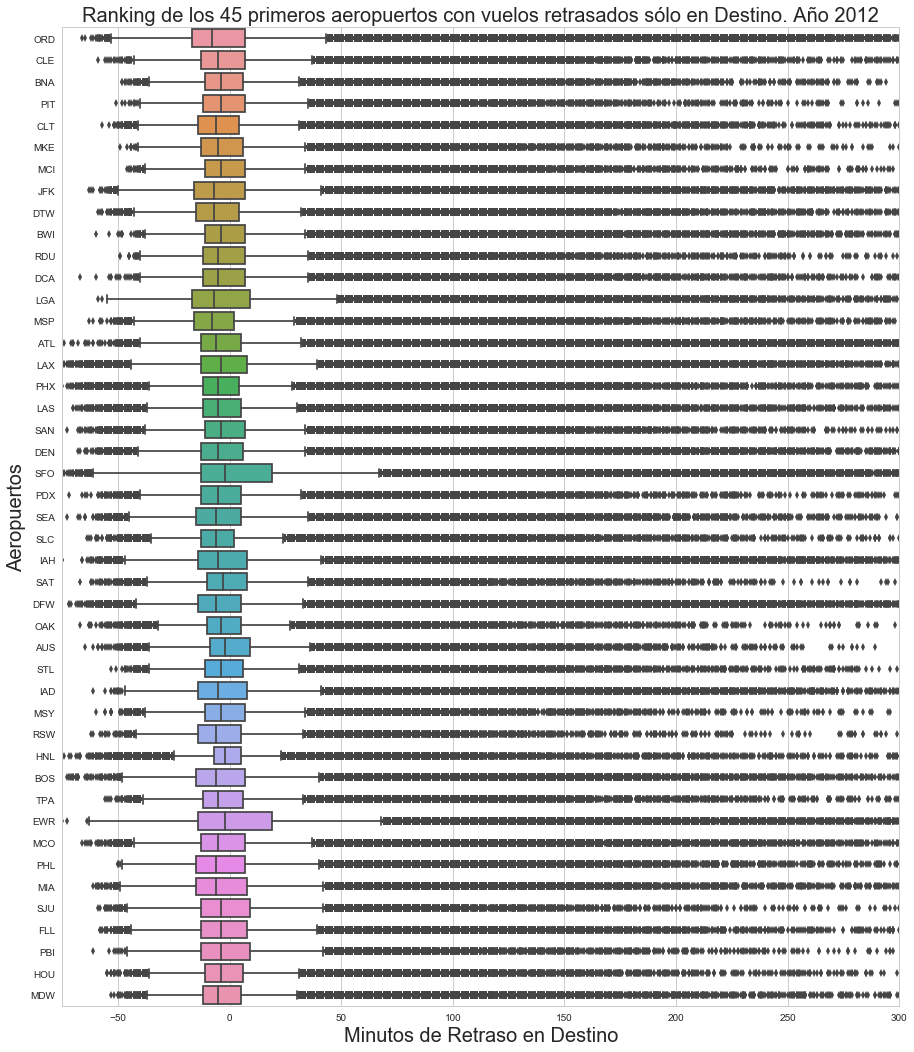

In [182]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-75,300)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)

plt.show()

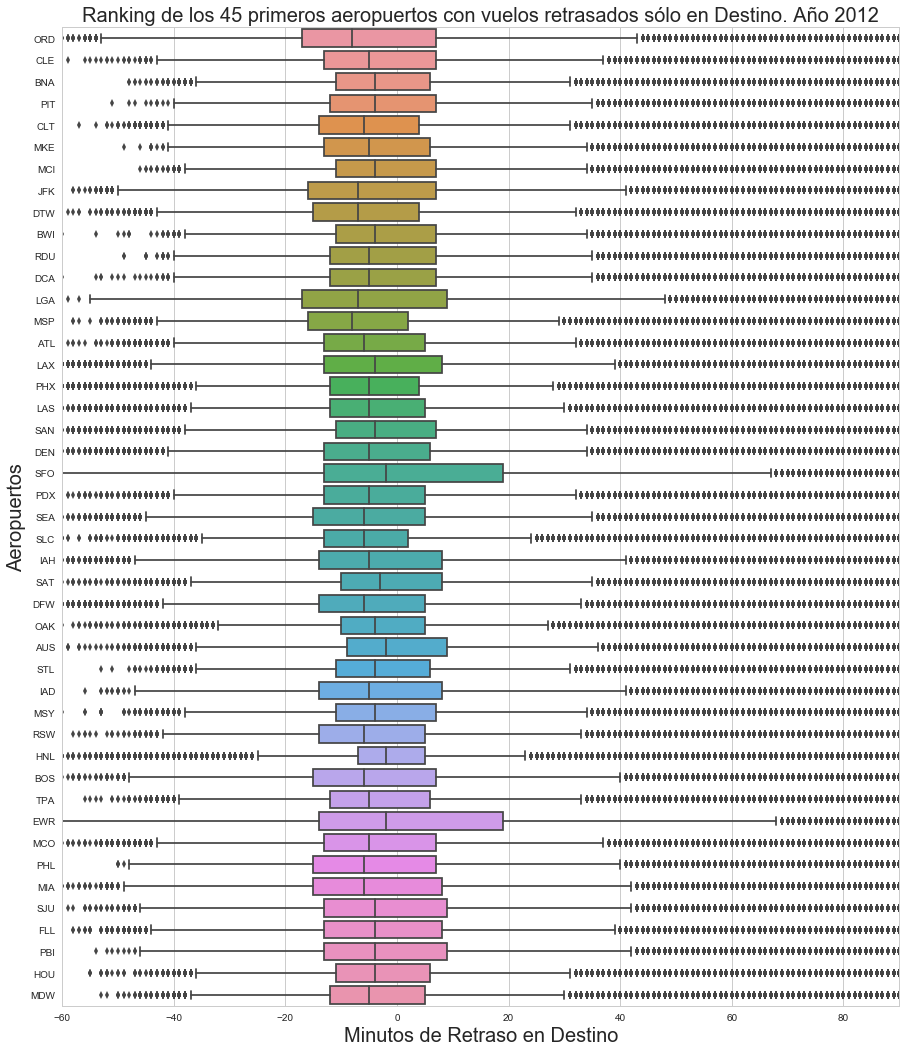

In [183]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-60,90)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)


plt.show()

Podemos apreciar que hay una gran cantidad de vuelos con adelanto, es decir, que tendremos que si queremos quedarnos solo con retrasos de verdad y sacar sus estadísticos debemos eliminar las muestras con adelanto.

In [184]:
retrasosSoloDestinoEnAeropuertosSinAdelantos = pd.DataFrame(retrasosSoloDestinoEnAeropuertos[(retrasosSoloDestinoEnAeropuertos['ArrDelay'] > 15)])



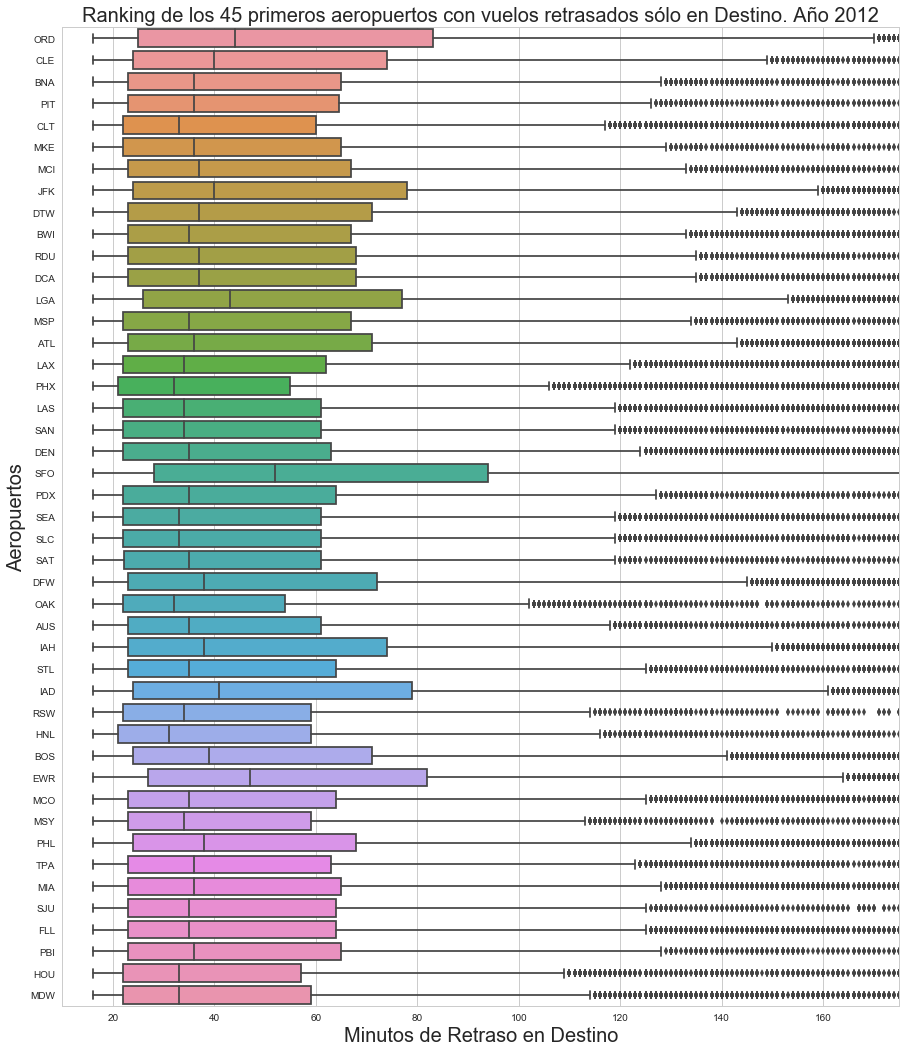

In [185]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(10,175)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertosSinAdelantos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertosSinAdelantos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)


plt.show()

In [186]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en sólo destino 
vuelosTotalesPorAeropuerto = retrasosSoloDestinoEnAeropuertos.groupby('Dest').aggregate({'Dest': 'count', 'ArrDel15':'sum'})

In [187]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Dest': 'VuelosTotales', 'ArrDel15': 'VuelosRetrasados'})

In [188]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados sólo en destino en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [189]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de sólo en destino en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

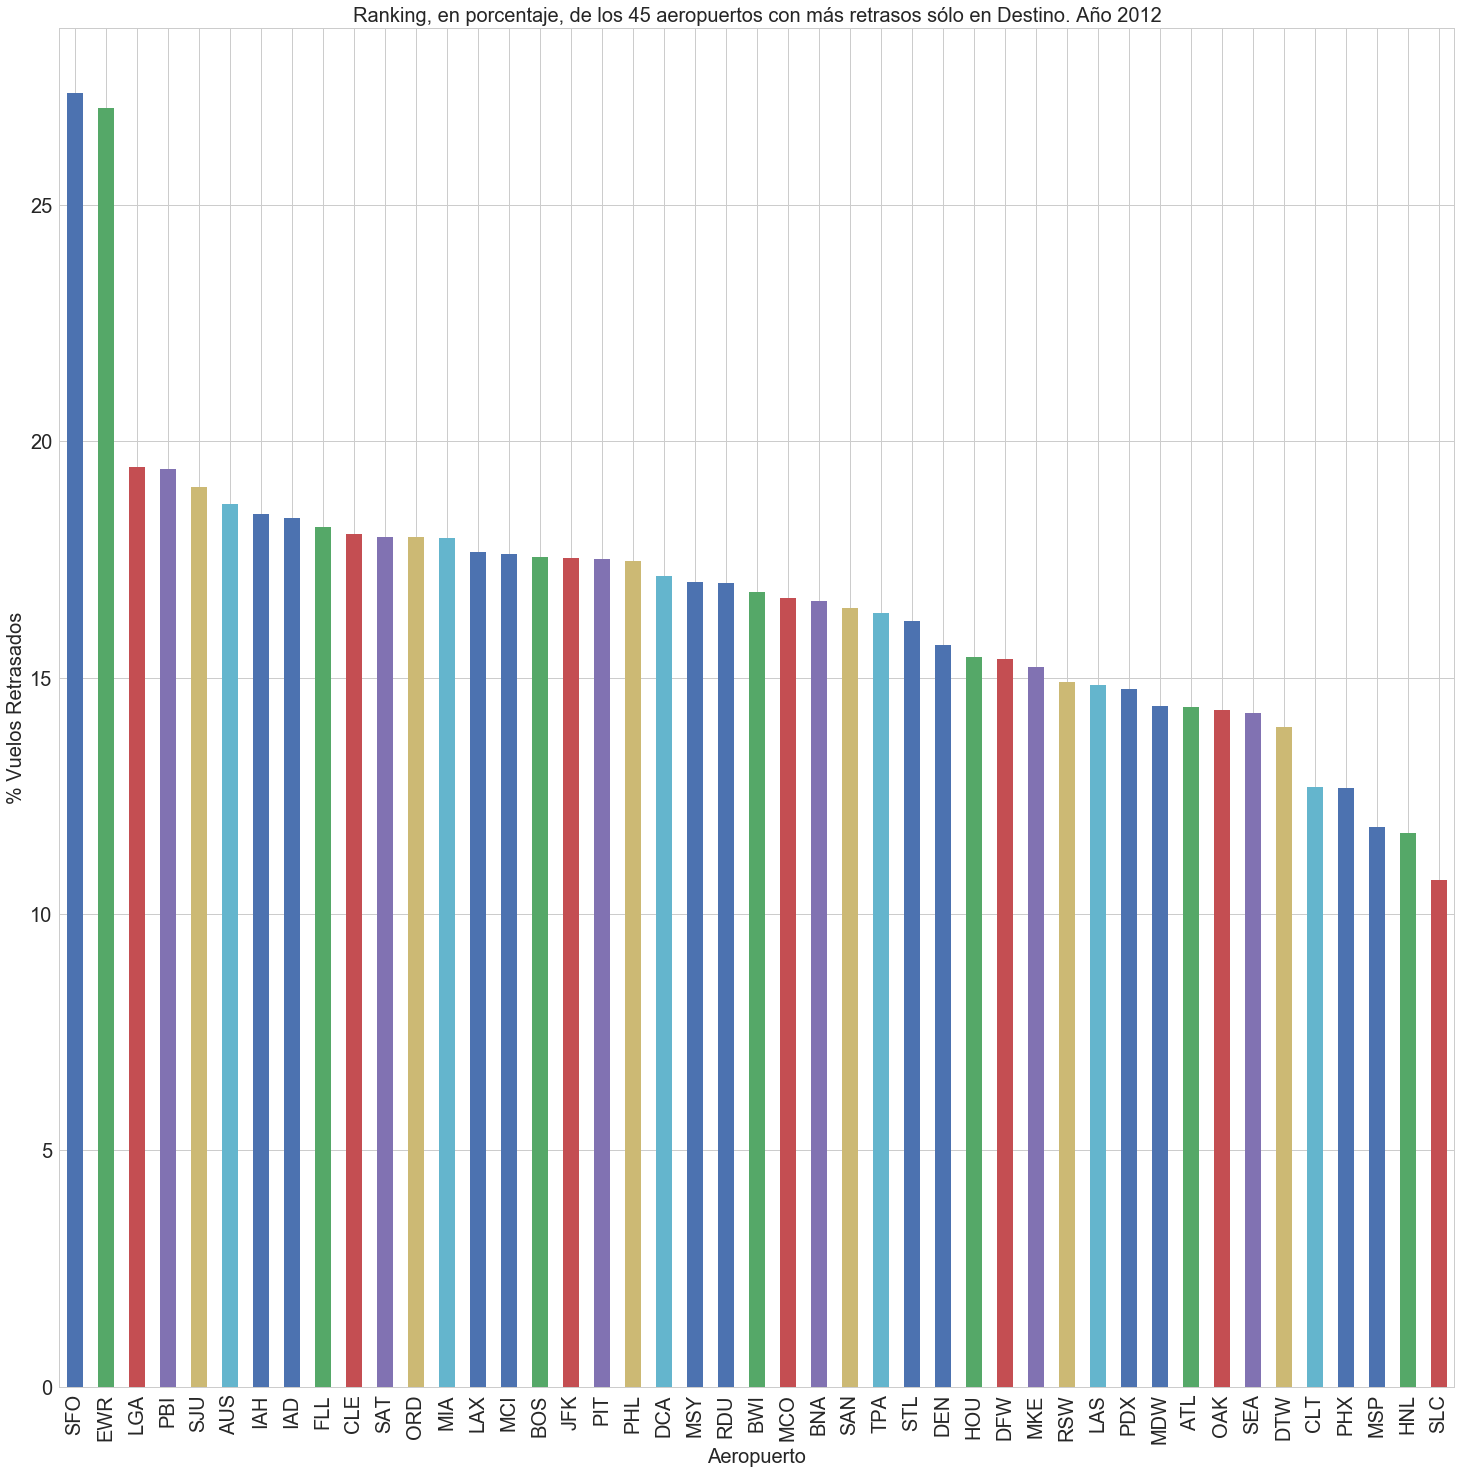

In [190]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos sólo en Destino

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos sólo en Destino. Año ' + year, fontsize=20)

plt.show()

Por porcentaje sobre su total de vuelos, destaca enormemente los 3 aeropuertos principales del área de Nueva York, EWR, LGA y JFK. Y en los 10 primeros 9 de ellos son de la Costa Este y Puerto Rico, sólo SFO (San Francisco) es de la Costa Oeste.

### 1.3.5.1.2 Retraso Destino (CON o SIN retraso en Origen)

En el apartado anterior sólo mostrábamos vuelos que se habían retrasado sólo en Destino y que salieron puntuales en Origen

In [191]:
#vuelos retrasados en Destino saliesen o no retrasados en origen
retrasosDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

In [192]:
retrasos = pd.DataFrame(retrasosDestino['ArrDelay'])

retrasos.head(5)

ArrDelay
4       77.0
5       24.0
6       19.0
7       28.0
12      28.0

In [193]:
retrasos.describe().T

count       mean       std   min   25%   50%   75%     max
ArrDelay  1012966.0  56.065457  59.61383  15.0  22.0  36.0  67.0  1823.0

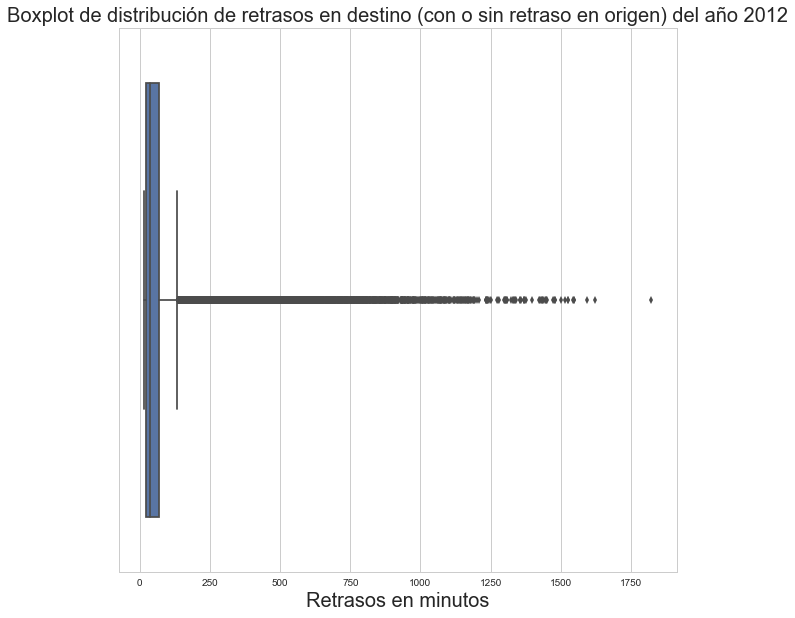

In [194]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasos["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino (con o sin retraso en origen) del año ' + year, fontsize=20)
plt.show()

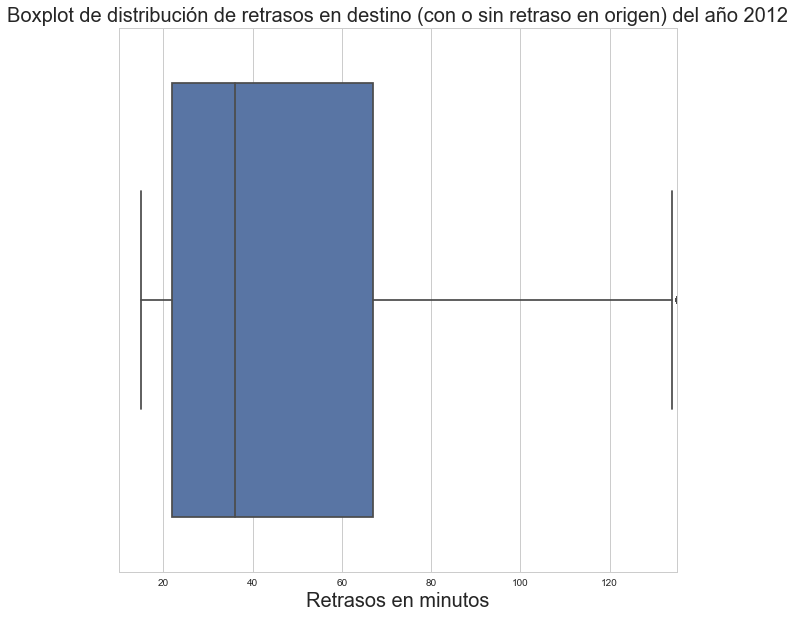

In [195]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(10,135)
ax = sns.boxplot(x=retrasos["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino (con o sin retraso en origen) del año ' + year, fontsize=20)
plt.show()

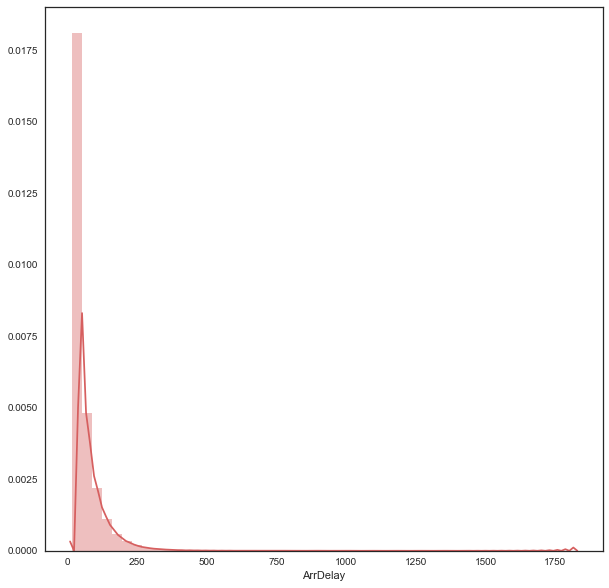

In [196]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasos["ArrDelay"], color="r")

plt.show()

In [197]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")
plt.xlim(-10,100)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

In [198]:
retrasosDestinoPorMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

retrasosDestinoPorMes = pd.DataFrame(retrasosDestinoPorMes.groupby('Month').aggregate({'Month': 'count', 'ArrDelay':'mean'}))


In [199]:
retrasosDestinoPorMes

Month   ArrDelay
Month                   
1       70778  54.292195
2       58859  50.703189
3       86242  54.821966
4       63520  52.013933
5       80250  55.773682
6       94414  58.388968
7      121106  62.965815
8      104162  59.041003
9       76910  55.308477
10      86404  51.613976
11      63749  53.958588
12     106572  56.453036

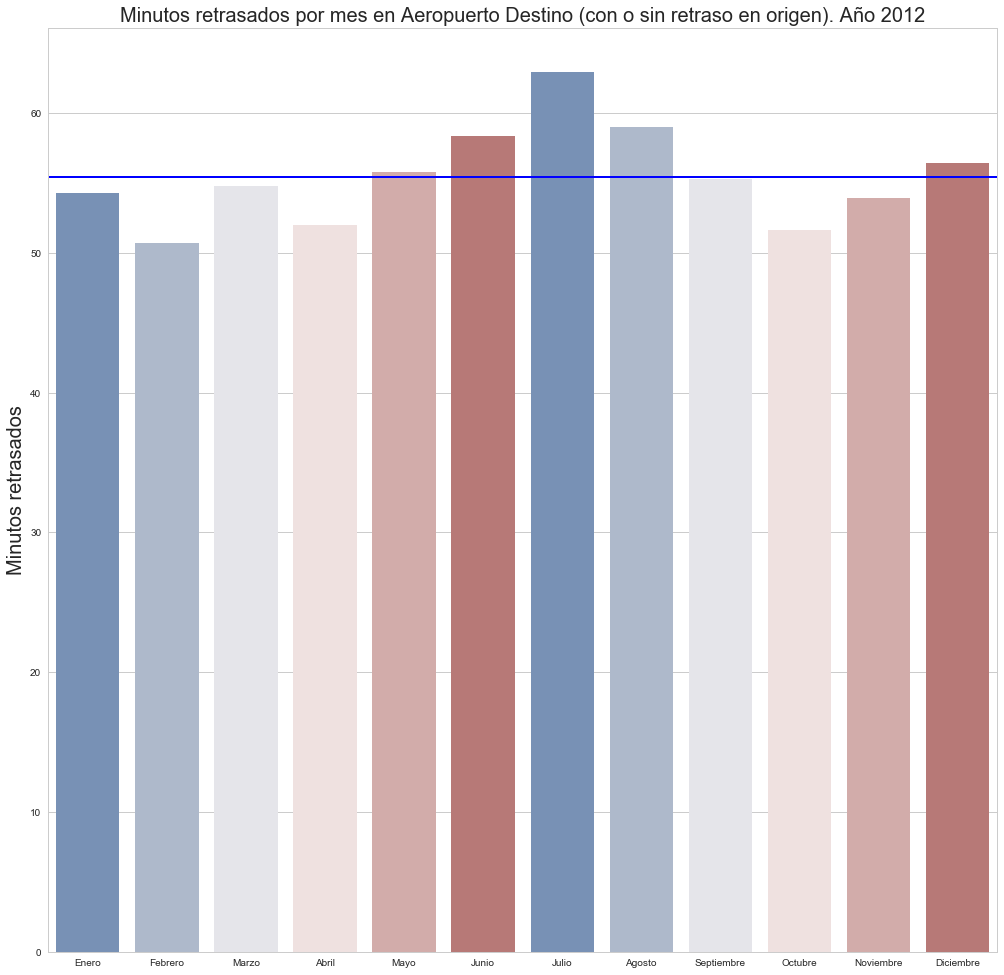

In [200]:

#Vuelos retrasados por el día de la semana

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(17,17))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por mes en Aeropuerto Destino (con o sin retraso en origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [201]:
retrasosDestinoPorDiaSemana = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

retrasosDestinoPorDiaSemana = pd.DataFrame(retrasosDestinoPorDiaSemana.groupby('DayOfWeek').aggregate({'DayOfWeek': 'count', 'ArrDelay':'mean'}))


In [202]:
retrasosDestinoPorDiaSemana

DayOfWeek   ArrDelay
DayOfWeek                      
1             155549  55.927309
2             132423  54.769013
3             135635  56.444745
4             164296  56.256799
5             173962  57.468918
6             108534  54.281967
7             142567  56.484257

In [203]:

#Vuelos retrasados por el día de la semana

my_xticks=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorDiaSemana['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por el día de la semana en Aeropuerto Destino (con o sin retraso en origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaSemana['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [204]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorHoraDelDia = pd.DataFrame(retrasosDestinoPorHoraDelDia.groupby('ArrTimeBlk').aggregate({'ArrTimeBlk': 'count', 'ArrDelay':'mean'}))

In [205]:
retrasosDestinoPorHoraDelDia

ArrTimeBlk   ArrDelay
ArrTimeBlk                       
0001-0559        23009  53.799252
0600-0659         7477  58.488297
0700-0759        16138  62.562957
0800-0859        23922  58.162236
0900-0959        34509  55.379640
1000-1059        41967  53.225868
1100-1159        44027  52.395598
1200-1259        49668  54.036301
1300-1359        52519  53.615739
1400-1459        59165  54.097017
1500-1559        60887  55.388786
1600-1659        77640  55.747926
1700-1759        73518  56.412117
1800-1859        85311  57.840114
1900-1959        82727  58.303855
2000-2059        85685  58.163459
2100-2159        79212  58.178054
2200-2259        65385  56.366307
2300-2359        50198  53.388820

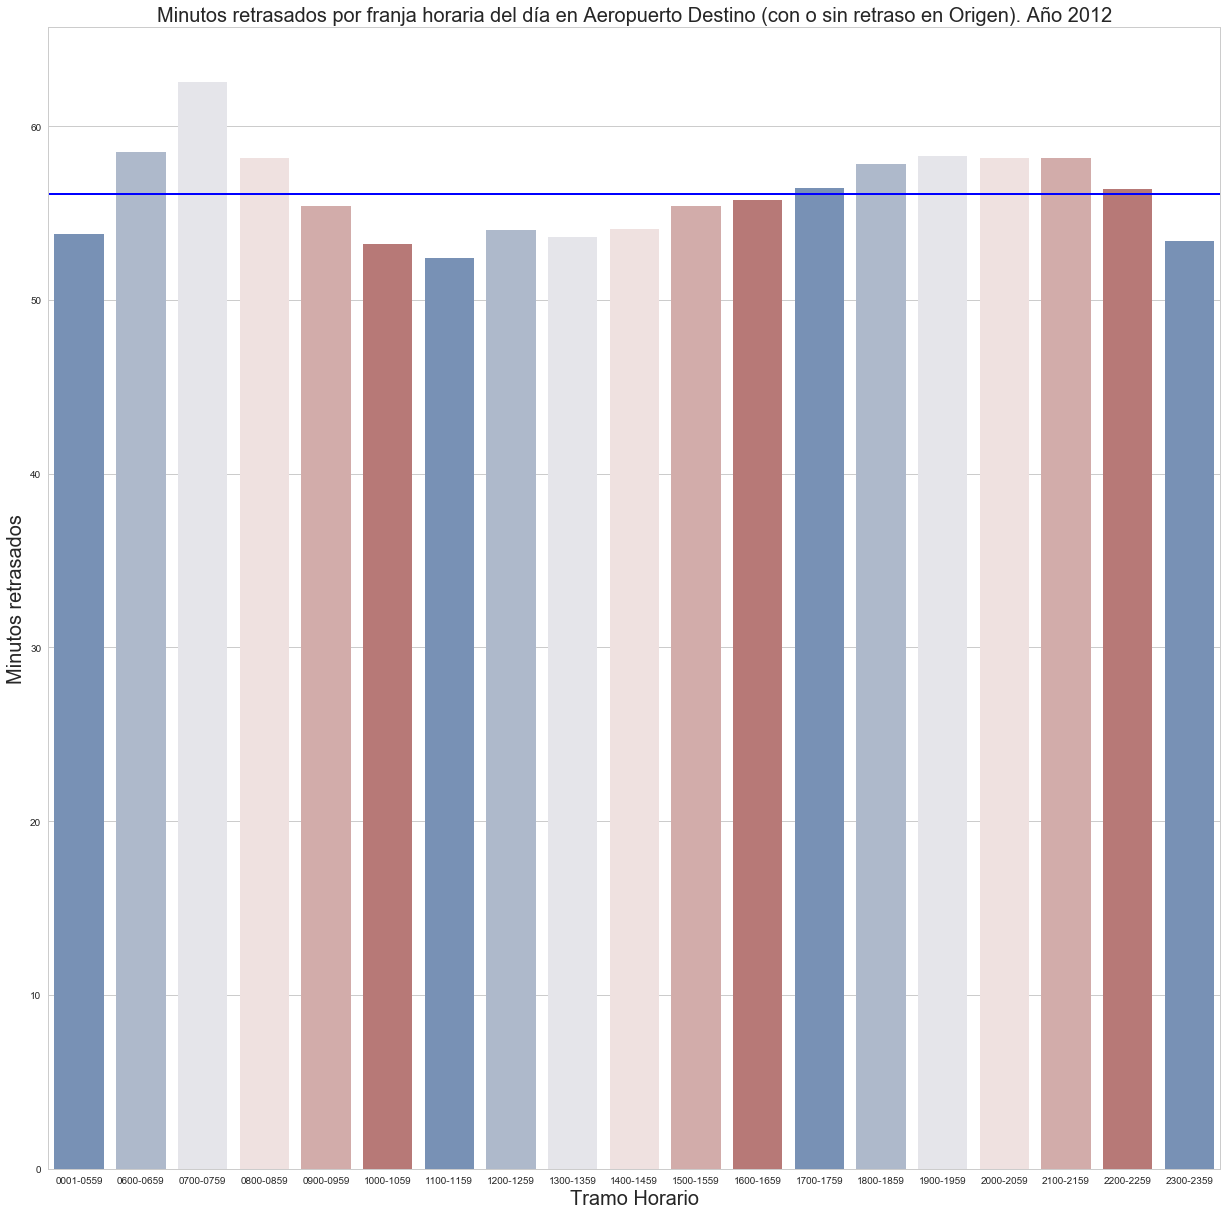

In [206]:
#Vuelos retrasados por franja horaria

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorHoraDelDia.index, y=retrasosDestinoPorHoraDelDia['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Tramo Horario", fontsize=20)
ax.set_title('Minutos retrasados por franja horaria del día en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorHoraDelDia['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [207]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorDiaDelMes = pd.DataFrame(retrasosDestinoPorDiaDelMes.groupby('DayofMonth').aggregate({'DayofMonth': 'count', 'ArrDelay':'mean'}))

In [208]:
retrasosDestinoPorDiaDelMes

DayofMonth   ArrDelay
DayofMonth                       
1                33798  56.364282
2                30024  52.636224
3                32589  54.678849
4                29574  53.486306
5                28381  54.665586
6                25976  56.475362
7                27492  51.107668
8                31290  53.676606
9                34480  59.220824
10               35503  60.780469
11               32360  53.219005
12               32888  55.896558
13               34040  57.807756
14               29764  53.402164
15               36005  56.147146
16               36129  54.617177
17               31407  52.425542
18               34646  59.586099
19               35226  56.739085
20               39390  57.244072
21               38725  60.047101
22               37488  59.344297
23               34301  56.047899
24               34414  54.599930
25               32782  57.319749
26               39098  59.870863
27               35552  54.922508
28               28544  53.356783
29               32275  55.639783
30               29598  55.006825
31               19227  56.820097

In [209]:

#Vuelos retrasados por dia del mes 

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorDiaDelMes.index, y=retrasosDestinoPorDiaDelMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Día del mes", fontsize=20)
ax.set_title('Minutos retrasados por día del mes en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show() 

In [210]:
retrasosDestinoPorTrimestre = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorTrimestre = pd.DataFrame(retrasosDestinoPorTrimestre.groupby('Quarter').aggregate({'Quarter': 'count', 'ArrDelay':'mean'}))

In [211]:
retrasosDestinoPorTrimestre

Quarter   ArrDelay
Quarter                    
1         215879  53.525299
2         238184  55.807691
3         302178  59.663980
4         256725  54.204978

In [212]:
#Vuelos retrasados por trimestre 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

Vistos las diferentes dimensiones temporales, se puede observar:
* cómo se van acumulando los retrasos a lo largo del día.
* como los principios y fines de mes hay algo más de retraso
* no hay gran diferencia entre los días de la semana

In [213]:
#primero cogemos los 45 aeropuertos (de destino) con mayor número de retrasos
retrasosAeropuertos = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)].Dest.value_counts(sort=True)).head(45)

In [214]:
retrasosAeropuertos

Dest
ATL  55883
ORD  55826
SFO  46914
DFW  41942
LAX  39347
DEN  36913
IAH  32758
EWR  32612
PHX  23185
LAS  21111
MCO  19924
LGA  19345
BOS  18117
CLT  17248
BWI  17248
JFK  17017
SEA  14284
IAD  13996
MIA  13936
PHL  13715
MSP  13095
DTW  12848
SAN  12699
MDW  12461
FLL  12219
DCA  12163
SLC  11816
TPA  11041
STL   9103
BNA   9030
MCI   8654
CLE   8546
HOU   8162
AUS   8126
PDX   7877
RDU   7482
SAT   6928
SMF   6730
OAK   6562
MSY   6480
HNL   6410
DAL   6295
MKE   5802
PIT   5427
SNA   5224

In [215]:
#retrasos totales de esos 45 aeropuerto
retrasosAeropuertos.sum()

Dest    772501
dtype: int64

In [216]:
#el 80% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80AeropuertosDestino = ((retrasosAeropuertos.sum() / (len(dfanual[(dfanual['ArrDel15'] == 1)])))) *100

In [217]:
pct80AeropuertosDestino

Dest    76.261296
dtype: float64

In [218]:
print('45 aeropuertos concentran el %.2f' %pct80AeropuertosDestino + '% de los retrasos del año ' + year)

45 aeropuertos concentran el 76.26% de los retrasos del año 2012


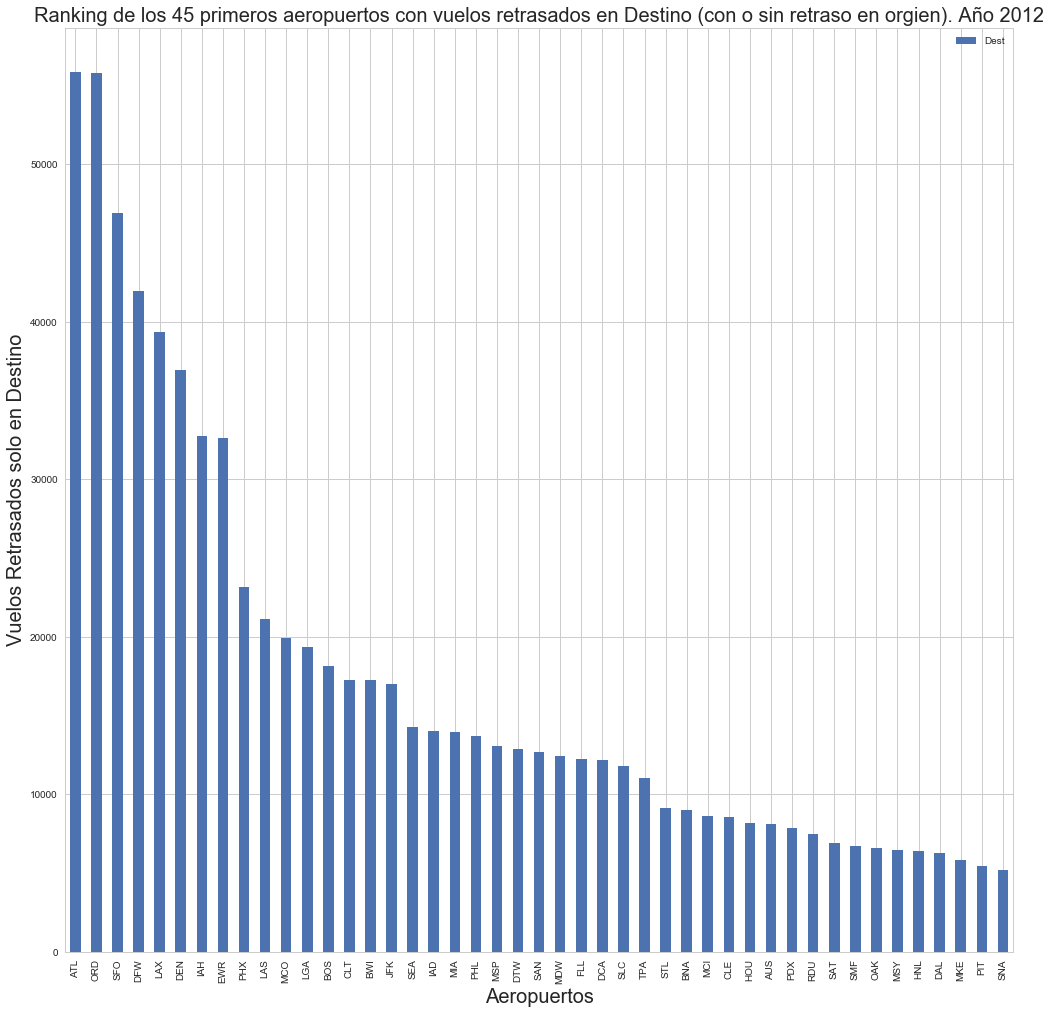

In [219]:
ax = retrasosAeropuertos.plot(kind='bar', figsize=(17,17))

ax.set_ylabel("Vuelos Retrasados solo en Destino", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Destino (con o sin retraso en orgien). Año ' + year , fontsize=20)

plt.show()

In [220]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosAeropuertos.index.values.tolist()

In [221]:
#nos quedamos con los datos de esos aeropuertos
retrasosDestinoAeropuertos = dfanual.loc[(dfanual["Dest"].isin(aeropuertos))]

In [222]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en sólo destino 
vuelosTotalesPorAeropuerto = retrasosDestinoAeropuertos.groupby('Dest').aggregate({'Dest': 'count', 'ArrDel15':'sum'})

In [223]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Dest': 'VuelosTotales', 'ArrDel15': 'VuelosRetrasados'})

In [224]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados sólo en destino en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [225]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de sólo en destino en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

In [226]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos sólo en Destino

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos en Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.show()

En porcentaje de vuelos retrasados, claramente, se ve que 9 de los 10 primeros aeropuertos del ranking son de la Costa Este.

### 1.3.5.1.2 Retraso por zona geográfica del Destino

In [227]:
#cualquier vuelo retrasado en la llegada
retrasosDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

In [228]:
#vamos a ponerle de qué zona greográfica es
#hemos creado un csv con las zonas geográficas Este, Central y Oeste y por Norte y Sur 
#abreviado en ES, EN, CS, CN, WS y WN
zonaEstados = pd.read_csv(ruta + "/geo/" + 'ZonasEstados.csv', delimiter=';')

In [229]:
#para hacer el join por estado, y como tenemos dos Estados en el Dataset (OriginState y DestState), renombraremos
#sucesivamente la cabecera para hacer el join
zonaEstados = zonaEstados.rename(columns={'State': 'OriginState', 'GeoCluster': 'OriginGeo'})

In [230]:
#hacemos el join por el Estado Origen del vuelo
retrasosDestino = pd.merge(retrasosDestino, zonaEstados, on='OriginState', how='inner')

In [231]:
#ahora renombramos para casar con los de Destino
zonaEstados = zonaEstados.rename(columns={'OriginState': 'DestState', 'OriginGeo': 'DestGeo'})

#hacemos el join por el Estado Destino del vuelo
retrasosDestino = pd.merge(retrasosDestino, zonaEstados, on='DestState', how='inner')

In [232]:
#comprobamos
retrasosDestino[['OriginState', 'OriginGeo', 'DestState', 'DestGeo']].head(5)

OriginState OriginGeo DestState DestGeo
0          IL        EN        OK      CS
1          IL        EN        OK      CS
2          IL        EN        OK      CS
3          IL        EN        OK      CS
4          IL        EN        OK      CS

In [233]:
retrasosDestinoGeo = pd.DataFrame(retrasosDestino.groupby('DestGeo').aggregate({'DestGeo': 'count', 'ArrDelay':'mean'}))

In [234]:
retrasosDestinoGeo

DestGeo   ArrDelay
DestGeo                    
CN         47815  53.405291
CS        194980  55.104667
EN        328624  59.075290
ES        214229  54.829617
WN         18322  51.554033
WS        207266  54.466314

In [235]:
#Vuelos retrasados por Costa Este 

plt.figure(figsize=(12,12))

my_xticks=['USA Centro Norte', 'USA Centro Sur', 'USA Este Norte', 'USA Este Sur', 'USA Oeste Norte', 'USA Oeste Sur']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoGeo['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Zona geográfica", fontsize=20)
ax.set_title('Minutos retrasados, en destino, por zona geográfica de USA. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoGeo['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

Nos quedamos sólo con los de la Costa Este

In [236]:

retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestino[((retrasosDestino['OriginGeo'] == 'EN') | (retrasosDestino['OriginGeo'] == 'ES')) & ((retrasosDestino['DestGeo'] == 'EN') | (retrasosDestino['DestGeo'] == 'ES'))])

In [237]:
retrasosDestinoSoloCostaEste.Dest.unique()

array(['ORD', 'BMI', 'CMI', 'MLI', 'PIA', 'SPI', 'MDW', 'RIC', 'CHO',
       'DCA', 'IAD', 'ORF', 'ROA', 'PHF', 'SHD', 'BUF', 'ROC', 'SYR',
       'ART', 'HPN', 'LGA', 'ALB', 'ISP', 'JFK', 'ELM', 'SWF', 'CVG',
       'LEX', 'PAH', 'SDF', 'CMH', 'CLE', 'TOL', 'DAY', 'CAK', 'TVC',
       'DTW', 'GRR', 'AZO', 'MBS', 'CMX', 'MKG', 'LAN', 'MQT', 'FNT',
       'APN', 'ESC', 'IMT', 'PLN', 'BNA', 'MEM', 'TYS', 'TRI', 'CHA',
       'PIT', 'MDT', 'PHL', 'AVP', 'ABE', 'JAX', 'MCO', 'TPA', 'MIA',
       'FLL', 'RSW', 'PNS', 'SRQ', 'PBI', 'TLH', 'DAB', 'MLB', 'VPS',
       'GNV', 'EYW', 'CLT', 'RDU', 'ILM', 'AVL', 'GSO', 'OAJ', 'FAY',
       'EWN', 'MKE', 'CWA', 'GRB', 'MSN', 'EAU', 'ATW', 'LSE', 'FWA',
       'IND', 'EVV', 'SBN', 'HSV', 'BHM', 'MOB', 'DHN', 'MGM', 'BWI',
       'SLC', 'SGU', 'CDC', 'ATL', 'SAV', 'AGS', 'CSG', 'BQK', 'VLD',
       'ABY', 'CHS', 'GSP', 'CAE', 'MYR', 'BDL', 'SEA', 'GEG', 'PSC',
       'PVD', 'BOS', 'ACK', 'MVY', 'EWR', 'ACY', 'TTN', 'SJU', 'BQN',
       'PSE', 'MHT',

In [238]:
retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestinoSoloCostaEste.groupby('DestGeo').aggregate({'DestGeo': 'count', 'ArrDelay':'mean'}))

In [239]:
retrasosDestinoSoloCostaEste

DestGeo   ArrDelay
DestGeo                    
EN        226699  60.906083
ES        156373  56.015329

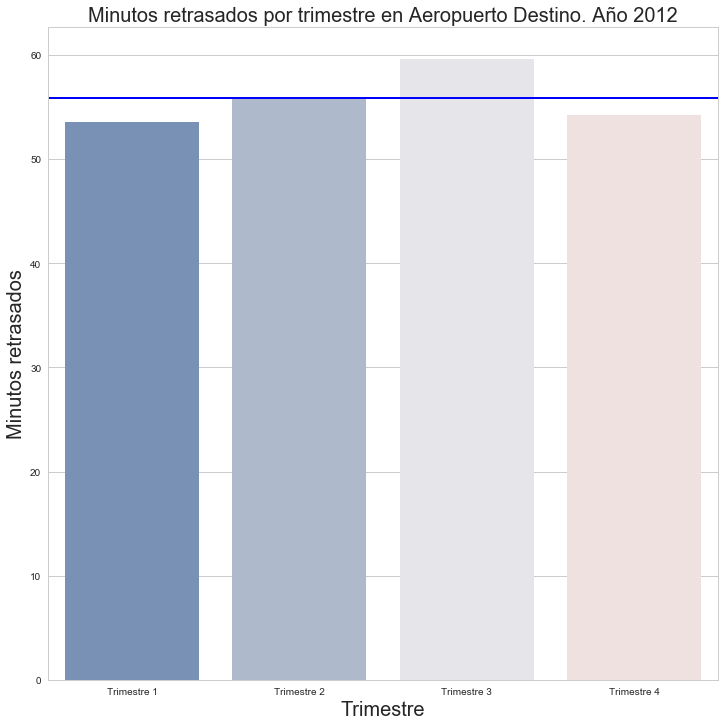

In [240]:
#Vuelos retrasados por Costa Este 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [241]:
retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestino[((retrasosDestino['OriginGeo'] == 'EN') | (retrasosDestino['OriginGeo'] == 'ES')) & ((retrasosDestino['DestGeo'] == 'EN') | (retrasosDestino['DestGeo'] == 'ES'))])

In [242]:
retrasosDestinoPorRuta = pd.DataFrame(retrasosDestinoSoloCostaEste.groupby(['Route']).aggregate({'Route': 'count', 'ArrDelay':'mean', 'DepDelay': 'mean', 'Origin': 'count', 'Dest':'count'}))

retrasosDestinoPorRuta = retrasosDestinoPorRuta.rename(columns={'Route': 'VuelosTotales', 'ArrDelay': 'MediaRetrasoDestinoTotal', 'DepDelay': 'MediaRetrasoOrigenTotal'})



In [243]:
retrasosDestinoPorRuta.reset_index()

Route  VuelosTotales  MediaRetrasoDestinoTotal  \
0     ABE-ATL             36                 75.694444   
1     ABE-CLT             30                 41.133333   
2     ABE-DTW             71                 67.802817   
3     ABE-IAD             20                 90.200000   
4     ABE-MCO             47                 62.765957   
5     ABE-ORD            173                 84.040462   
6     ABY-ATL            165                 61.630303   
7     ACK-BOS             23                 79.304348   
8     ACK-JFK             62                 98.064516   
9     AGS-ATL            599                 60.235392   
10    AGS-CLT              5                 67.600000   
11    AGS-LGA              2                 53.500000   
12    ALB-ATL            141                 53.524823   
13    ALB-BWI            291                 64.340206   
14    ALB-CLE            139                 70.035971   
15    ALB-CLT             58                 44.000000   
16    ALB-DTW             13                 70.000000   
17    ALB-EWR            185                 65.178378   
18    ALB-FLL             40                 48.300000   
19    ALB-IAD            107                 68.570093   
20    ALB-MCO            118                 50.059322   
21    ALB-MDW             93                 43.204301   
22    ALB-ORD            215                 74.520930   
23    ALB-TPA             33                 58.939394   
24    APN-DTW              8                 45.750000   
25    ART-ORD             67                103.089552   
26    ATL-ABE            126                 56.079365   
27    ATL-ABY            171                 62.426901   
28    ATL-ACY              1                 17.000000   
29    ATL-AGS            500                 58.294000   
...       ...            ...                       ...   
1689  TPA-MIA            358                 50.346369   
1690  TPA-MKE             75                 46.213333   
1691  TPA-ORD            447                 57.597315   
1692  TPA-ORF             33                 55.939394   
1693  TPA-PBI            188                 52.930851   
1694  TPA-PHL            424                 60.629717   
1695  TPA-PIT            100                 64.310000   
1696  TPA-PVD             93                 57.322581   
1697  TPA-RDU            146                 51.719178   
1698  TPA-ROC             38                 58.894737   
1699  TPA-SDF             64                 66.765625   
1700  TPA-SJU            128                 52.609375   
1701  TRI-ATL            443                 68.230248   
1702  TRI-CLT              1                 94.000000   
1703  TRI-ORD              5                 69.000000   
1704  TTN-MCO              7                 32.285714   
1705  TVC-DTW             14                 78.571429   
1706  TVC-LGA              6                167.333333   
1707  TVC-ORD            386                 73.313472   
1708  TYS-ATL            367                 62.771117   
1709  TYS-DTW             17                 46.882353   
1710  TYS-EWR            157                 72.031847   
1711  TYS-GSP              2                 24.000000   
1712  TYS-IAD            170                 64.723529   
1713  TYS-MCO             16                 52.625000   
1714  TYS-MEM             40                 68.225000   
1715  TYS-MIA              6                 83.333333   
1716  TYS-ORD            468                 80.743590   
1717  VLD-ATL            176                 67.931818   
1718  VPS-ATL            530                 60.430189   

      MediaRetrasoOrigenTotal  Origin  Dest  
0                   72.555556      36    36  
1                   30.900000      30    30  
2                   65.140845      71    71  
3                   94.150000      20    20  
4                   44.936170      47    47  
5                   81.809249     173   173  
6                   54.036364     165   165  
7                   81.260870      23    23

In [244]:
rutasVuelosTop20 = retrasosDestinoPorRuta.sort_values(['VuelosTotales'], ascending=False).head(20)

In [245]:
rutasVuelosTop20

VuelosTotales  MediaRetrasoDestinoTotal  MediaRetrasoOrigenTotal  \
Route                                                                       
ORD-LGA           2134                 61.842081                57.884724   
LGA-ATL           2117                 57.167690                41.288144   
ATL-LGA           2020                 55.741584                45.175248   
ORD-EWR           1941                 60.726945                55.592993   
ORD-DCA           1704                 58.018779                51.419601   
LGA-ORD           1593                 68.297552                61.285625   
ORD-ATL           1558                 62.262516                56.030167   
ORD-BOS           1531                 56.440235                52.365774   
ORD-CLE           1444                 60.513850                58.443213   
ORD-PHL           1392                 56.496408                46.373563   
ATL-ORD           1385                 64.512635                58.333574   
DCA-ORD           1341                 72.366145                65.997017   
EWR-ORD           1336                 65.301647                61.880988   
CLT-EWR           1288                 61.111801                55.746894   
BOS-EWR           1216                 61.939967                56.002467   
ORD-DTW           1216                 57.476151                53.141447   
PHL-ATL           1211                 55.780347                44.030553   
ATL-EWR           1209                 63.026468                63.484698   
ORD-CLT           1205                 54.692116                47.634025   
MCO-ATL           1185                 51.720675                39.475105   

         Origin  Dest  
Route                  
ORD-LGA    2134  2134  
LGA-ATL    2117  2117  
ATL-LGA    2020  2020  
ORD-EWR    1941  1941  
ORD-DCA    1704  1704  
LGA-ORD    1593  1593  
ORD-ATL    1558  1558  
ORD-BOS    1531  1531  
ORD-CLE    1444  1444  
ORD-PHL    1392  1392  
ATL-ORD    1385  1385  
DCA-ORD    1341  1341  
EWR-ORD    1336  1336  
CLT-EWR    1288  1288  
BOS-EWR    1216  1216  
ORD-DTW    1216  1216  
PHL-ATL    1211  1211  
ATL-EWR    1209  1209  
ORD-CLT    1205  1205  
MCO-ATL    1185  1185

In [246]:
#retaso medio en destino  en las 20 principales rutas retrasadas de la costa Este

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=rutasVuelosTop20.index, y=rutasVuelosTop20['MediaRetrasoDestinoTotal'], palette=pal)

ax.set_ylabel("Media Minutos Retraso", fontsize=20)
ax.set_title('Minutos Retrasados en las 20 principales rutas de la Costa Este. Año ' + year, fontsize=20)

plt.axhline(rutasVuelosTop20['MediaRetrasoDestinoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

## 1.3.6 Cancelaciones de Vuelos

In [247]:
#Vuelos que se han cancelado
len(dfanual[dfanual['Cancelled'] == 1])

78779

In [248]:
vuelosCanceladosPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorMes = vuelosCanceladosPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['Cancelled'] == 1)])}, ignore_index=True)


In [249]:
vuelosCanceladosPorMes

mes vuelos
0    1   7084
1    2   4645
2    3   5405
3    4   4960
4    5   4479
5    6   5785
6    7   7705
7    8   7089
8    9   3945
9   10  14613
10  11   5104
11  12   7965

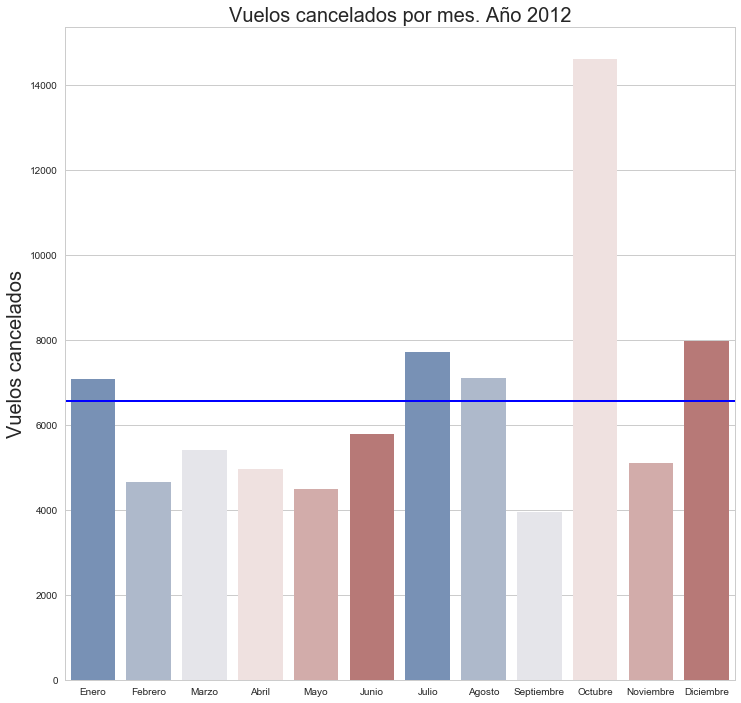

In [250]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por mes. Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

In [251]:
#comprobación de que tenemos o no códigos de cancelación asociados a los cancelados (entre 2001 y 2003 no tenemos)
#hay 65143
conCodigo = dfanual.CancellationCode.dropna()
len(conCodigo)

78779

Tenemos motivos de cancelación, así que vamos a estudiarlos

### 1.3.6.1 Cancelados por la Aerolínea

In [252]:
#cancelados por culpa de aerolínea
len(dfanual[dfanual['CancellationCode'] == 'A'])

30266

In [253]:
vuelosCanceladosPorAerolinea = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorAerolinea = vuelosCanceladosPorAerolinea.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'A')])}, ignore_index=True)


In [254]:
vuelosCanceladosPorAerolinea

mes vuelos
0    1   3667
1    2   2542
2    3   2862
3    4   2035
4    5   2440
5    6   2739
6    7   3198
7    8   2528
8    9   2444
9   10   1738
10  11   1484
11  12   2589

In [255]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorAerolinea['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por la Aerolínea y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorAerolinea['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.2 Cancelados por Meteorología

In [256]:
#cancelados por las condiciones meteorológicas
len(dfanual[dfanual['CancellationCode'] == 'B'])

33558

In [257]:
vuelosCanceladosPorMeteo = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorMeteo = vuelosCanceladosPorMeteo.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'B')])}, ignore_index=True)


In [258]:
vuelosCanceladosPorMeteo

mes vuelos
0    1   2168
1    2   1524
2    3   1301
3    4   1680
4    5   1147
5    6   1356
6    7   1867
7    8   2850
8    9    512
9   10  11974
10  11   2799
11  12   4380

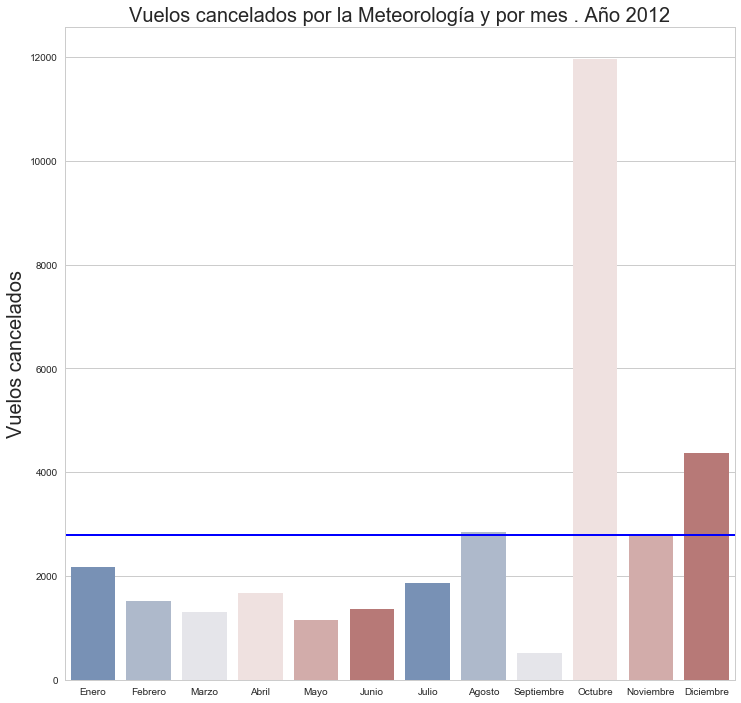

In [259]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorMeteo['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por la Meteorología y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorMeteo['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.3 Cancelados por Espacio Aéreo

In [260]:
#cancelados por el Espacio Aéreo
len(dfanual[dfanual['CancellationCode'] == 'C'])

14934

In [261]:
vuelosCanceladosPorNAS = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorNAS = vuelosCanceladosPorNAS.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'C')])}, ignore_index=True)


In [262]:
vuelosCanceladosPorNAS

mes vuelos
0    1   1249
1    2    576
2    3   1239
3    4   1245
4    5    890
5    6   1690
6    7   2638
7    8   1703
8    9    987
9   10    901
10  11    820
11  12    996

In [263]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorNAS['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por el Espacio Aéreo y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorNAS['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.4 Cancelación por motivos de Seguridad

In [264]:
#cancelados por Seguridad (física)
len(dfanual[dfanual['CancellationCode'] == 'D'])

21

In [265]:
vuelosCanceladosPorSeguridad = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorSeguridad = vuelosCanceladosPorSeguridad.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'D')])}, ignore_index=True)

In [266]:
vuelosCanceladosPorSeguridad

mes vuelos
0    1      0
1    2      3
2    3      3
3    4      0
4    5      2
5    6      0
6    7      2
7    8      8
8    9      2
9   10      0
10  11      1
11  12      0

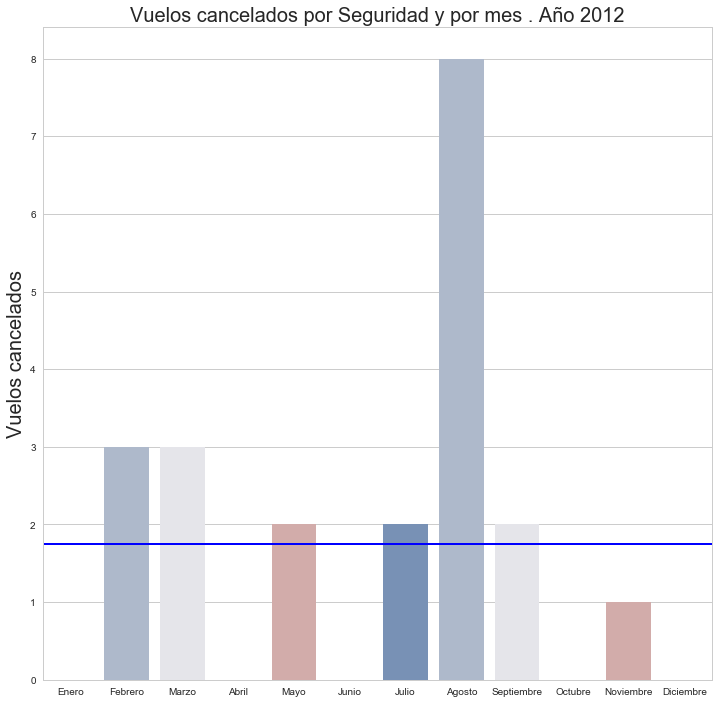

In [267]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorSeguridad['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por Seguridad y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorSeguridad['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.5 Cancelaciones distribuidas por aerolíneas

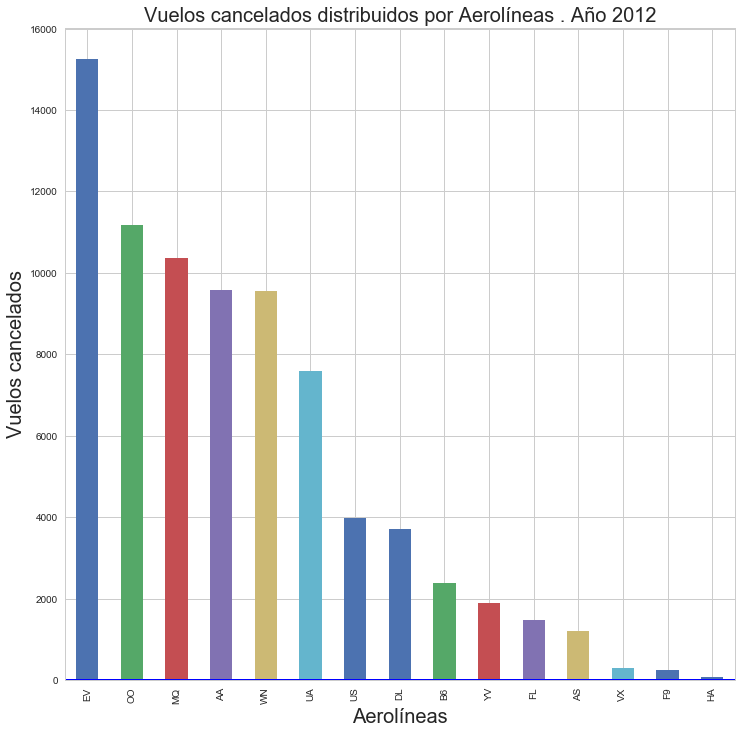

In [268]:
plt.figure(figsize=(12, 12))

ax = dfanual[dfanual['Cancelled'] == 1].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar')

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_xlabel("Aerolíneas", fontsize=20)
ax.set_title('Vuelos cancelados distribuidos por Aerolíneas . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorSeguridad['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

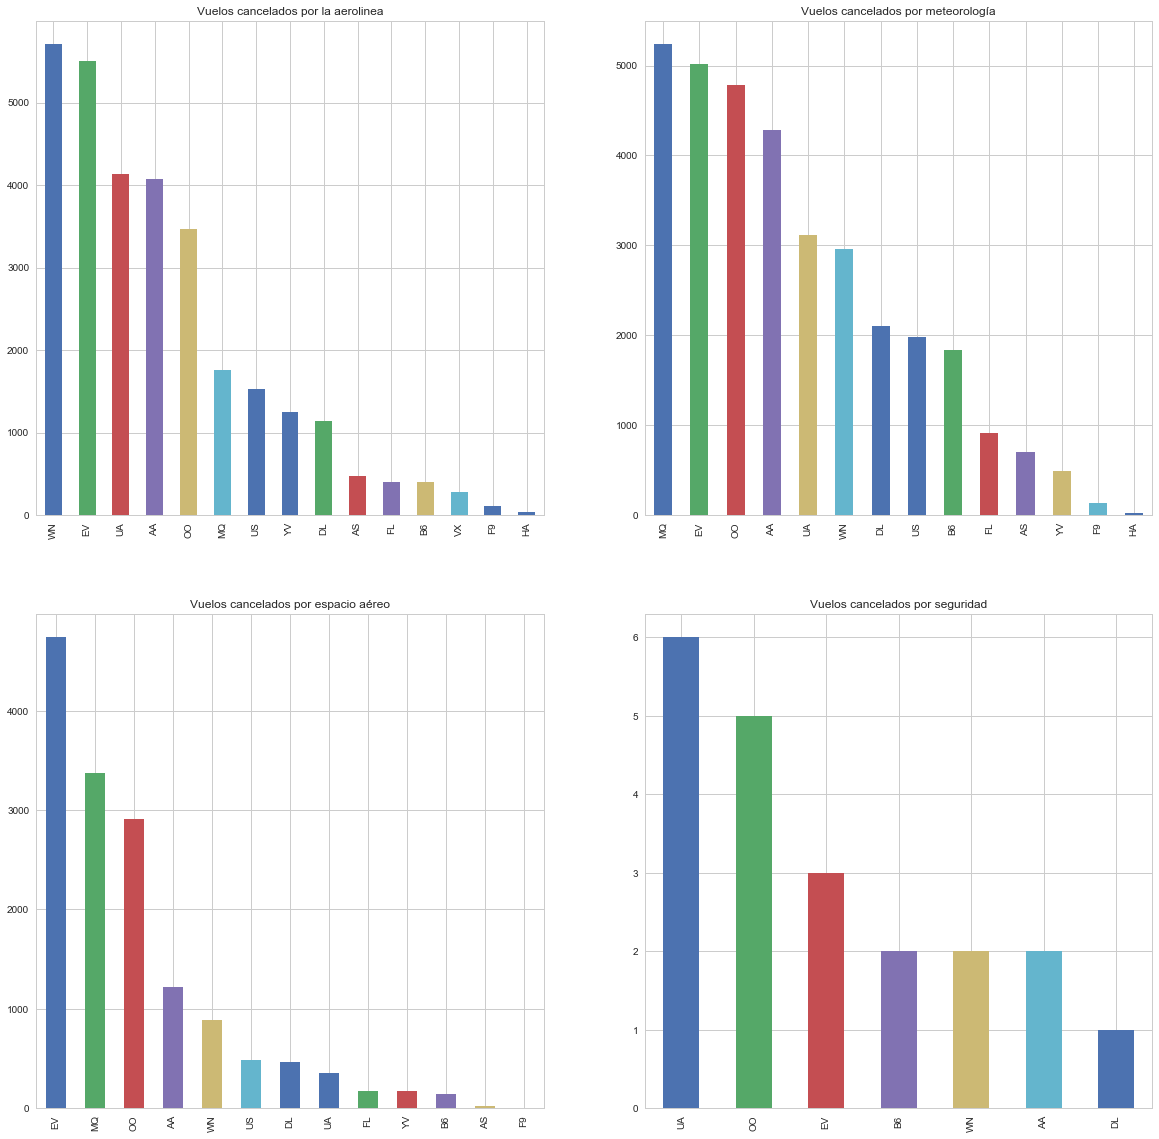

In [269]:
#Sacamos gráficos por compañía
plt.figure(figsize=(20, 20))

plt.subplot(2,2,1)
dfanual[dfanual['CancellationCode'] == 'A'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por la aerolinea')

plt.subplot(2,2,2)
dfanual[dfanual['CancellationCode'] == 'B'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por meteorología')

plt.subplot(2,2,3)
dfanual[dfanual['CancellationCode'] == 'C'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por espacio aéreo')

plt.subplot(2,2,4)
dfanual[dfanual['CancellationCode'] == 'D'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por seguridad')


### 1.3.6.6 Cancelaciones por Rutas

Mostramos aquellas rutas con más cancelaciones

#### 1.3.6.6.1 Vuelos cancelados por Ruta por la Aerolínea

In [270]:
rutasVuelosCanceladosAerolinea = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'A'].Route.value_counts(sort=True))

In [271]:
rutasVuelosCanceladosAerolinea.shape

(3241, 1)

In [272]:
rutasVuelosCanceladosAerolinea = rutasVuelosCanceladosAerolinea.rename(columns={'Route': 'VuelosCancelados'})

In [273]:
rutasVuelosCanceladosAerolinea.head(10)

VuelosCancelados
DAL-HOU               293
HOU-DAL               292
SFO-LAX               230
LAX-SFO               227
LGA-ORD               185
ORD-LGA               165
DCA-ORD               133
ORD-DCA               128
OAK-LAX               126
BUR-OAK               122

In [274]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosAerolinea = rutasVuelosCanceladosAerolinea.head(20)

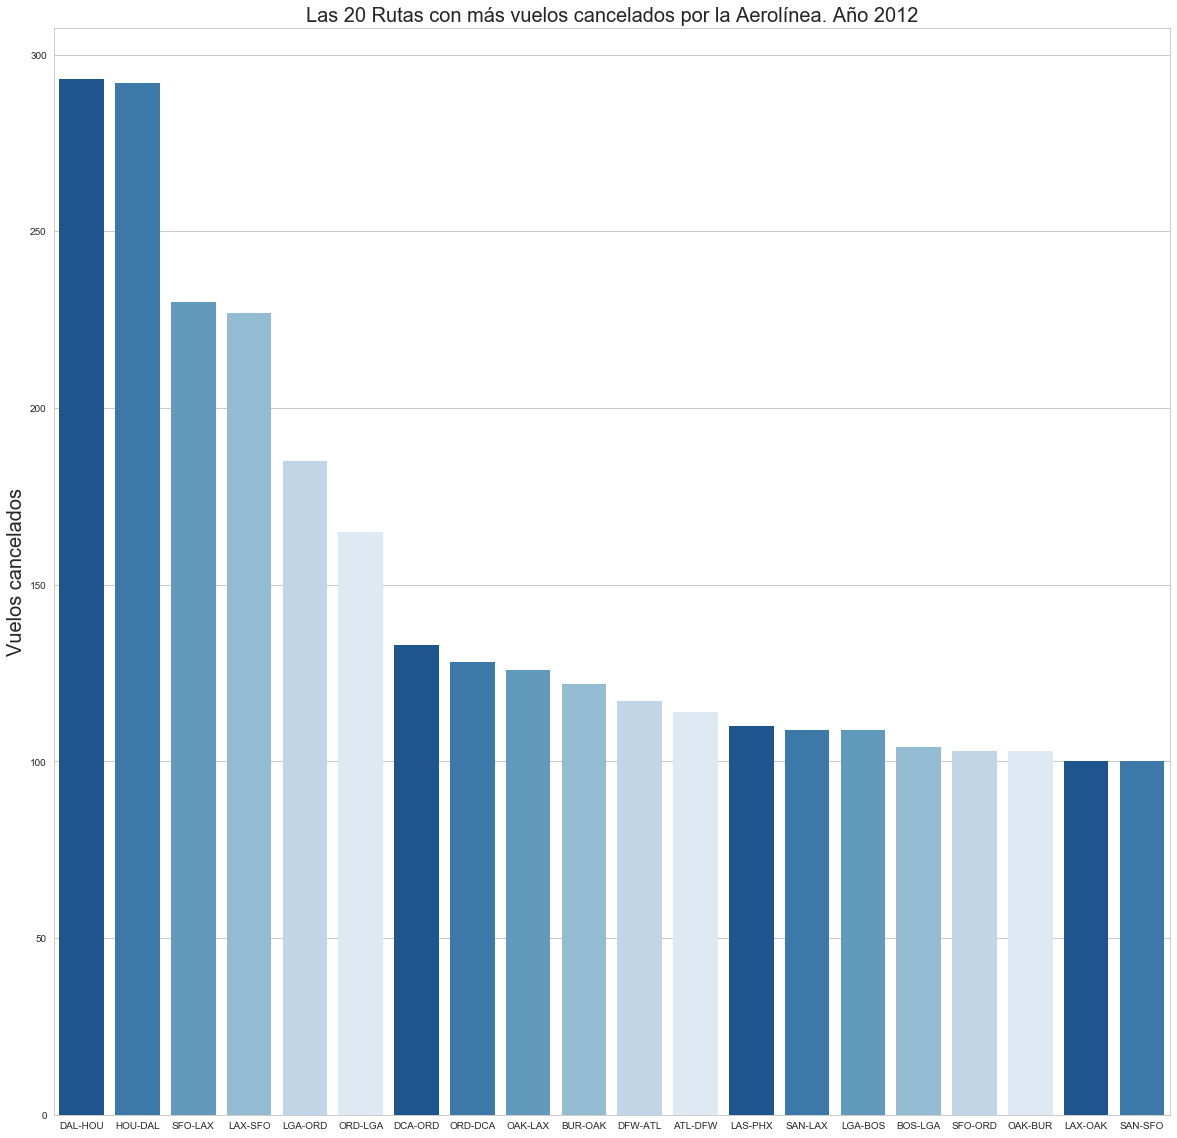

In [275]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r")
ax = sns.barplot(x=rutasVuelosCanceladosAerolinea.index, y=rutasVuelosCanceladosAerolinea['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por la Aerolínea. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.2 Vuelos cancelados por Ruta por la Meteorología

In [276]:
rutasVuelosCanceladosMeteo = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'B'].Route.value_counts(sort=True))

In [277]:
rutasVuelosCanceladosMeteo.shape

(3162, 1)

In [278]:
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.rename(columns={'Route': 'VuelosCancelados'})

In [279]:
rutasVuelosCanceladosMeteo.head(10)

VuelosCancelados
LGA-ORD               195
ORD-LGA               191
SUN-SLC               143
LGA-ATL               141
ATL-LGA               140
ORD-EWR               122
DCA-LGA               122
LGA-DCA               121
LGA-BOS               120
BOS-LGA               118

In [280]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.head(20)

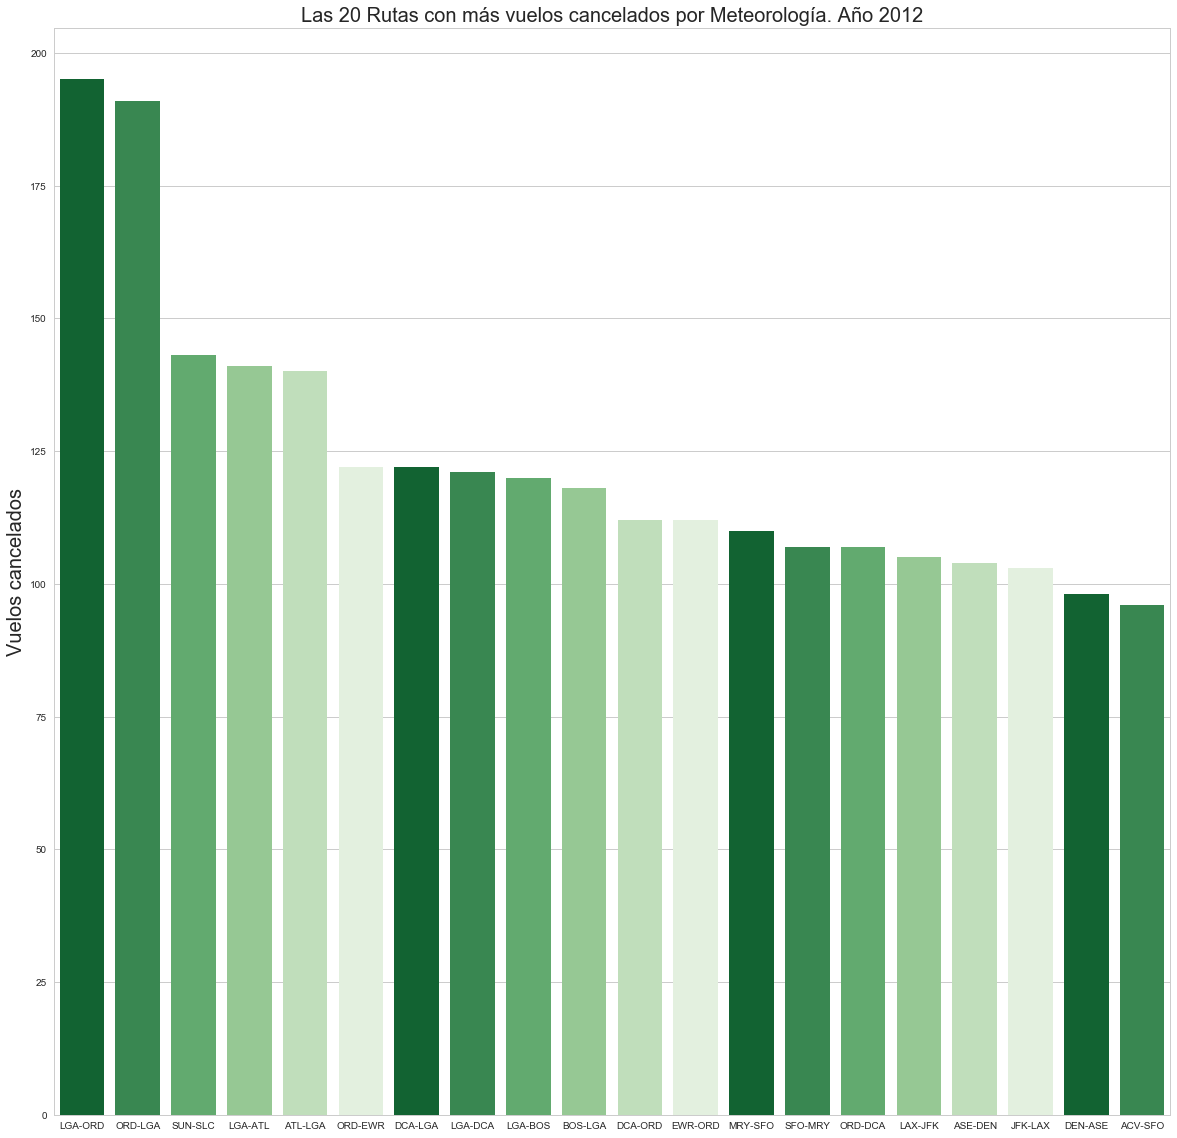

In [281]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=rutasVuelosCanceladosMeteo.index, y=rutasVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Meteorología. Año ' + year, fontsize=20)

plt.show()

In [282]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.head(20)

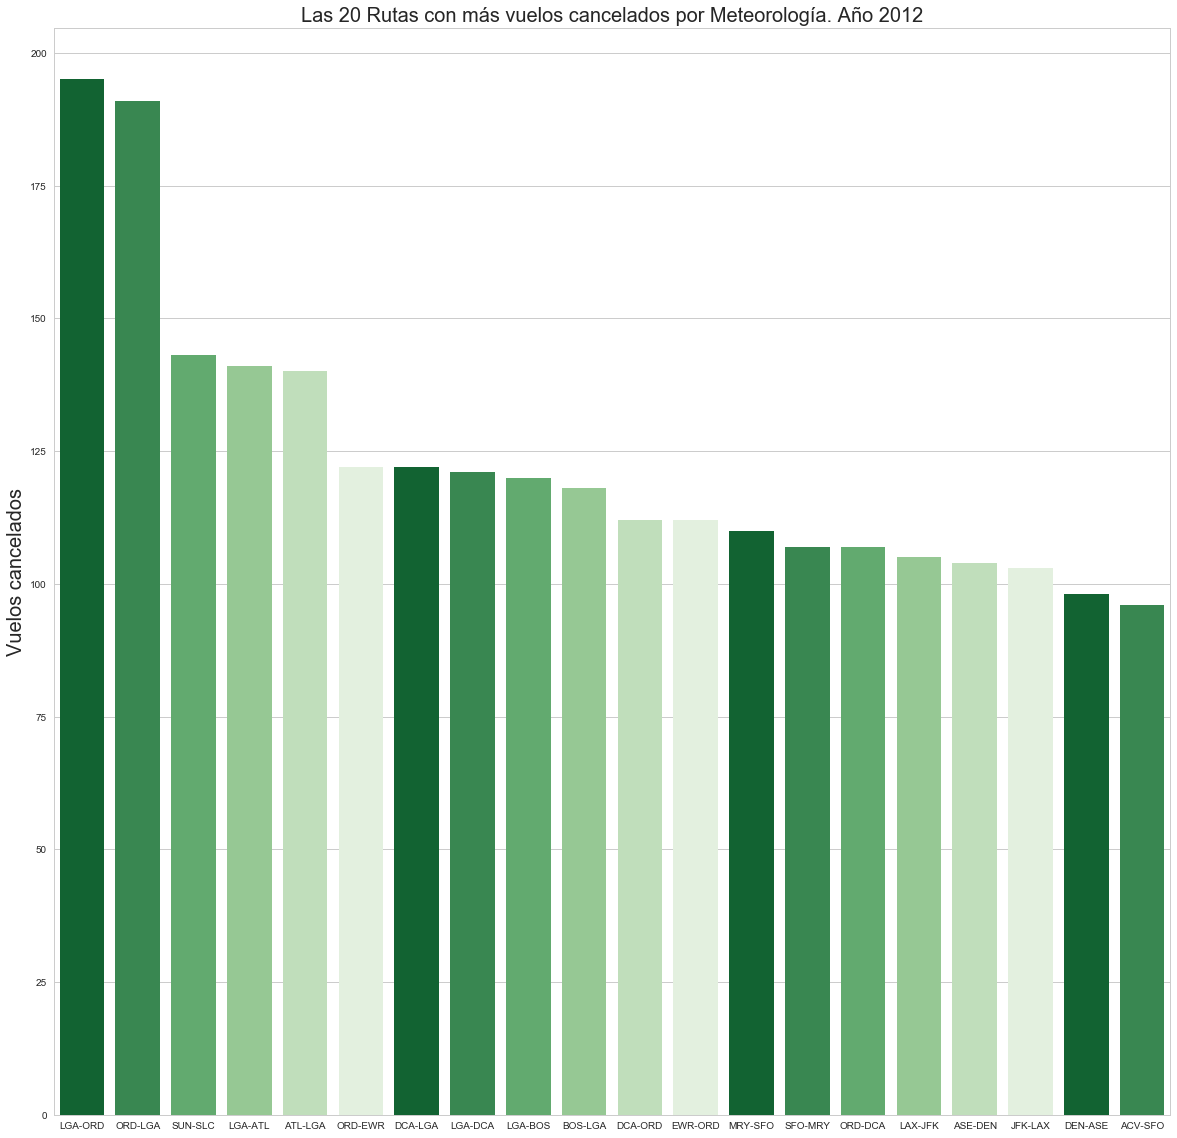

In [283]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=rutasVuelosCanceladosMeteo.index, y=rutasVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Meteorología. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.3 Vuelos cancelados por Ruta por la Espacio Aéreo

In [284]:
rutasVuelosCanceladosNAS = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'C'].Route.value_counts(sort=True))

In [285]:
rutasVuelosCanceladosNAS.shape

(1894, 1)

In [286]:
rutasVuelosCanceladosNAS = rutasVuelosCanceladosNAS.rename(columns={'Route': 'VuelosCancelados'})

rutasVuelosCanceladosNAS.head(10)

VuelosCancelados
SFO-LAX               232
LAX-SFO               211
BOS-LGA               110
LGA-BOS               107
LGA-ATL                92
ATL-LGA                92
SNA-SFO                89
SFO-SNA                86
SFO-MRY                85
RDU-LGA                82

In [287]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosNAS = rutasVuelosCanceladosNAS.head(20)

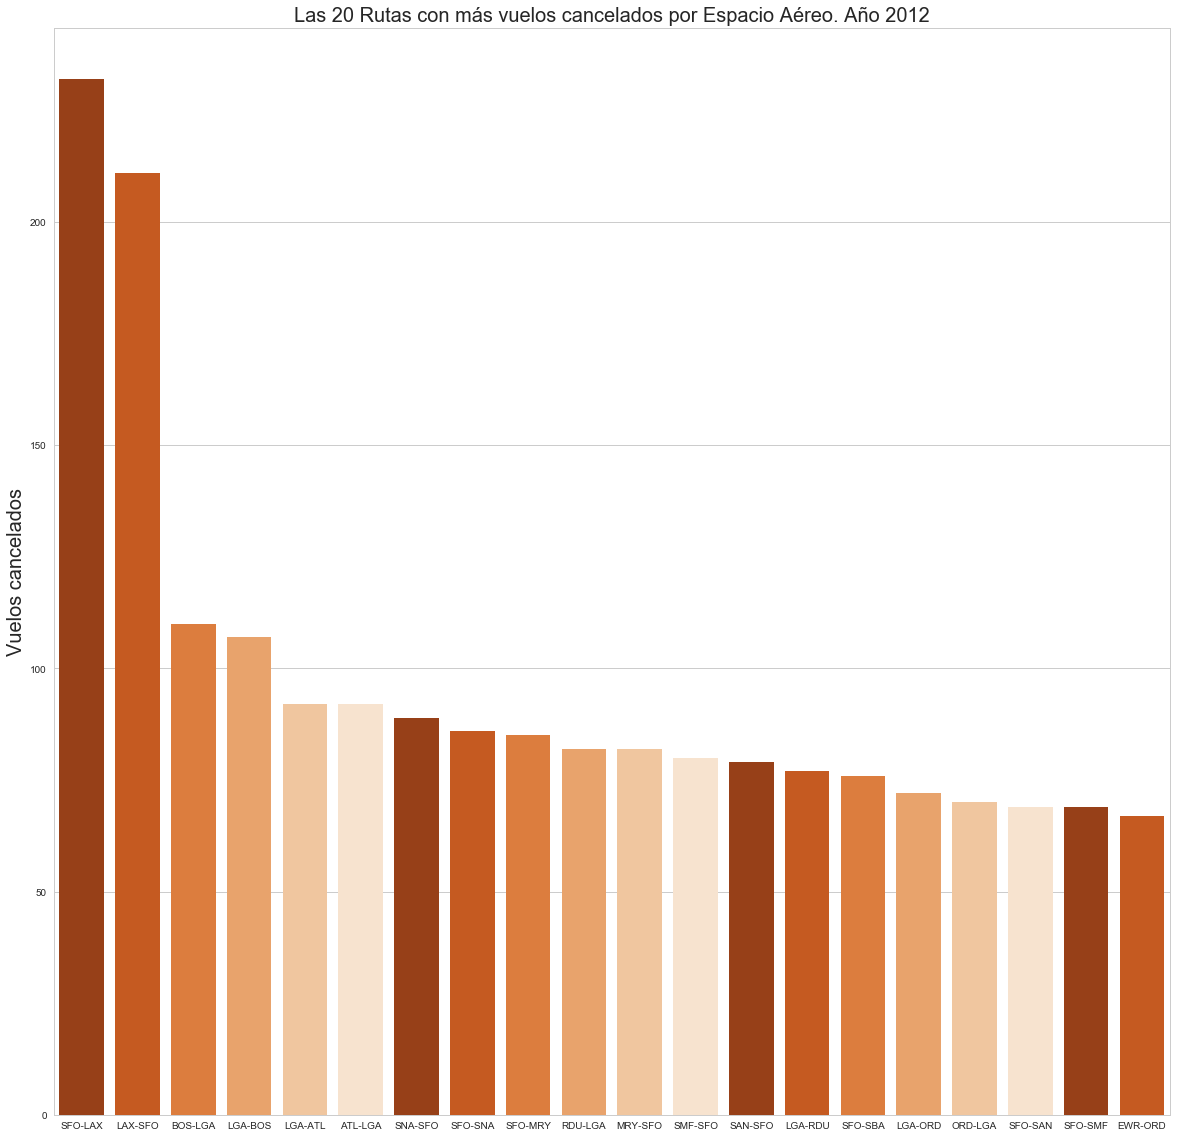

In [288]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Oranges_r")
ax = sns.barplot(x=rutasVuelosCanceladosNAS.index, y=rutasVuelosCanceladosNAS['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Espacio Aéreo. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.4 Vuelos cancelados por Ruta por Seguridad

In [289]:
rutasVuelosCanceladosSeguridad = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'D'].Route.value_counts(sort=True))

In [290]:
rutasVuelosCanceladosSeguridad.shape

(21, 1)

In [291]:
rutasVuelosCanceladosSeguridad = rutasVuelosCanceladosSeguridad.rename(columns={'Route': 'VuelosCancelados'})

rutasVuelosCanceladosSeguridad.head(10)

VuelosCancelados
DFW-SFO                 1
SAT-DFW                 1
EWR-LAS                 1
EWR-MIA                 1
RNO-SFO                 1
SFO-RNO                 1
PHX-SNA                 1
LAS-EWR                 1
DEN-BNA                 1
LAX-MEM                 1

In [292]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosSeguridad = rutasVuelosCanceladosSeguridad.head(20)

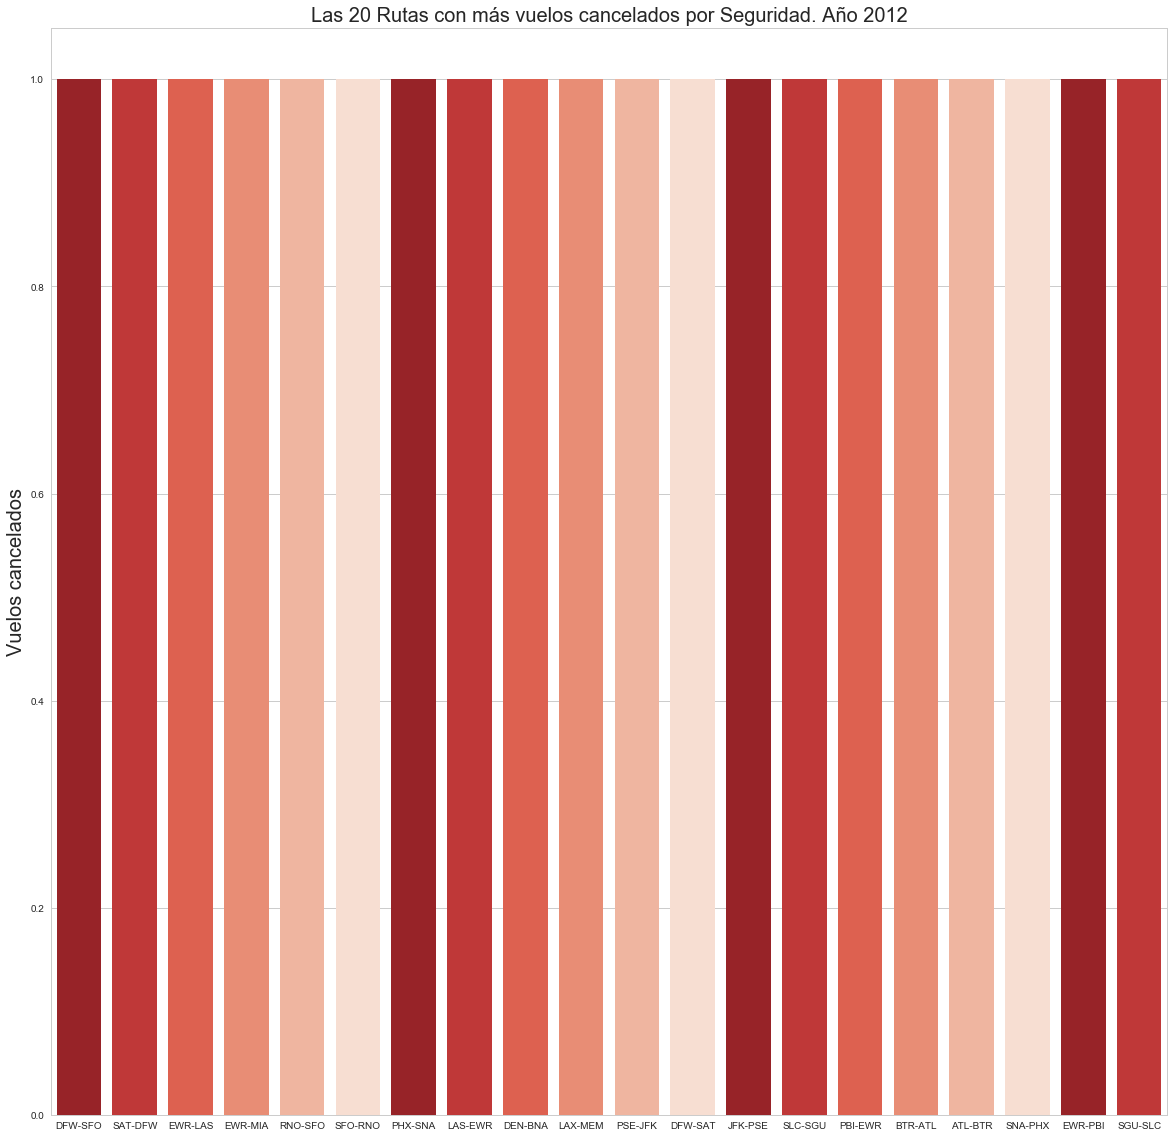

In [293]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_r")
ax = sns.barplot(x=rutasVuelosCanceladosSeguridad.index, y=rutasVuelosCanceladosSeguridad['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Seguridad. Año ' + year, fontsize=20)

plt.show()

### 1.3.6.7 Cancelaciones por Aeropuertos

#### 1.3.6.7.1 Vuelos cancelados en aeropuertos por la Aerolínea

In [294]:
aeropuertosVuelosCanceladosAerolinea = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'A'].Origin.value_counts(sort=True))

In [295]:
aeropuertosVuelosCanceladosAerolinea.shape

(293, 1)

In [296]:
aeropuertosVuelosCanceladosAerolinea = aeropuertosVuelosCanceladosAerolinea.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosAerolinea.head(10)

VuelosCancelados
ORD              2273
DFW              1508
LAX              1407
SFO              1374
DEN               992
EWR               925
LGA               851
IAH               834
ATL               724
IAD               704

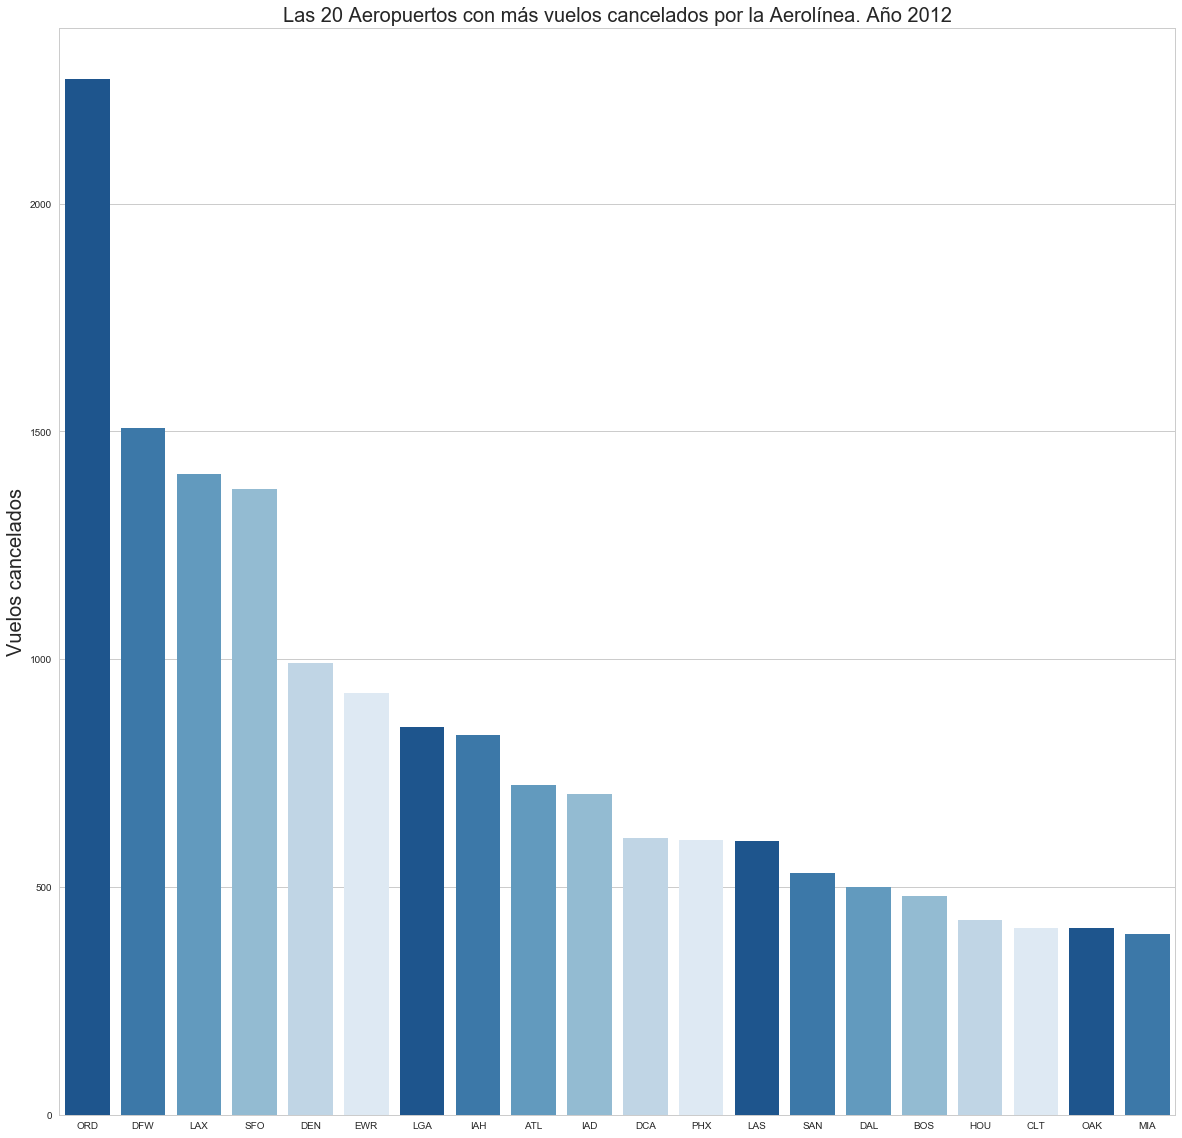

In [297]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosAerolinea = aeropuertosVuelosCanceladosAerolinea.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosAerolinea.index, y=aeropuertosVuelosCanceladosAerolinea['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por la Aerolínea. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.2 Vuelos cancelados en aeropuertos por Meteorología

In [298]:
aeropuertosVuelosCanceladosMeteo = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'B'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosMeteo.shape

(296, 1)

In [299]:
aeropuertosVuelosCanceladosMeteo = aeropuertosVuelosCanceladosMeteo.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosMeteo.head(10)

VuelosCancelados
DFW              2675
ORD              2128
EWR              1829
LGA              1674
SFO              1268
ATL              1149
JFK              1093
BWI               983
DCA               822
BOS               806

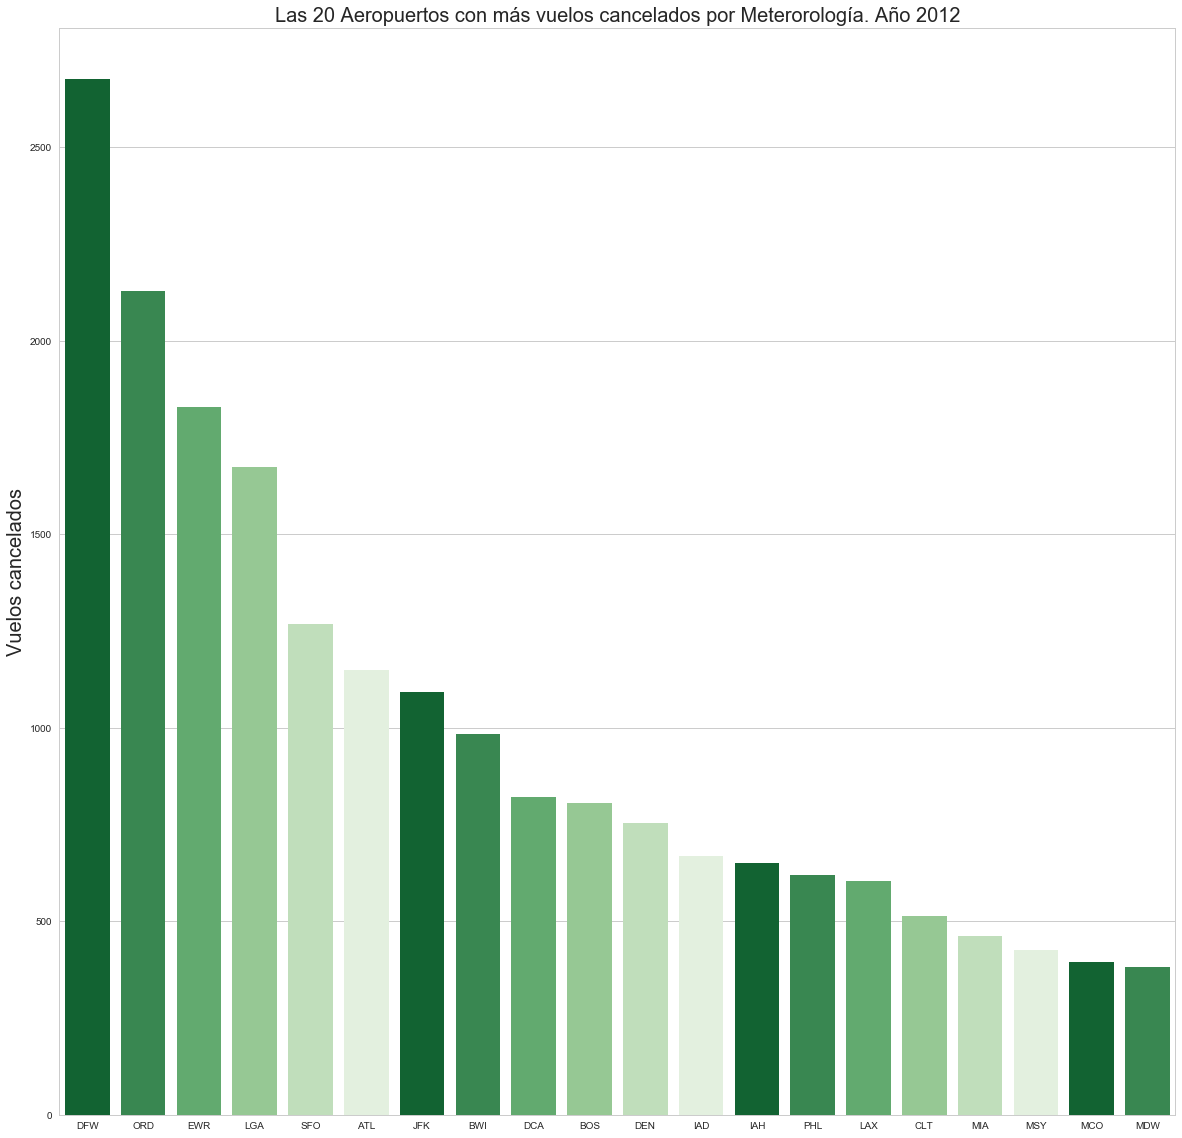

In [300]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosMeteo = aeropuertosVuelosCanceladosMeteo.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosMeteo.index, y=aeropuertosVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Meterorología. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.3 Vuelos cancelados en aeropuertos por Espacio Aéreo

In [301]:
aeropuertosVuelosCanceladosNAS = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'C'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosNAS.shape

(253, 1)

In [302]:
aeropuertosVuelosCanceladosNAS = aeropuertosVuelosCanceladosNAS.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosNAS.head(10)

VuelosCancelados
ORD              1756
SFO              1371
EWR              1064
LGA               883
DFW               795
IAH               413
ATL               368
DCA               337
IAD               325
LAX               303

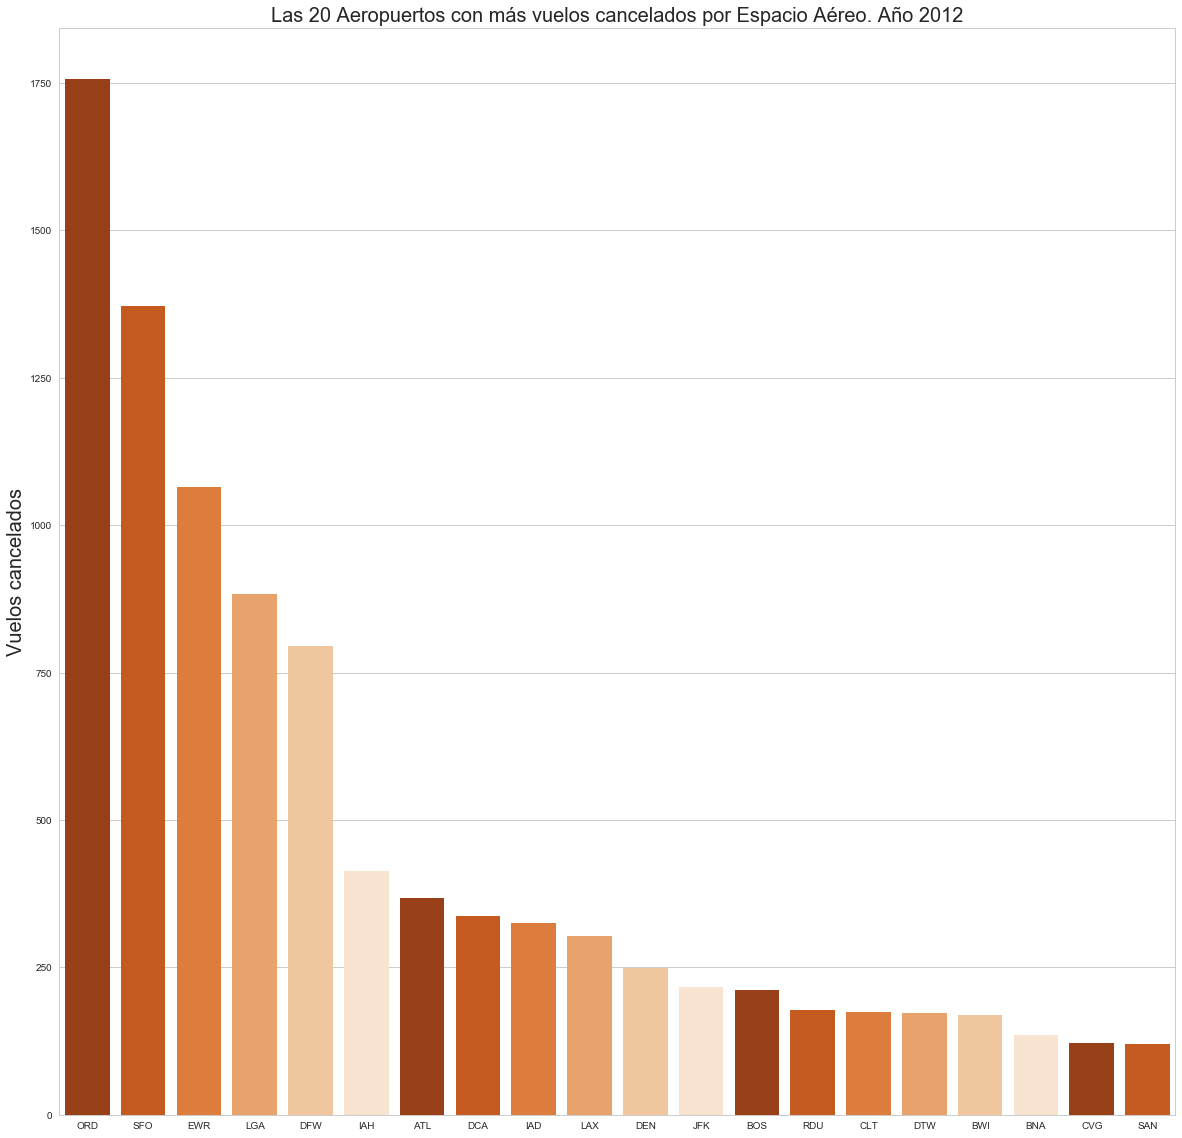

In [303]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosNAS = aeropuertosVuelosCanceladosNAS.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Oranges_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosNAS.index, y=aeropuertosVuelosCanceladosNAS['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Espacio Aéreo. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.4 Vuelos cancelados en aeropuertos por Seguridad

In [304]:
aeropuertosVuelosCanceladosSeguridad = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'D'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosSeguridad.shape

(18, 1)

In [305]:
aeropuertosVuelosCanceladosSeguridad = aeropuertosVuelosCanceladosSeguridad.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosSeguridad.head(10)

VuelosCancelados
EWR                 3
DFW                 2
PSE                 1
PHX                 1
SGU                 1
PBI                 1
JFK                 1
SLC                 1
SNA                 1
BTR                 1

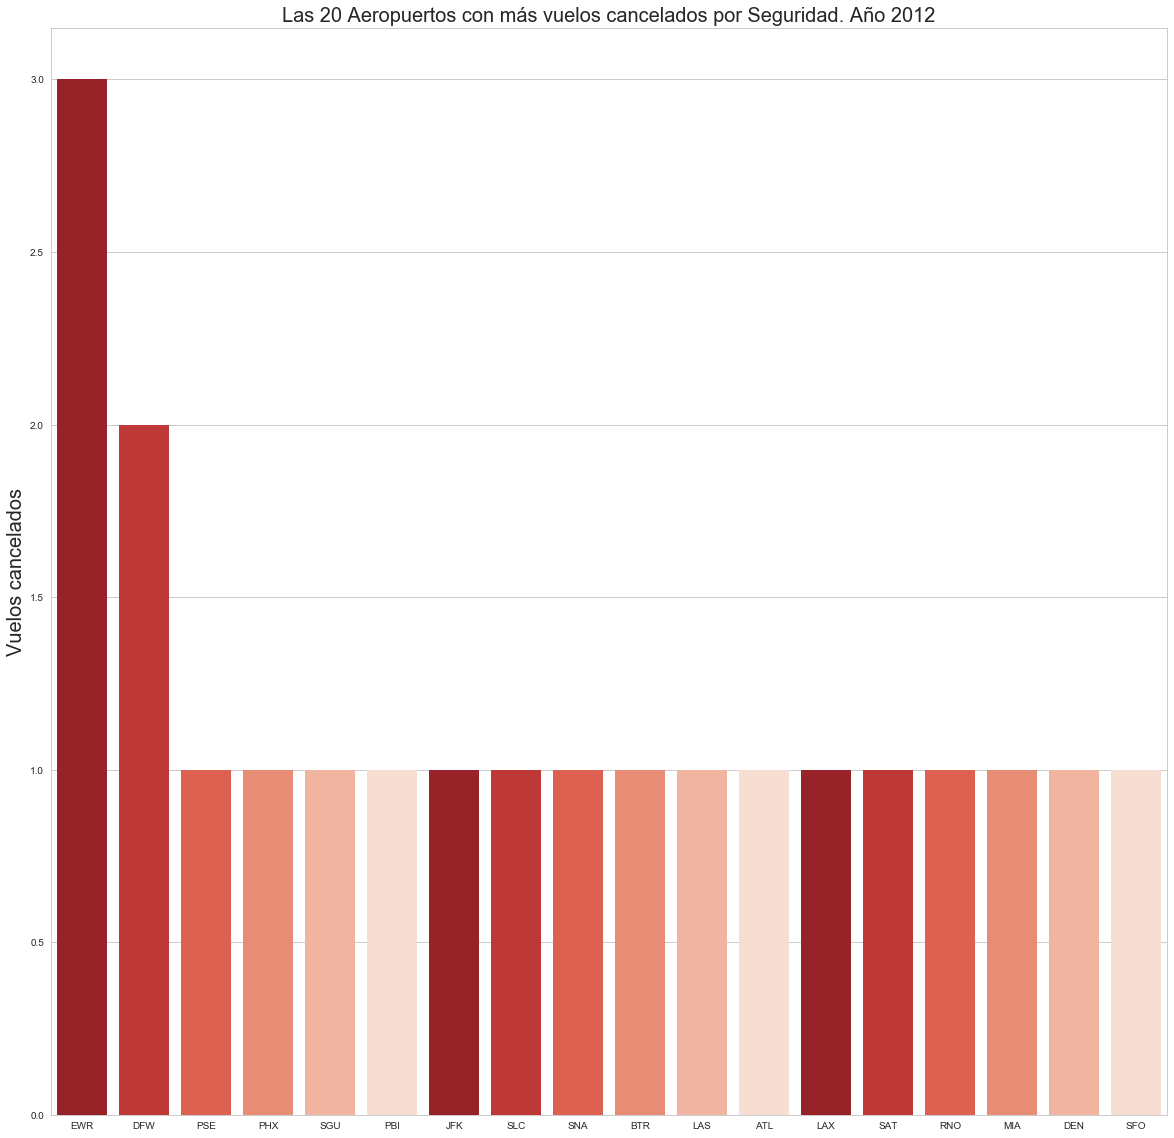

In [306]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosSeguridad = aeropuertosVuelosCanceladosSeguridad.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosSeguridad.index, y=aeropuertosVuelosCanceladosSeguridad['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Seguridad. Año ' + year, fontsize=20)

plt.show()

## 2. Áreas geográficas
Vamos a ver cómo asignar áreas geográficos a los diferentes aeropuertos para identificar mejor en qué zona están y ver si merece la pena hacer un modelo de predicción /clasificación por zonas geográficas.
Para ello tenemos los Estados en los que se ubica cada aeropuerto, indicado en el campo "OriginState", por lo que hemos hecho un csv mapeando los Estados con zonas geográficas que hemos estimado inicialmente, en función tanto de la geografía, como del posible clima.
1. Por geografía: dividimos el país en 4 partes: Este, Central y Oeste(incluye Hawai).
2. Por clima: a las 3 divisiones del contiennte, los subdividimos en Norte y Sur, ya que seria razonable pensar que  en cada una de estas 3 divisiones el clima varía bastante, a lo largo del año, entre norte y sur.

In [307]:
#hemos creado un csv con las zonas geográficas Este, Central y Oeste y por Norte y Sur 
#abreviado en ES, EN, CS, CN, WS y WN
zonaEstados = pd.read_csv(ruta + "/geo/" + 'ZonasEstados.csv', delimiter=';')

In [308]:
zonaEstados.head(5)

State GeoCluster
0    AL         ES
1    AK         WN
2    AZ         WS
3    AR         CS
4    CA         WS

In [309]:
#para hacer el join por estado, y como tenemos dos Estados en el Dataset (OriginState y DestState), renombraremos
#sucesivamente la cabecera para hacer el join
zonaEstados = zonaEstados.rename(columns={'State': 'OriginState', 'GeoCluster': 'OriginGeo'})

In [310]:
#hacemos el join por el Estado Origen del vuelo
dfanual = pd.merge(dfanual, zonaEstados, on='OriginState', how='inner')

In [311]:
#ahora renombramos para casar con los de Destino
zonaEstados = zonaEstados.rename(columns={'OriginState': 'DestState', 'OriginGeo': 'DestGeo'})

#hacemos el join por el Estado Destino del vuelo
dfanual = pd.merge(dfanual, zonaEstados, on='DestState', how='inner')

In [312]:
#comprobamos
dfanual[['OriginState', 'OriginGeo', 'DestState', 'DestGeo']].head(5)

OriginState OriginGeo DestState DestGeo
0          IL        EN        OK      CS
1          IL        EN        OK      CS
2          IL        EN        OK      CS
3          IL        EN        OK      CS
4          IL        EN        OK      CS

Revisemos por las zonas geográficas, algunos de los datos principales de retrasos, cancelaciones y número de vuelos totales, para comprobar si estamos en lo cierto con respecto a la intuición de los datos por aeropuertos y rutas que hemos visto en el apartado 1.3

In [313]:
#primero contamos todos los retrasos por Zonas de Origen del vuelo
retrasosSalidaPorZonasOrigen = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1].OriginGeo.value_counts(sort=True))

In [314]:
retrasosSalidaPorZonasOrigen = retrasosSalidaPorZonasOrigen.rename(columns={'OriginGeo': 'VuelosRetrasados'})
retrasosSalidaPorZonasOrigen

VuelosRetrasados
EN            315384
CS            211777
ES            203111
WS            201633
CN             42197
WN             15230

In [315]:
#vuelos totales por zona
vuelosTotalesPorZonasOrigen = pd.DataFrame(dfanual.OriginGeo.value_counts(sort=True))

In [316]:
vuelosTotalesPorZonasOrigen = vuelosTotalesPorZonasOrigen.rename(columns={'OriginGeo': 'VuelosTotales'})
vuelosTotalesPorZonasOrigen

VuelosTotales
EN        1835422
ES        1380366
WS        1249095
CS        1161759
CN         322303
WN         123907

In [317]:
#los unimos
#hacemos el join por el Estado Destino del vuelo
datosZonasOrigen = pd.merge(vuelosTotalesPorZonasOrigen, retrasosSalidaPorZonasOrigen, left_index=True, right_index=True)

In [318]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados
EN        1835422            315384
ES        1380366            203111
WS        1249095            201633
CS        1161759            211777
CN         322303             42197
WN         123907             15230

In [319]:
#retrasos en Zona Origen por culpa de la llegada tarde del vuelo anterior
#sacamos las medias de retrasos por llegada tarde del vuelo anterior
retrasosSalidasteAircraftPorGeo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] == 0) & (dfanual['LateAircraftDelay'] > 0)])

In [320]:
retrasosSalidasteAircraftPorGeo = pd.DataFrame(retrasosSalidasteAircraftPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count', 'DepDelay':'mean'}))
retrasosSalidasteAircraftPorGeo = retrasosSalidasteAircraftPorGeo.rename(columns={'OriginGeo': 'VuelosLateArrival', 'DepDelay': 'MediaLateArrival'})

In [321]:
retrasosSalidasteAircraftPorGeo

VuelosLateArrival  MediaLateArrival
OriginGeo                                     
CN                     13274         67.214705
CS                     52900         64.524537
EN                     79866         72.061891
ES                     55761         65.245351
WN                      5528         65.720333
WS                     59931         63.559927

In [322]:
#retrasos en Zona Origen por culpa de la Aerolínea
#sacamos las medias
retrasosSalidasAerolineaPorGeo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['LateAircraftDelay'] == 0) & (dfanual['CarrierDelay'] > 0)])
retrasosSalidasAerolineaPorGeo = pd.DataFrame(retrasosSalidasAerolineaPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count', 'DepDelay':'mean'}))
retrasosSalidasAerolineaPorGeo = retrasosSalidasAerolineaPorGeo.rename(columns={'OriginGeo': 'VuelosAerolinea', 'DepDelay': 'MediaAerolinea'})

In [323]:
retrasosSalidasAerolineaPorGeo

VuelosAerolinea  MediaAerolinea
OriginGeo                                 
CN                    8080       79.731312
CS                   49308       57.878336
EN                   69639       69.020736
ES                   47090       68.636781
WN                    2724       71.620044
WS                   38473       62.918332

In [324]:
#vuelos totales cancelados por Zona Origen
vuelosCanceladosPorGeo = pd.DataFrame(dfanual[(dfanual['Cancelled'] == 1)])
vuelosCanceladosPorGeo = pd.DataFrame(vuelosCanceladosPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count'}))
vuelosCanceladosPorGeo = vuelosCanceladosPorGeo.rename(columns={'OriginGeo': 'VuelosCancelados'})

In [325]:
vuelosCanceladosPorGeo

VuelosCancelados
OriginGeo                  
CN                     3347
CS                    15239
EN                    32481
ES                    11341
WN                     1689
WS                    14639

In [326]:
#vuelos cancelados por Meteo Zona Origen
vuelosCanceladosMeteoPorGeo = pd.DataFrame(dfanual[(dfanual['CancellationCode'] == 'B')])
vuelosCanceladosMeteoPorGeo = pd.DataFrame(vuelosCanceladosMeteoPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count'}))
vuelosCanceladosMeteoPorGeo = vuelosCanceladosMeteoPorGeo.rename(columns={'OriginGeo': 'VuelosCanceladosMeteo'})

In [327]:
vuelosCanceladosPorGeo

VuelosCancelados
OriginGeo                  
CN                     3347
CS                    15239
EN                    32481
ES                    11341
WN                     1689
WS                    14639

In [328]:
# terminamos de fusionar todos los datasets
datosZonasOrigen = pd.merge(datosZonasOrigen, retrasosSalidasteAircraftPorGeo, left_index=True, right_index=True)

In [329]:
datosZonasOrigen = pd.merge(datosZonasOrigen, retrasosSalidasAerolineaPorGeo, left_index=True, right_index=True)

In [330]:
datosZonasOrigen = pd.merge(datosZonasOrigen, vuelosCanceladosPorGeo, left_index=True, right_index=True)

In [331]:
datosZonasOrigen = pd.merge(datosZonasOrigen, vuelosCanceladosMeteoPorGeo, left_index=True, right_index=True)

In [332]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados  VuelosLateArrival  MediaLateArrival  \
EN        1835422            315384              79866         72.061891   
ES        1380366            203111              55761         65.245351   
WS        1249095            201633              59931         63.559927   
CS        1161759            211777              52900         64.524537   
CN         322303             42197              13274         67.214705   
WN         123907             15230               5528         65.720333   

    VuelosAerolinea  MediaAerolinea  VuelosCancelados  VuelosCanceladosMeteo  
EN            69639       69.020736             32481                  15146  
ES            47090       68.636781             11341                   5256  
WS            38473       62.918332             14639                   4200  
CS            49308       57.878336             15239                   6652  
CN             8080       79.731312              3347                   1399  
WN             2724       71.620044              1689                    887

In [333]:
#por último sacamos porcentajes sobre los vuelos totales, para conocer la proporción real
datosZonasOrigen['PctVuelosRetrasados'] = (datosZonasOrigen['VuelosRetrasados'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosLateArrival'] = (datosZonasOrigen['VuelosLateArrival'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosAerolinea'] = (datosZonasOrigen['VuelosAerolinea'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosCancelados'] = (datosZonasOrigen['VuelosCancelados'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosCanceladosMeteo'] = (datosZonasOrigen['VuelosCanceladosMeteo'] / datosZonasOrigen['VuelosTotales'])*100


In [334]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados  VuelosLateArrival  MediaLateArrival  \
EN        1835422            315384              79866         72.061891   
ES        1380366            203111              55761         65.245351   
WS        1249095            201633              59931         63.559927   
CS        1161759            211777              52900         64.524537   
CN         322303             42197              13274         67.214705   
WN         123907             15230               5528         65.720333   

    VuelosAerolinea  MediaAerolinea  VuelosCancelados  VuelosCanceladosMeteo  \
EN            69639       69.020736             32481                  15146   
ES            47090       68.636781             11341                   5256   
WS            38473       62.918332             14639                   4200   
CS            49308       57.878336             15239                   6652   
CN             8080       79.731312              3347                   1399   
WN             2724       71.620044              1689                    887   

    PctVuelosRetrasados  PctVuelosLateArrival  PctVuelosAerolinea  \
EN            17.183187              4.351370            3.794168   
ES            14.714286              4.039581            3.411414   
WS            16.142327              4.797954            3.080070   
CS            18.228996              4.553440            4.244254   
CN            13.092339              4.118485            2.506958   
WN            12.291477              4.461411            2.198423   

    PctVuelosCancelados  PctVuelosCanceladosMeteo  
EN             1.769675                  0.825205  
ES             0.821594                  0.380769  
WS             1.171969                  0.336243  
CS             1.311718                  0.572580  
CN             1.038464                  0.434064  
WN             1.363119                  0.715859

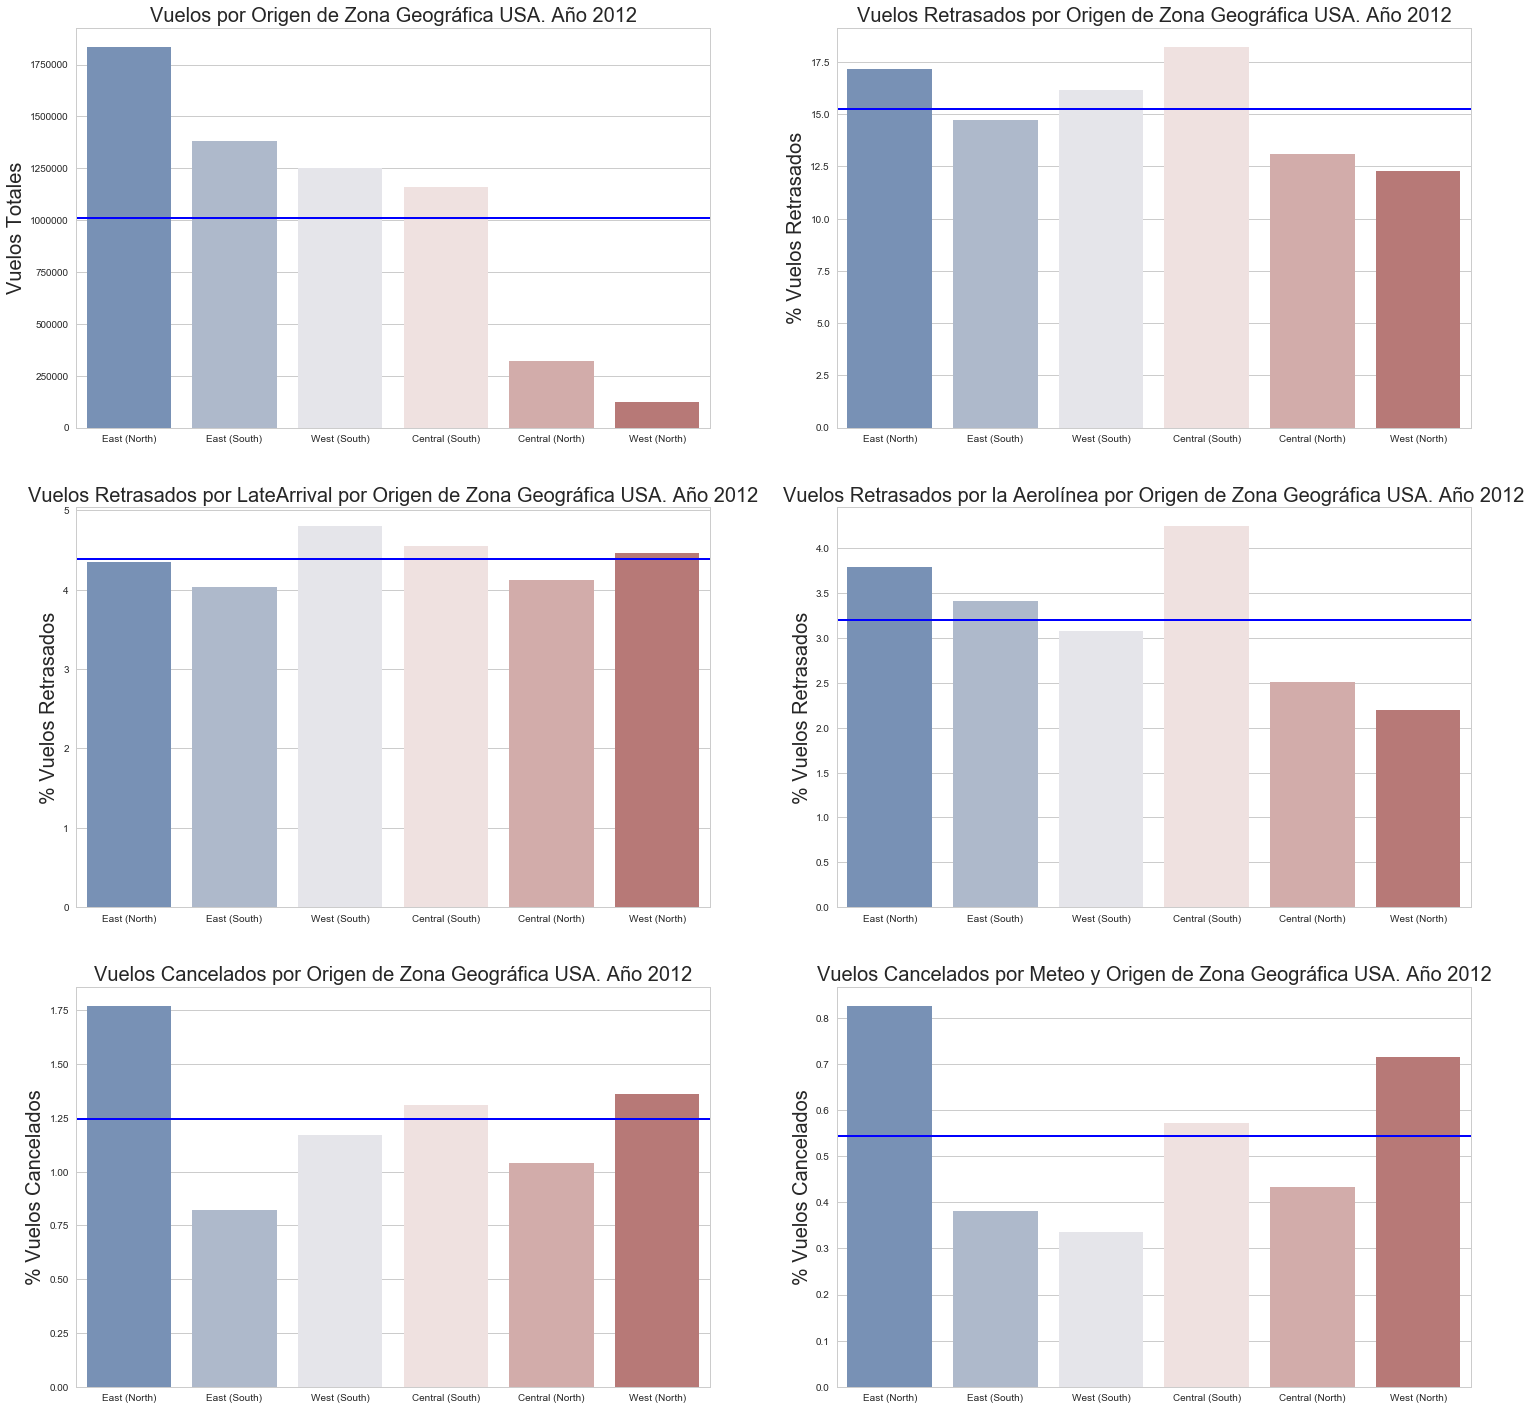

In [335]:
#a pintar

my_xticks=['East (North)', 'East (South)', 'West (South)', 'Central (South)', 'Central (North)', 'West (North)']

#Sacamos gráficos
plt.figure(figsize=(25, 25))

#Vuelos por Origen de Zona Geográfica USA
plt.subplot(3,2,1)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['VuelosTotales'], palette=pal)

ax.set_ylabel("Vuelos Totales", fontsize=20)
ax.set_title('Vuelos por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['VuelosTotales'].mean(), color='Blue', linewidth=2)

#Vuelos Retrasados por Origen de Zona Geográfica USA
plt.subplot(3,2,2)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosRetrasados'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosRetrasados'].mean(), color='Blue', linewidth=2)

#Vuelos Retrasados por LateArrival por Origen de Zona Geográfica USA
plt.subplot(3,2,3)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosLateArrival'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por LateArrival por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosLateArrival'].mean(), color='Blue', linewidth=2)


#uelos Retrasados por la Aerolínea por Origen de Zona Geográfica USA
plt.subplot(3,2,4)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosAerolinea'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por la Aerolínea por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosAerolinea'].mean(), color='Blue', linewidth=2)

#Vuelos Cancelados por Origen de Zona Geográfica USA
plt.subplot(3,2,5)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosCancelados'], palette=pal)

ax.set_ylabel("% Vuelos Cancelados", fontsize=20)
ax.set_title('Vuelos Cancelados por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosCancelados'].mean(), color='Blue', linewidth=2)

#Vuelos Cancelados por Meteo y por Origen de Zona Geográfica USA
plt.subplot(3,2,6)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosCanceladosMeteo'], palette=pal)

ax.set_ylabel("% Vuelos Cancelados", fontsize=20)
ax.set_title('Vuelos Cancelados por Meteo y Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosCanceladosMeteo'].mean(), color='Blue', linewidth=2)


plt.show()

1. Se ve claramente que la cantidad de vuelos del Este de USA es muy superior al del Oeste y Centro del país.
2. En cuanto a retrasos, porcentualmente destacan, un poco por encima el Este y el Centro Sur, y en el caso de retrasos por la aerolínea es similar.
3. En cuanto a vuelos cancelados, claramente el Este y el Centro sobresalen, el resto está por de debajo de la media, y parece que el factor meteo es uno de los clave, dado que las zonas de huracanes, tornados y heladas, prevalecen en el Este y Centro Sur de USA. En el Oeste Norte, está también encuadrado Alaska y el estado de Washington, por lo que también destaca. La mejor zona del pais en cuanto a cancelaciones por meteo es claramente la Costa Oeste Sur del país, California, Nevada y Arizona.